# Import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from scipy.cluster.hierarchy import dendrogram,linkage
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split


# Read in data

In [2]:
data = pd.read_csv('Movie_box_office.csv',encoding='Windows-1252')


In [3]:
data.columns = data.columns.str.replace('\n','_')
data.columns

Index(['Title', 'Distributor', 'Release Date', 'Rating', 'Genre1', 'Genre2',
       'Genre3', 'Country1', 'Country2', 'Country3', 'Director1', 'Director2',
       'Director3', 'Actor1', 'Actor2', 'Actor3', 'Lifetime_Gross',
       'Preview_Gross', 'Opening_Day', 'Opening_Day_Gross',
       'Opening_Day_Screens', 'Opening_Day_Theatres', 'Opening_Weekend_Gross',
       'Opening_Weekend_Screens', 'Opening_Weekend_Theatres',
       'Opening_Week_Gross', 'Opening_Week_Screens', 'Opening_Week_Theatres',
       '% of_Opening_Weekend_to Week'],
      dtype='object')

In [4]:
##to datetime
data['Release Date'] = pd.to_datetime(data['Release Date'])

In [5]:
#each varibale has how many missing values
data.isnull().sum().sort_values(ascending = False)

Director3                       7035
Director2                       6632
Country3                        6519
Opening_Day_Theatres            5700
Opening_Week_Theatres           5684
Opening_Weekend_Theatres        5672
Country2                        5439
Preview_Gross                   5401
Genre3                          4226
Genre2                          2050
Actor3                          1644
Actor2                           951
Actor1                           442
Director1                        282
Opening_Week_Screens             250
Opening_Day_Screens              209
Opening_Day_Gross                204
% of_Opening_Weekend_to Week     162
Opening_Week_Gross               157
Opening_Weekend_Gross            146
Opening_Weekend_Screens          137
Rating                           104
Genre1                            11
Country1                           4
Opening_Day                        0
Lifetime_Gross                     0
Distributor                        0
R

## Split data

In [6]:
start=np.array('2020-03-20', dtype=np.datetime64)
end=np.array('2021-11-01', dtype=np.datetime64)

In [7]:
data['Covid_Period']=''

In [8]:
for i in range(len(data)):
    if data.loc[i,'Release Date']<start:
        data.loc[i,'Covid_Period']='pre'
    elif data.loc[i,'Release Date']>=start and data.loc[i,'Release Date']<=end:
        data.loc[i,'Covid_Period']='lockdown'
    else:
        data.loc[i,'Covid_Period']='post'

In [9]:
data['Covid_Period']

0       post
1       post
2       post
3       post
4       post
        ... 
7088     pre
7089     pre
7090     pre
7091     pre
7092     pre
Name: Covid_Period, Length: 7093, dtype: object

In [10]:
##split the data to train and test sets by stratifing by 'Covid_Period'
X_train, X_test, y_train, y_test = train_test_split(data.drop('Lifetime_Gross',axis = 1),
                                                        data['Lifetime_Gross'], 
                                                        test_size=0.2, 
                                                        random_state=0,
                                                        stratify = data['Covid_Period'])


In [11]:
X_train['Covid_Period'].value_counts(normalize = True)

pre         0.777053
post        0.124956
lockdown    0.097991
Name: Covid_Period, dtype: float64

In [12]:
X_test['Covid_Period'].value_counts(normalize = True)

pre         0.777308
post        0.124736
lockdown    0.097956
Name: Covid_Period, dtype: float64

# Data cleaning

## Targets

In [13]:
##drop lifetime==0 columns
train = pd.concat([X_train, y_train], axis=1)
train = train.reindex()
train

,Title,Distributor,Release Date,Rating,Genre1,Genre2,Genre3,Country1,Country2,Country3,...,Opening_Day_Theatres,Opening_Weekend_Gross,Opening_Weekend_Screens,Opening_Weekend_Theatres,Opening_Week_Gross,Opening_Week_Screens,Opening_Week_Theatres,% of_Opening_Weekend_to Week,Covid_Period,Lifetime_Gross
3025,Golak Bugni Bank Te Batua,Mindblowing,2018-04-13,PG,Comedy,NaN,NaN,India,NaN,NaN,...,NaN,132528.0,32.0,NaN,196615.0,33.0,NaN,67%,pre,289735
2911,Race 3,Mindblowing,2018-06-15,MA15+,Action,Thriller,NaN,India,NaN,NaN,...,NaN,495373.0,56.0,NaN,600406.0,56.0,NaN,83%,pre,720315
6826,"Child's Eye 3D, The",Dream Movie,2010-10-28,MA15+,Horror,NaN,NaN,Hong Kong,NaN,NaN,...,NaN,30012.0,7.0,NaN,44544.0,7.0,NaN,67%,pre,69713
4442,America Wild 3D,Imax,2016-02-25,EX,Documentary,NaN,NaN,USA,NaN,NaN,...,NaN,12716.0,2.0,NaN,18353.0,2.0,NaN,69%,pre,195115
520,Opéra de Paris: Cinderella,Palace,2022-05-28,EX,Special Event,Opera,NaN,France,NaN,NaN,...,10.0,4323.0,12.0,12.0,7017.0,12.0,12.0,62%,post,7017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4241,Royal Ballet: Frankenstein,Palace,2016-01-07,EX,Special Event,Opera,Live,UK,NaN,NaN,...,NaN,9674.0,9.0,NaN,13785.0,9.0,NaN,70%,pre,14535
3057,Cake,Mindblowing,2018-03-30,M,Drama,Romance,Mystery,India,Pakistan,UK,...,NaN,8320.0,10.0,NaN,13895.0,10.0,NaN,60%,pre,20579
6301,This Must Be The Place,eOne,2012-05-04,M,Comedy,Drama,NaN,Italy,France,Ireland,...,NaN,72331.0,16.0,NaN,121140.0,16.0,NaN,60%,pre,371031
4761,Vaalu,Eros Australia,2015-07-31,M,Comedy,Romance,NaN,India,NaN,NaN,...,NaN,13516.0,6.0,NaN,15705.0,6.0,NaN,86%,pre,16765


In [14]:
test = pd.concat([X_test, y_test], axis=1)
test = test.reindex()
test

,Title,Distributor,Release Date,Rating,Genre1,Genre2,Genre3,Country1,Country2,Country3,...,Opening_Day_Theatres,Opening_Weekend_Gross,Opening_Weekend_Screens,Opening_Weekend_Theatres,Opening_Week_Gross,Opening_Week_Screens,Opening_Week_Theatres,% of_Opening_Weekend_to Week,Covid_Period,Lifetime_Gross
691,Monsieur Verdoux (1947) (RE: 2022),Piece of Magic Entertainment,2022-03-03,PG,Comedy,Drama,Crime,USA,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,post,2377
2877,Ant-Man and the Wasp,Walt Disney,2018-05-07,PG,Action,Adventure,Comedy,USA,NaN,NaN,...,NaN,5814528.0,613.0,NaN,8794024.0,613.0,NaN,66%,pre,19851398
3141,Aiyaary,Mindblowing,2018-02-16,M,Action,Drama,Crime,India,NaN,NaN,...,NaN,82167.0,34.0,NaN,103530.0,34.0,NaN,79%,pre,130911
2824,"Last Suit, The",Moving Story Entertainment,2018-02-08,TBC,Drama,NaN,NaN,Spain,Argentina,NaN,...,NaN,5600.0,4.0,NaN,7480.0,4.0,NaN,75%,pre,80210
2085,"Lion King, The (2019)",Walt Disney,2019-07-17,PG,Adventure,Drama,Family,USA,NaN,NaN,...,NaN,20537945.0,899.0,NaN,28484356.0,899.0,NaN,72%,pre,64138378
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
941,"Royal Game, The",Studiocanal,2021-09-23,M,Drama,NaN,NaN,Germany,Austria,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,lockdown,36
3893,Sarvann,Mindblowing,2017-01-13,M,Thriller,NaN,NaN,India,NaN,NaN,...,NaN,134131.0,25.0,NaN,186764.0,25.0,NaN,72%,pre,207068
6125,Dreams Of A Life,Madman,2012-09-13,PG,Documentary,Drama,NaN,UK,Ireland,NaN,...,NaN,3399.0,1.0,NaN,4725.0,1.0,NaN,72%,pre,26389
6741,James Cameron Presents Sanctum,Universal,2011-03-02,M,Adventure,Drama,Thriller,Australia,USA,NaN,...,NaN,1595021.0,252.0,NaN,2055419.0,252.0,NaN,78%,pre,3871962


In [15]:
train = train.drop(train[train['Lifetime_Gross'] == 0].index, axis=0)
train

,Title,Distributor,Release Date,Rating,Genre1,Genre2,Genre3,Country1,Country2,Country3,...,Opening_Day_Theatres,Opening_Weekend_Gross,Opening_Weekend_Screens,Opening_Weekend_Theatres,Opening_Week_Gross,Opening_Week_Screens,Opening_Week_Theatres,% of_Opening_Weekend_to Week,Covid_Period,Lifetime_Gross
3025,Golak Bugni Bank Te Batua,Mindblowing,2018-04-13,PG,Comedy,NaN,NaN,India,NaN,NaN,...,NaN,132528.0,32.0,NaN,196615.0,33.0,NaN,67%,pre,289735
2911,Race 3,Mindblowing,2018-06-15,MA15+,Action,Thriller,NaN,India,NaN,NaN,...,NaN,495373.0,56.0,NaN,600406.0,56.0,NaN,83%,pre,720315
6826,"Child's Eye 3D, The",Dream Movie,2010-10-28,MA15+,Horror,NaN,NaN,Hong Kong,NaN,NaN,...,NaN,30012.0,7.0,NaN,44544.0,7.0,NaN,67%,pre,69713
4442,America Wild 3D,Imax,2016-02-25,EX,Documentary,NaN,NaN,USA,NaN,NaN,...,NaN,12716.0,2.0,NaN,18353.0,2.0,NaN,69%,pre,195115
520,Opéra de Paris: Cinderella,Palace,2022-05-28,EX,Special Event,Opera,NaN,France,NaN,NaN,...,10.0,4323.0,12.0,12.0,7017.0,12.0,12.0,62%,post,7017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4241,Royal Ballet: Frankenstein,Palace,2016-01-07,EX,Special Event,Opera,Live,UK,NaN,NaN,...,NaN,9674.0,9.0,NaN,13785.0,9.0,NaN,70%,pre,14535
3057,Cake,Mindblowing,2018-03-30,M,Drama,Romance,Mystery,India,Pakistan,UK,...,NaN,8320.0,10.0,NaN,13895.0,10.0,NaN,60%,pre,20579
6301,This Must Be The Place,eOne,2012-05-04,M,Comedy,Drama,NaN,Italy,France,Ireland,...,NaN,72331.0,16.0,NaN,121140.0,16.0,NaN,60%,pre,371031
4761,Vaalu,Eros Australia,2015-07-31,M,Comedy,Romance,NaN,India,NaN,NaN,...,NaN,13516.0,6.0,NaN,15705.0,6.0,NaN,86%,pre,16765


In [16]:
test = test.drop(test[test['Lifetime_Gross'] == 0].index, axis=0)
test

,Title,Distributor,Release Date,Rating,Genre1,Genre2,Genre3,Country1,Country2,Country3,...,Opening_Day_Theatres,Opening_Weekend_Gross,Opening_Weekend_Screens,Opening_Weekend_Theatres,Opening_Week_Gross,Opening_Week_Screens,Opening_Week_Theatres,% of_Opening_Weekend_to Week,Covid_Period,Lifetime_Gross
691,Monsieur Verdoux (1947) (RE: 2022),Piece of Magic Entertainment,2022-03-03,PG,Comedy,Drama,Crime,USA,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,post,2377
2877,Ant-Man and the Wasp,Walt Disney,2018-05-07,PG,Action,Adventure,Comedy,USA,NaN,NaN,...,NaN,5814528.0,613.0,NaN,8794024.0,613.0,NaN,66%,pre,19851398
3141,Aiyaary,Mindblowing,2018-02-16,M,Action,Drama,Crime,India,NaN,NaN,...,NaN,82167.0,34.0,NaN,103530.0,34.0,NaN,79%,pre,130911
2824,"Last Suit, The",Moving Story Entertainment,2018-02-08,TBC,Drama,NaN,NaN,Spain,Argentina,NaN,...,NaN,5600.0,4.0,NaN,7480.0,4.0,NaN,75%,pre,80210
2085,"Lion King, The (2019)",Walt Disney,2019-07-17,PG,Adventure,Drama,Family,USA,NaN,NaN,...,NaN,20537945.0,899.0,NaN,28484356.0,899.0,NaN,72%,pre,64138378
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
941,"Royal Game, The",Studiocanal,2021-09-23,M,Drama,NaN,NaN,Germany,Austria,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,lockdown,36
3893,Sarvann,Mindblowing,2017-01-13,M,Thriller,NaN,NaN,India,NaN,NaN,...,NaN,134131.0,25.0,NaN,186764.0,25.0,NaN,72%,pre,207068
6125,Dreams Of A Life,Madman,2012-09-13,PG,Documentary,Drama,NaN,UK,Ireland,NaN,...,NaN,3399.0,1.0,NaN,4725.0,1.0,NaN,72%,pre,26389
6741,James Cameron Presents Sanctum,Universal,2011-03-02,M,Adventure,Drama,Thriller,Australia,USA,NaN,...,NaN,1595021.0,252.0,NaN,2055419.0,252.0,NaN,78%,pre,3871962


In [17]:
##drop rows that lifetime gross smaller than opening day gross
train = train.drop(train[train['Lifetime_Gross']<train['Opening_Day_Gross']].index, axis=0)

In [18]:
test = test.drop(test[test['Lifetime_Gross']<test['Opening_Day_Gross']].index, axis=0)

In [19]:
##create log lifetime gross column
train['log_lifetime_gross'] = np.log(train['Lifetime_Gross'])

In [20]:
test['log_lifetime_gross'] = np.log(test['Lifetime_Gross'])

In [21]:
train.isna().sum()

Title                              0
Distributor                        0
Release Date                       0
Rating                            84
Genre1                            10
Genre2                          1636
Genre3                          3373
Country1                           4
Country2                        4342
Country3                        5195
Director1                        234
Director2                       5296
Director3                       5622
Actor1                           357
Actor2                           764
Actor3                          1305
Preview_Gross                   4324
Opening_Day                        0
Opening_Day_Gross                154
Opening_Day_Screens              158
Opening_Day_Theatres            4545
Opening_Weekend_Gross            112
Opening_Weekend_Screens          104
Opening_Weekend_Theatres        4524
Opening_Week_Gross               119
Opening_Week_Screens             190
Opening_Week_Theatres           4534
%

In [22]:
test.isna().sum()

Title                              0
Distributor                        0
Release Date                       0
Rating                            20
Genre1                             1
Genre2                           413
Genre3                           850
Country1                           0
Country2                        1091
Country3                        1317
Director1                         47
Director2                       1329
Director3                       1405
Actor1                            83
Actor2                           185
Actor3                           336
Preview_Gross                   1069
Opening_Day                        0
Opening_Day_Gross                 48
Opening_Day_Screens               49
Opening_Day_Theatres            1147
Opening_Weekend_Gross             32
Opening_Weekend_Screens           31
Opening_Weekend_Theatres        1140
Opening_Week_Gross                36
Opening_Week_Screens              58
Opening_Week_Theatres           1142
%

In [23]:
train = train.drop( ['Genre2', 'Genre3','Country2', 'Country3','Director2', 'Director3', 'Actor2', 'Actor3', 
                    'Opening_Day_Gross','Opening_Day_Theatres', 'Opening_Weekend_Gross',
                     'Opening_Weekend_Screens', 'Opening_Weekend_Theatres',
                      'Opening_Week_Gross', 'Opening_Week_Screens', 
                      'Opening_Week_Theatres', '% of_Opening_Weekend_to Week'], axis = 1)

In [24]:
test = test.drop( ['Genre2', 'Genre3','Country2', 'Country3','Director2', 'Director3', 'Actor2', 'Actor3', 
                    'Opening_Day_Gross','Opening_Day_Theatres', 'Opening_Weekend_Gross',
                     'Opening_Weekend_Screens', 'Opening_Weekend_Theatres',
                      'Opening_Week_Gross', 'Opening_Week_Screens', 
                      'Opening_Week_Theatres', '% of_Opening_Weekend_to Week'], axis = 1)

In [25]:
train.columns

Index(['Title', 'Distributor', 'Release Date', 'Rating', 'Genre1', 'Country1',
       'Director1', 'Actor1', 'Preview_Gross', 'Opening_Day',
       'Opening_Day_Screens', 'Covid_Period', 'Lifetime_Gross',
       'log_lifetime_gross'],
      dtype='object')

In [26]:
test.columns

Index(['Title', 'Distributor', 'Release Date', 'Rating', 'Genre1', 'Country1',
       'Director1', 'Actor1', 'Preview_Gross', 'Opening_Day',
       'Opening_Day_Screens', 'Covid_Period', 'Lifetime_Gross',
       'log_lifetime_gross'],
      dtype='object')

In [27]:
train.isna().sum()

Title                     0
Distributor               0
Release Date              0
Rating                   84
Genre1                   10
Country1                  4
Director1               234
Actor1                  357
Preview_Gross          4324
Opening_Day               0
Opening_Day_Screens     158
Covid_Period              0
Lifetime_Gross            0
log_lifetime_gross        0
dtype: int64

In [28]:
test.isna().sum()

Title                     0
Distributor               0
Release Date              0
Rating                   20
Genre1                    1
Country1                  0
Director1                47
Actor1                   83
Preview_Gross          1069
Opening_Day               0
Opening_Day_Screens      49
Covid_Period              0
Lifetime_Gross            0
log_lifetime_gross        0
dtype: int64

In [29]:
tran_linear = train

In [30]:
tran_tree = train

In [31]:
test_linear = test

In [32]:
test_tree = test

# EDA

In [33]:
# Covid Period
# Rating
# Genre
# Country
# Distributor
# Director
# Actor
# Preview
# Opening Day Screen


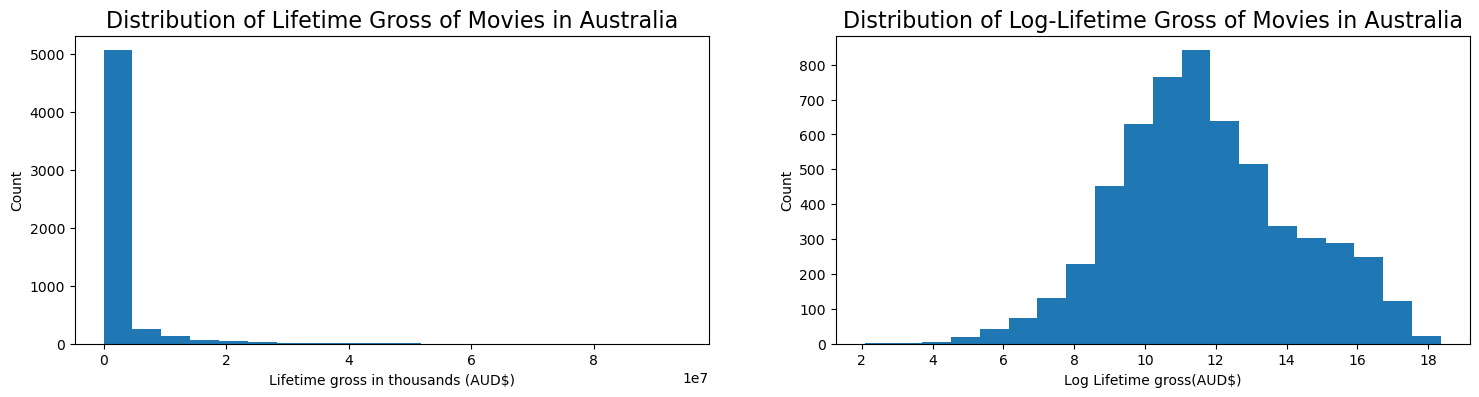

In [34]:
##lifetime gross and log lifetime gross
fig, ax = plt.subplots(figsize = (18, 4))
plt.subplot(1, 2, 1)
plt.hist(train['Lifetime_Gross'],bins = 20);
plt.xlabel('Lifetime gross in thousands (AUD$)')
plt.ylabel('Count') 
plt.title('Distribution of Lifetime Gross of Movies in Australia',size = 16);
plt.subplot(1, 2, 2)
plt.hist(train['log_lifetime_gross'],bins =20);
plt.xlabel('Log Lifetime gross(AUD$)')
plt.ylabel('Count') 
plt.title('Distribution of Log-Lifetime Gross of Movies in Australia',size = 16);
plt.savefig('lifetimegross distribution.png',dpi = 800)

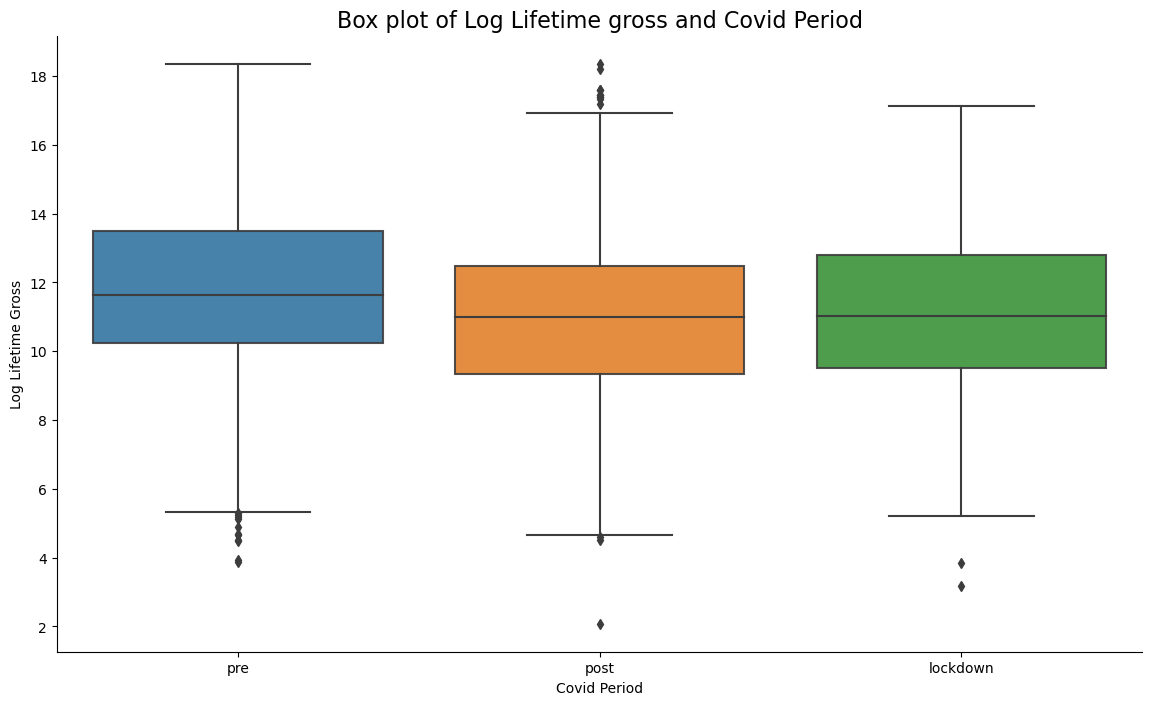

In [35]:
#covid period
fig, ax = plt.subplots(figsize=(14,8))

sns.boxplot(x = train['Covid_Period'], y = train['log_lifetime_gross'], 
            boxprops=dict(alpha=.9),
            )
sns.despine()
plt.xlabel('Covid Period',size = 10)
plt.ylabel('Log Lifetime Gross',size = 10)

plt.title('Box plot of Log Lifetime gross and Covid Period',size = 16)
plt.savefig('covidperiod.png',dpi = 800)

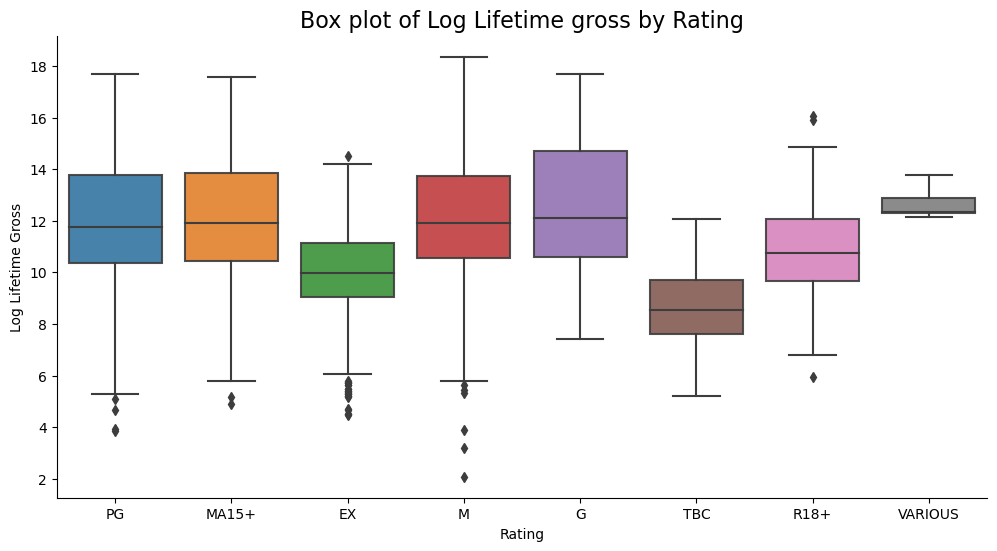

In [36]:
##rating
fig, ax = plt.subplots(figsize=(12,6))

sns.boxplot(x = train['Rating'], y = train['log_lifetime_gross'], 
            boxprops=dict(alpha=.9),
            )
sns.despine()
plt.xlabel('Rating',size = 10)
plt.ylabel('Log Lifetime Gross',size = 10)

plt.title('Box plot of Log Lifetime gross by Rating',size = 16)
plt.savefig('boxrating.png',dpi = 800)

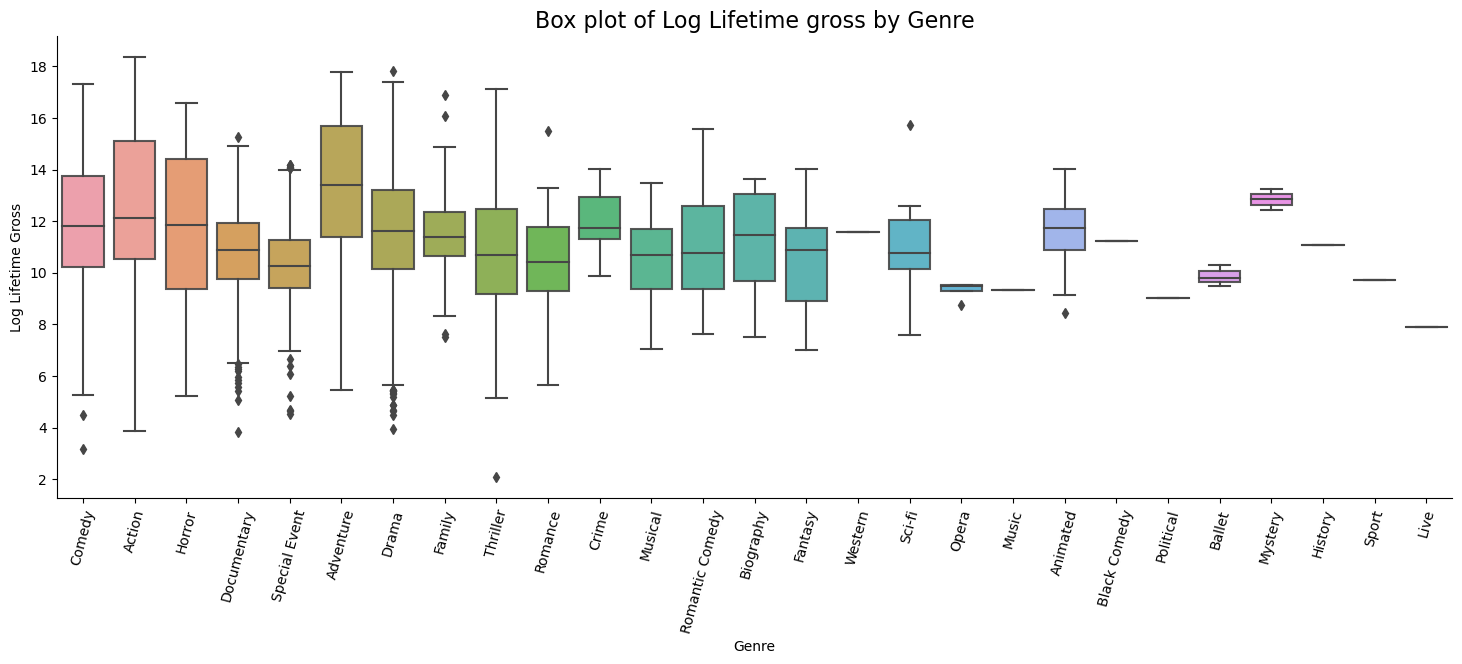

In [37]:
#4 genre
fig, ax = plt.subplots(figsize=(18,6))

sns.boxplot(x = train['Genre1'], y = train['log_lifetime_gross'], 
            boxprops=dict(alpha=.9),
            )
sns.despine()
plt.xlabel('Genre',size = 10)
plt.xticks(rotation = 75)

plt.ylabel('Log Lifetime Gross',size = 10)

plt.title('Box plot of Log Lifetime gross by Genre',size = 16)
plt.savefig('genre.png',dpi = 800,bbox_inches='tight')

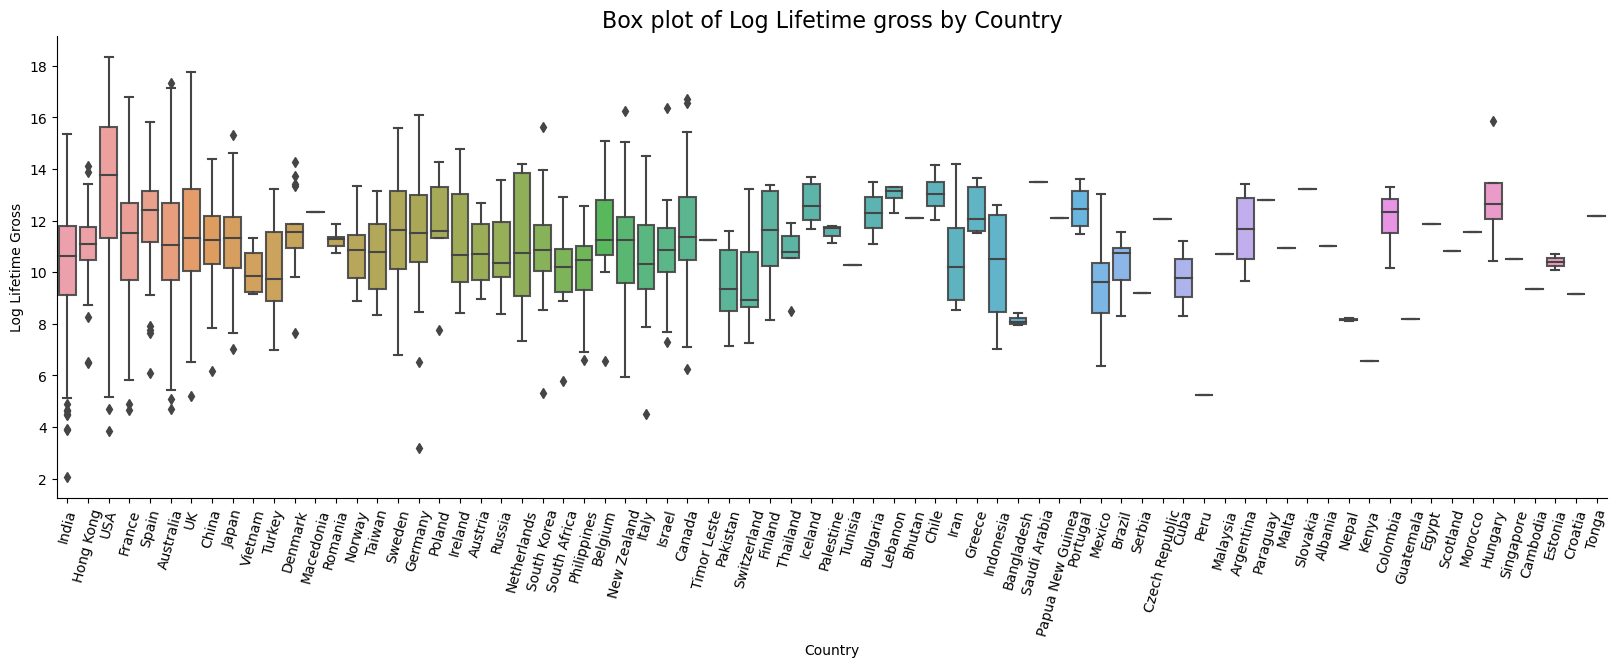

In [38]:
#5country
fig, ax = plt.subplots(figsize=(20,6))

sns.boxplot(x = train['Country1'], y = train['log_lifetime_gross']
               ,boxprops=dict(alpha=.9),
)
sns.despine()
plt.xlabel('Country',size = 10)
plt.xticks(rotation = 75)

plt.ylabel('Log Lifetime Gross',size = 10)

plt.title('Box plot of Log Lifetime gross by Country',size = 16)
plt.savefig('country.png',dpi = 800,bbox_inches='tight')

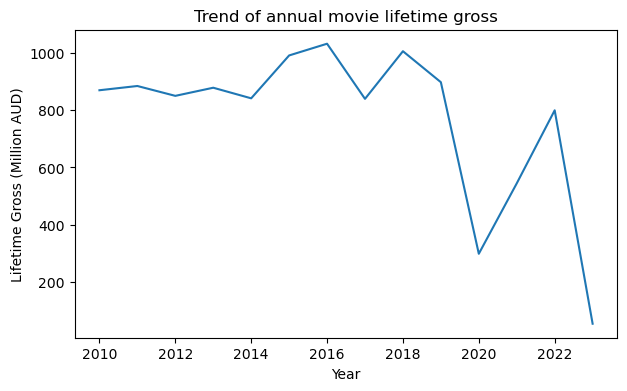

In [39]:
#6 trend of lifetime gross
yearly_gross=train.resample('Y',on='Release Date')['Lifetime_Gross'].sum()

plt.figure(figsize=(7,4))
plt.plot(yearly_gross.index.year,yearly_gross/1e6)
plt.ylabel('Lifetime Gross (Million AUD)')
plt.xlabel('Year')
plt.title('Trend of annual movie lifetime gross')
plt.savefig('annual.png',dpi = 800)

In [40]:
#distributor
distdesc=train.groupby('Distributor')['log_lifetime_gross'].describe().round(2).sort_values('count',ascending=False)
distdesc=distdesc[:20].index
distdesc


Index(['Madman', 'Sharmill', 'Roadshow', 'Mindblowing', 'Universal',
       'Southern Star', 'Palace', 'Independent', 'Sony', 'Paramount', 'Rialto',
       'Warner Bros.', 'Fox', 'Icon', 'Walt Disney', 'Eros Australia',
       'Studiocanal', 'eOne', 'MKS Retail', 'Transmission'],
      dtype='object', name='Distributor')

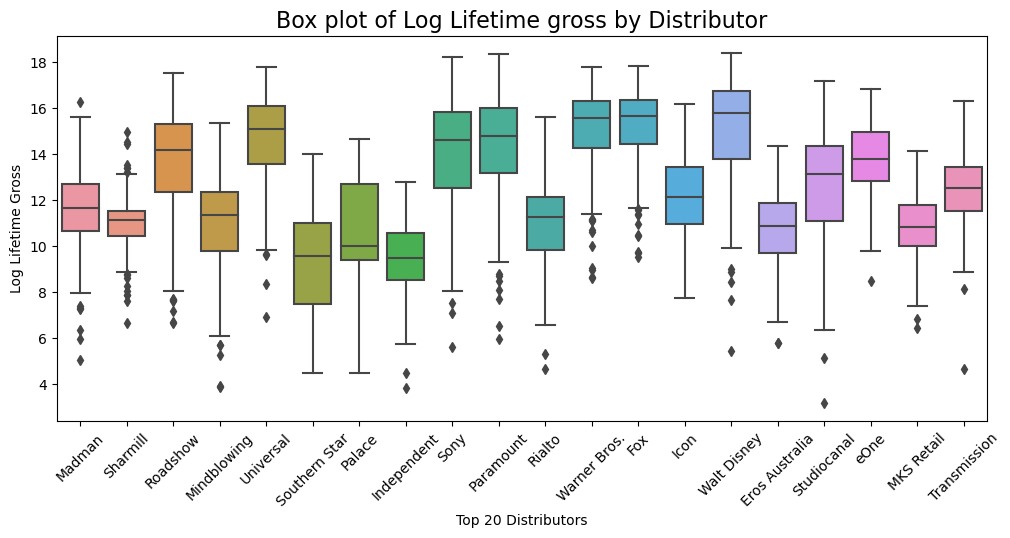

In [41]:
a=[]
for dist in distdesc:
    a.append(train[train['Distributor']==dist]['log_lifetime_gross'])
plt.figure(figsize = (12,5))
ax = sns.boxplot(a)
ax.set_xticklabels(distdesc)
plt.xlabel('Top 20 Distributors',size = 10)
plt.xticks(rotation = 45)

plt.ylabel('Log Lifetime Gross',size = 10)

plt.title('Box plot of Log Lifetime gross by Distributor',size = 16)
plt.savefig('distributor.png',dpi = 800,bbox_inches='tight')

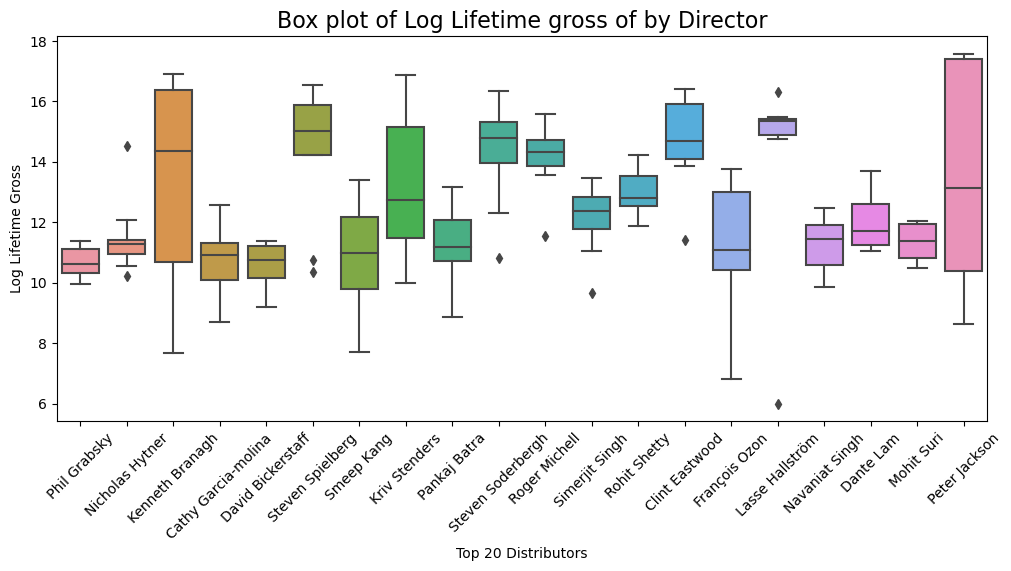

In [42]:
##director 1
distdesc=train.groupby('Director1')['log_lifetime_gross'].describe().round(2).sort_values('count',ascending=False)
distdesc=distdesc[:20].index
distdesc
a=[]
for dist in distdesc:
    a.append(train[train['Director1']==dist]['log_lifetime_gross'])
plt.figure(figsize = (12,5))
ax = sns.boxplot(a)
ax.set_xticklabels(distdesc)
plt.xlabel('Top 20 Distributors',size = 10)
plt.xticks(rotation = 45)

plt.ylabel('Log Lifetime Gross',size = 10)

plt.title('Box plot of Log Lifetime gross of by Director',size = 16)
plt.savefig('director.png',dpi = 800,bbox_inches='tight')

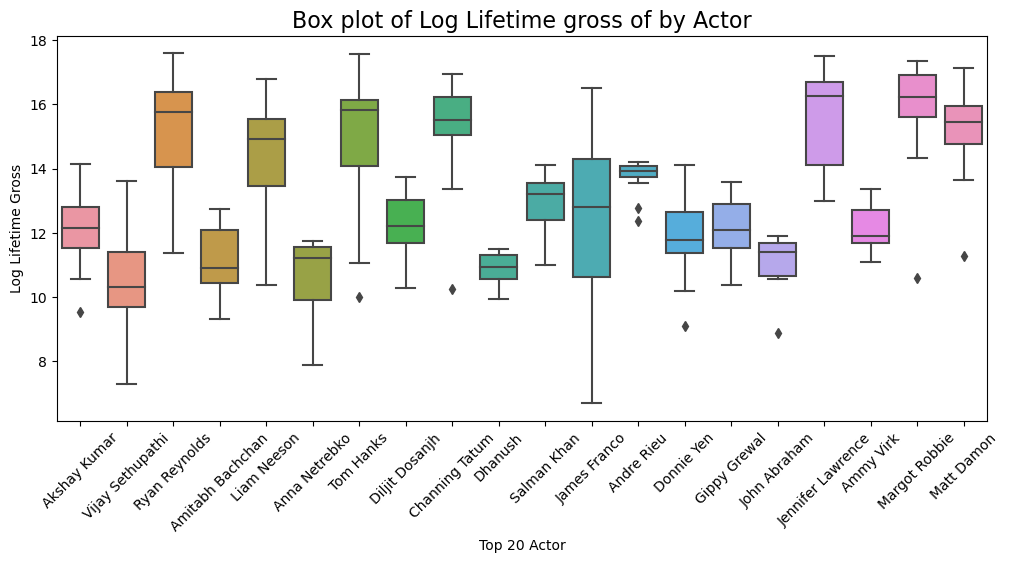

In [43]:
#Actor1
distdesc=train.groupby('Actor1')['log_lifetime_gross'].describe().round(2).sort_values('count',ascending=False)
distdesc=distdesc[:20].index
distdesc
a=[]
for dist in distdesc:
    a.append(train[train['Actor1']==dist]['log_lifetime_gross'])
plt.figure(figsize = (12,5))
ax = sns.boxplot(a)
ax.set_xticklabels(distdesc)
plt.xlabel('Top 20 Actor',size = 10)
plt.xticks(rotation = 45)

plt.ylabel('Log Lifetime Gross',size = 10)

plt.title('Box plot of Log Lifetime gross of by Actor',size = 16)
plt.savefig('Actor1.png',dpi = 800,bbox_inches='tight')

In [44]:
train['Director1'] = train['Director1'].fillna('missing')


In [45]:
director_avg_screen = train.groupby('Director1').agg({'Opening_Day_Screens':'mean'})
director_avg_screen.rename(columns = {'Opening_Day_Screens': 'director_avg_screen'}, inplace=True)

In [46]:
train = pd.merge(train, director_avg_screen, on=['Director1'], how='left')
train['director_avg_screen'] = train['director_avg_screen'].fillna(0)

In [47]:
train.loc[train['director_avg_screen']<=99,'Director1'] = 'Little_known_director'
train.loc[train['director_avg_screen'] >99,'Director1'] = 'Mainstream_director'

In [48]:
train['Director1'].value_counts()

Little_known_director    4340
Mainstream_director      1327
Name: Director1, dtype: int64

In [49]:
train['Actor1'] = train['Actor1'].fillna('missing')

In [50]:
actor_avg_screen = train.groupby('Actor1').agg({'Opening_Day_Screens':'mean'})
actor_avg_screen.rename(columns = {'Opening_Day_Screens': 'actor_avg_screen'}, inplace=True)

In [51]:
train = pd.merge(train, actor_avg_screen, on=['Actor1'], how='left')


In [52]:
train['actor_avg_screen'] = train['actor_avg_screen'].fillna(0)

In [53]:
train.loc[train['actor_avg_screen']<=99,'Actor1'] = 'Little_known_actor'
train.loc[train['actor_avg_screen'] >99,'Actor1'] = 'Mainstream_actor'

In [54]:
train['Actor1'].value_counts()

Little_known_actor    4179
Mainstream_actor      1488
Name: Actor1, dtype: int64

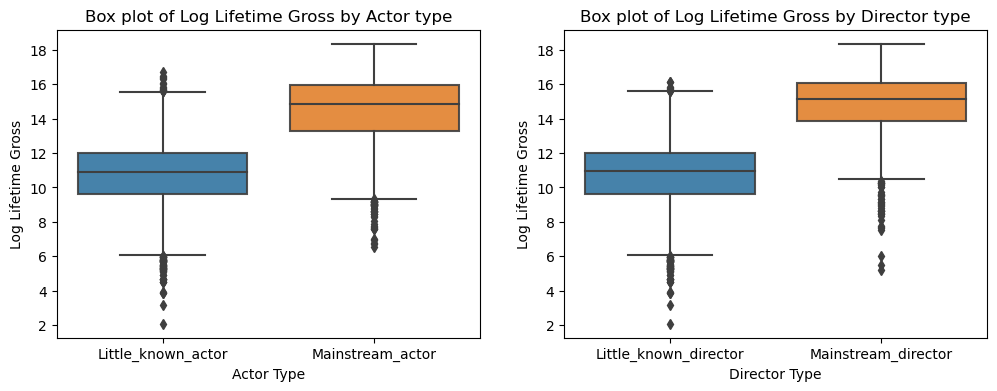

In [55]:
#director and actor
fig, ax = plt.subplots(figsize = (12, 4))
plt.subplot(1, 2, 1)
sns.boxplot(x = train['Actor1'], y = train['log_lifetime_gross'], 
            boxprops=dict(alpha=.9)
           )
plt.xlabel('Actor Type')
plt.ylabel('Log Lifetime Gross') 
plt.title('Box plot of Log Lifetime Gross by Actor type');
plt.subplot(1, 2, 2)
sns.boxplot(x = train['Director1'], y = train['log_lifetime_gross'], 
            boxprops=dict(alpha=.9)
           )
plt.xlabel('Director Type')
plt.ylabel('Log Lifetime Gross') 
plt.title('Box plot of Log Lifetime Gross by Director type');
plt.savefig('da.png',dpi = 800)

In [56]:
#preview
train.loc[(train['Preview_Gross'] != 0) & (train['Preview_Gross'].notnull()),'Preview_Gross'] = 1
train.loc[train['Preview_Gross'] == 0,'Preview_Gross'] = 0
train['Preview_Gross'] = train['Preview_Gross'].fillna(0)
train['Preview_Gross'].value_counts()

0.0    4329
1.0    1338
Name: Preview_Gross, dtype: int64

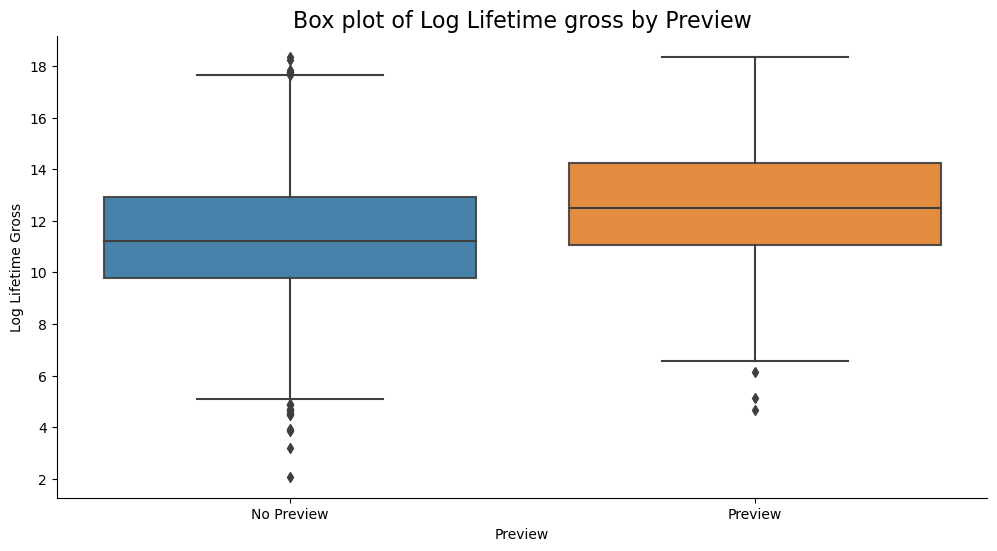

In [57]:
fig, ax = plt.subplots(figsize=(12,6))

sns.boxplot(x = train['Preview_Gross'], y = train['log_lifetime_gross'], 
            boxprops=dict(alpha=.9))
sns.despine()
# plt.xlabel('Preview',size = 10)
plt.ylabel('Log Lifetime Gross',size = 10)
plt.xlabel('Preview',size = 10)

plt.xticks([0,1],['No Preview','Preview'])
plt.title('Box plot of Log Lifetime gross by Preview',size = 16)
plt.savefig('Preview_Gross.png',dpi = 800)

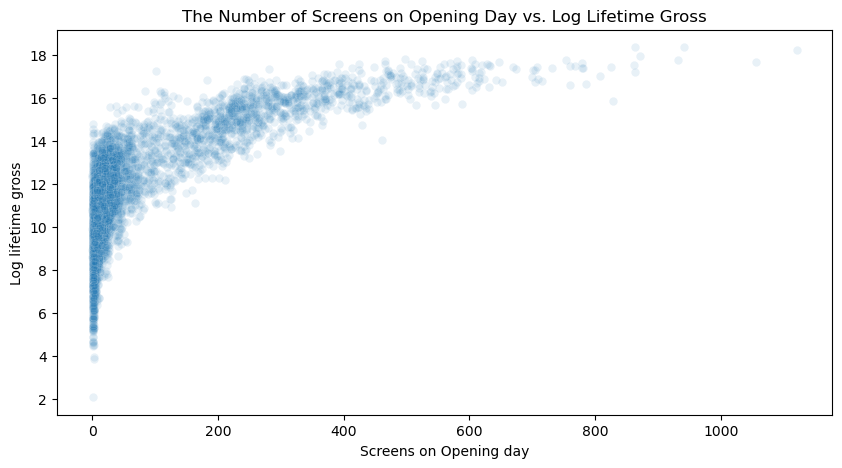

In [58]:
#scatter of opening day and log gross
plt.figure(figsize=(10,5))
sns.scatterplot(data = train,
                x='Opening_Day_Screens',
                y='log_lifetime_gross',
                alpha=.1)
plt.xlabel('Screens on Opening day')
plt.ylabel('Log lifetime gross') 
plt.title('The Number of Screens on Opening Day vs. Log Lifetime Gross')
plt.savefig('scatter.png',dpi = 800)

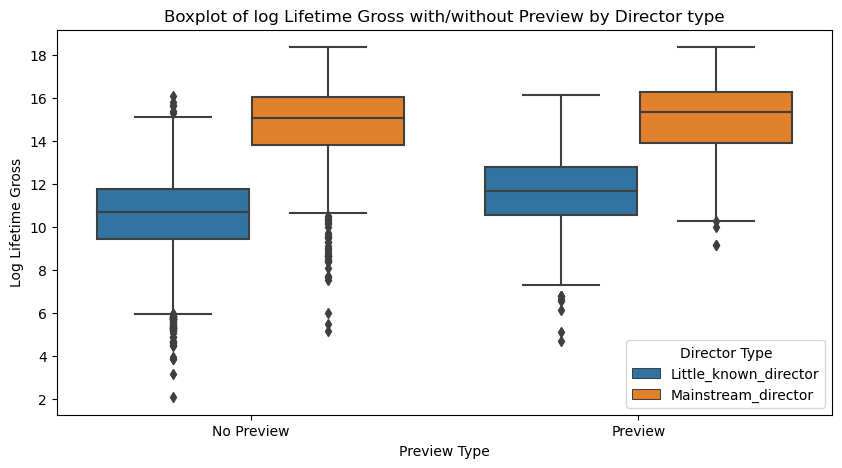

In [59]:
#interaction effect
plt.figure(figsize=(10,5))
bp_preview = sns.boxplot(x="Preview_Gross", 
                         y="log_lifetime_gross", 
                         hue='Director1', 
                         data=train)
plt.legend(title = 'Director Type')
plt.xticks([0,1],['No Preview','Preview'])

plt.xlabel('Preview Type')
plt.ylabel('Log Lifetime Gross') 
plt.title('Boxplot of log Lifetime Gross with/without Preview by Director type')
plt.savefig('interactrion.png',dpi = 800)

## Categorical

### Covid Period

In [60]:
# covid_dummy = pd.get_dummies(train['Covid_Period'])

In [61]:
# covid_dummy

In [62]:
covid_dummy1 = pd.get_dummies(tran_linear['Covid_Period'], drop_first = True)

In [63]:
covid_dummy2 = pd.get_dummies(tran_tree['Covid_Period'])

In [64]:
tran_linear = pd.concat([tran_linear,covid_dummy1],axis = 1)
tran_linear

,Title,Distributor,Release Date,Rating,Genre1,Country1,Director1,Actor1,Preview_Gross,Opening_Day,Opening_Day_Screens,Covid_Period,Lifetime_Gross,log_lifetime_gross,post,pre
3025,Golak Bugni Bank Te Batua,Mindblowing,2018-04-13,PG,Comedy,India,Ksshitj Chaudhary,Amrinder Gill,NaN,Friday,32.0,pre,289735,12.576722,0,1
2911,Race 3,Mindblowing,2018-06-15,MA15+,Action,India,Remo,Salman Khan,NaN,Friday,56.0,pre,720315,13.487444,0,1
6826,"Child's Eye 3D, The",Dream Movie,2010-10-28,MA15+,Horror,Hong Kong,Oxide Pang Chun,Raine Yang,NaN,Thursday,7.0,pre,69713,11.152142,0,1
4442,America Wild 3D,Imax,2016-02-25,EX,Documentary,USA,missing,Robert Redford,431.0,Thursday,NaN,pre,195115,12.181344,0,1
520,Opéra de Paris: Cinderella,Palace,2022-05-28,EX,Special Event,France,Mariame Clément,Daniela Barcelona,NaN,Saturday,10.0,post,7017,8.856091,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4241,Royal Ballet: Frankenstein,Palace,2016-01-07,EX,Special Event,UK,missing,NaN,NaN,Friday,9.0,pre,14535,9.584315,0,1
3057,Cake,Mindblowing,2018-03-30,M,Drama,India,Asim Abbasi,Sanam Saeed,NaN,Friday,10.0,pre,20579,9.932026,0,1
6301,This Must Be The Place,eOne,2012-05-04,M,Comedy,Italy,Paolo Sorrentino,Sean Penn,NaN,Thursday,16.0,pre,371031,12.824041,0,1
4761,Vaalu,Eros Australia,2015-07-31,M,Comedy,India,Vijay Chandar,T.R. Silambarasan,NaN,Friday,6.0,pre,16765,9.727049,0,1


In [65]:
tran_tree = pd.concat([tran_tree,covid_dummy2],axis = 1)
tran_tree

,Title,Distributor,Release Date,Rating,Genre1,Country1,Director1,Actor1,Preview_Gross,Opening_Day,Opening_Day_Screens,Covid_Period,Lifetime_Gross,log_lifetime_gross,lockdown,post,pre
3025,Golak Bugni Bank Te Batua,Mindblowing,2018-04-13,PG,Comedy,India,Ksshitj Chaudhary,Amrinder Gill,NaN,Friday,32.0,pre,289735,12.576722,0,0,1
2911,Race 3,Mindblowing,2018-06-15,MA15+,Action,India,Remo,Salman Khan,NaN,Friday,56.0,pre,720315,13.487444,0,0,1
6826,"Child's Eye 3D, The",Dream Movie,2010-10-28,MA15+,Horror,Hong Kong,Oxide Pang Chun,Raine Yang,NaN,Thursday,7.0,pre,69713,11.152142,0,0,1
4442,America Wild 3D,Imax,2016-02-25,EX,Documentary,USA,missing,Robert Redford,431.0,Thursday,NaN,pre,195115,12.181344,0,0,1
520,Opéra de Paris: Cinderella,Palace,2022-05-28,EX,Special Event,France,Mariame Clément,Daniela Barcelona,NaN,Saturday,10.0,post,7017,8.856091,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4241,Royal Ballet: Frankenstein,Palace,2016-01-07,EX,Special Event,UK,missing,NaN,NaN,Friday,9.0,pre,14535,9.584315,0,0,1
3057,Cake,Mindblowing,2018-03-30,M,Drama,India,Asim Abbasi,Sanam Saeed,NaN,Friday,10.0,pre,20579,9.932026,0,0,1
6301,This Must Be The Place,eOne,2012-05-04,M,Comedy,Italy,Paolo Sorrentino,Sean Penn,NaN,Thursday,16.0,pre,371031,12.824041,0,0,1
4761,Vaalu,Eros Australia,2015-07-31,M,Comedy,India,Vijay Chandar,T.R. Silambarasan,NaN,Friday,6.0,pre,16765,9.727049,0,0,1


In [66]:
# train = pd.concat([train,covid_dummy],axis = 1)
# train

In [67]:
covid_dummy3 = pd.get_dummies(test_linear['Covid_Period'], drop_first = True)

In [68]:
covid_dummy4 = pd.get_dummies(test_tree['Covid_Period'])

In [69]:
test_linear = pd.concat([test_linear,covid_dummy3],axis = 1)
test_linear

,Title,Distributor,Release Date,Rating,Genre1,Country1,Director1,Actor1,Preview_Gross,Opening_Day,Opening_Day_Screens,Covid_Period,Lifetime_Gross,log_lifetime_gross,post,pre
691,Monsieur Verdoux (1947) (RE: 2022),Piece of Magic Entertainment,2022-03-03,PG,Comedy,USA,Charles Chaplin,Charles Chaplin,NaN,Thursday,NaN,post,2377,7.773594,1,0
2877,Ant-Man and the Wasp,Walt Disney,2018-05-07,PG,Action,USA,Peyton Reed,Paul Rudd,506490.0,Thursday,613.0,pre,19851398,16.803785,0,1
3141,Aiyaary,Mindblowing,2018-02-16,M,Action,India,Neeraj Pandey,Rakul Preet Singh,24.0,Friday,34.0,pre,130911,11.782273,0,1
2824,"Last Suit, The",Moving Story Entertainment,2018-02-08,TBC,Drama,Spain,Pablo Solarz,Natalia Verbeke,1400.0,Thursday,4.0,pre,80210,11.292403,0,1
2085,"Lion King, The (2019)",Walt Disney,2019-07-17,PG,Adventure,USA,Jon Favreau,Billy Eichner,4216722.0,Wednesday,899.0,pre,64138378,17.976553,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
941,"Royal Game, The",Studiocanal,2021-09-23,M,Drama,Germany,Philipp Stölzl,Oliver Masucci,NaN,Thursday,NaN,lockdown,36,3.583519,0,0
3893,Sarvann,Mindblowing,2017-01-13,M,Thriller,India,Karaan Guliani,Amrinder Gill,NaN,Friday,25.0,pre,207068,12.240803,0,1
6125,Dreams Of A Life,Madman,2012-09-13,PG,Documentary,UK,Carol Morley,Zawe Ashton,NaN,Thursday,1.0,pre,26389,10.180703,0,1
6741,James Cameron Presents Sanctum,Universal,2011-03-02,M,Adventure,Australia,Alister Grierson,Richard Roxburgh,NaN,Thursday,252.0,pre,3871962,15.169272,0,1


In [70]:
test_tree = pd.concat([test_tree,covid_dummy4],axis = 1)
test_tree

,Title,Distributor,Release Date,Rating,Genre1,Country1,Director1,Actor1,Preview_Gross,Opening_Day,Opening_Day_Screens,Covid_Period,Lifetime_Gross,log_lifetime_gross,lockdown,post,pre
691,Monsieur Verdoux (1947) (RE: 2022),Piece of Magic Entertainment,2022-03-03,PG,Comedy,USA,Charles Chaplin,Charles Chaplin,NaN,Thursday,NaN,post,2377,7.773594,0,1,0
2877,Ant-Man and the Wasp,Walt Disney,2018-05-07,PG,Action,USA,Peyton Reed,Paul Rudd,506490.0,Thursday,613.0,pre,19851398,16.803785,0,0,1
3141,Aiyaary,Mindblowing,2018-02-16,M,Action,India,Neeraj Pandey,Rakul Preet Singh,24.0,Friday,34.0,pre,130911,11.782273,0,0,1
2824,"Last Suit, The",Moving Story Entertainment,2018-02-08,TBC,Drama,Spain,Pablo Solarz,Natalia Verbeke,1400.0,Thursday,4.0,pre,80210,11.292403,0,0,1
2085,"Lion King, The (2019)",Walt Disney,2019-07-17,PG,Adventure,USA,Jon Favreau,Billy Eichner,4216722.0,Wednesday,899.0,pre,64138378,17.976553,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
941,"Royal Game, The",Studiocanal,2021-09-23,M,Drama,Germany,Philipp Stölzl,Oliver Masucci,NaN,Thursday,NaN,lockdown,36,3.583519,1,0,0
3893,Sarvann,Mindblowing,2017-01-13,M,Thriller,India,Karaan Guliani,Amrinder Gill,NaN,Friday,25.0,pre,207068,12.240803,0,0,1
6125,Dreams Of A Life,Madman,2012-09-13,PG,Documentary,UK,Carol Morley,Zawe Ashton,NaN,Thursday,1.0,pre,26389,10.180703,0,0,1
6741,James Cameron Presents Sanctum,Universal,2011-03-02,M,Adventure,Australia,Alister Grierson,Richard Roxburgh,NaN,Thursday,252.0,pre,3871962,15.169272,0,0,1


### Rating

In [71]:
# for i in train[train['Rating'].isnull()].index:
#     train.loc[i,'Rating']='TBC'

In [72]:
Rating_missing = data[data[['Rating']].isnull().T.any()]
Rating_missing['Country1'].value_counts()
# most from India 

India           61
France           7
USA              6
Australia        4
Japan            3
Iran             3
UK               2
New Zealand      2
China            2
Germany          2
South Africa     1
Turkey           1
Italy            1
Poland           1
Switzerland      1
Israel           1
Philippines      1
Belgium          1
Bangladesh       1
Netherlands      1
South Korea      1
Name: Country1, dtype: int64

In [73]:
Rating_missing['Opening_Day_Screens'].describe()
# very few screens

count    84.000000
mean      5.452381
std      11.622998
min       1.000000
25%       1.000000
50%       2.500000
75%       5.000000
max      82.000000
Name: Opening_Day_Screens, dtype: float64

In [74]:
for i in tran_linear[tran_linear['Rating'].isnull()].index:
    tran_linear.loc[i,'Rating']='TBC'

In [75]:
for i in tran_tree[tran_tree['Rating'].isnull()].index:
    tran_tree.loc[i,'Rating']='TBC'

In [76]:
for i in test_linear[test_linear['Rating'].isnull()].index:
    test_linear.loc[i,'Rating']='TBC'

In [77]:
for i in test_tree[test_tree['Rating'].isnull()].index:
    test_tree.loc[i,'Rating']='TBC'

In [78]:
# #get dummy variables for Rating column
# rating_dummy = pd.get_dummies(train['Rating'])
# rating_dummy

In [79]:
#get dummy variables for Rating column
rating_dummy1 = pd.get_dummies(tran_linear['Rating'], drop_first  = True)
rating_dummy1

,G,M,MA15+,PG,R18+,TBC,VARIOUS
3025,0,0,0,1,0,0,0
2911,0,0,1,0,0,0,0
6826,0,0,1,0,0,0,0
4442,0,0,0,0,0,0,0
520,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...
4241,0,0,0,0,0,0,0
3057,0,1,0,0,0,0,0
6301,0,1,0,0,0,0,0
4761,0,1,0,0,0,0,0


In [80]:
rating_dummy2 = pd.get_dummies(tran_tree['Rating'])
rating_dummy2

,EX,G,M,MA15+,PG,R18+,TBC,VARIOUS
3025,0,0,0,0,1,0,0,0
2911,0,0,0,1,0,0,0,0
6826,0,0,0,1,0,0,0,0
4442,1,0,0,0,0,0,0,0
520,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
4241,1,0,0,0,0,0,0,0
3057,0,0,1,0,0,0,0,0
6301,0,0,1,0,0,0,0,0
4761,0,0,1,0,0,0,0,0


In [81]:
rating_dummy3 = pd.get_dummies(test_linear['Rating'], drop_first  = True)
rating_dummy3

,G,M,MA15+,PG,R18+,TBC,VARIOUS
691,0,0,0,1,0,0,0
2877,0,0,0,1,0,0,0
3141,0,1,0,0,0,0,0
2824,0,0,0,0,0,1,0
2085,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...
941,0,1,0,0,0,0,0
3893,0,1,0,0,0,0,0
6125,0,0,0,1,0,0,0
6741,0,1,0,0,0,0,0


In [82]:
rating_dummy4 = pd.get_dummies(test_tree['Rating'])
rating_dummy4

,EX,G,M,MA15+,PG,R18+,TBC,VARIOUS
691,0,0,0,0,1,0,0,0
2877,0,0,0,0,1,0,0,0
3141,0,0,1,0,0,0,0,0
2824,0,0,0,0,0,0,1,0
2085,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...
941,0,0,1,0,0,0,0,0
3893,0,0,1,0,0,0,0,0
6125,0,0,0,0,1,0,0,0
6741,0,0,1,0,0,0,0,0


In [83]:
# train = pd.concat([train,rating_dummy],axis = 1)
# train

In [84]:
tran_linear = pd.concat([tran_linear,rating_dummy1],axis = 1)
tran_linear

,Title,Distributor,Release Date,Rating,Genre1,Country1,Director1,Actor1,Preview_Gross,Opening_Day,...,log_lifetime_gross,post,pre,G,M,MA15+,PG,R18+,TBC,VARIOUS
3025,Golak Bugni Bank Te Batua,Mindblowing,2018-04-13,PG,Comedy,India,Ksshitj Chaudhary,Amrinder Gill,NaN,Friday,...,12.576722,0,1,0,0,0,1,0,0,0
2911,Race 3,Mindblowing,2018-06-15,MA15+,Action,India,Remo,Salman Khan,NaN,Friday,...,13.487444,0,1,0,0,1,0,0,0,0
6826,"Child's Eye 3D, The",Dream Movie,2010-10-28,MA15+,Horror,Hong Kong,Oxide Pang Chun,Raine Yang,NaN,Thursday,...,11.152142,0,1,0,0,1,0,0,0,0
4442,America Wild 3D,Imax,2016-02-25,EX,Documentary,USA,missing,Robert Redford,431.0,Thursday,...,12.181344,0,1,0,0,0,0,0,0,0
520,Opéra de Paris: Cinderella,Palace,2022-05-28,EX,Special Event,France,Mariame Clément,Daniela Barcelona,NaN,Saturday,...,8.856091,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4241,Royal Ballet: Frankenstein,Palace,2016-01-07,EX,Special Event,UK,missing,NaN,NaN,Friday,...,9.584315,0,1,0,0,0,0,0,0,0
3057,Cake,Mindblowing,2018-03-30,M,Drama,India,Asim Abbasi,Sanam Saeed,NaN,Friday,...,9.932026,0,1,0,1,0,0,0,0,0
6301,This Must Be The Place,eOne,2012-05-04,M,Comedy,Italy,Paolo Sorrentino,Sean Penn,NaN,Thursday,...,12.824041,0,1,0,1,0,0,0,0,0
4761,Vaalu,Eros Australia,2015-07-31,M,Comedy,India,Vijay Chandar,T.R. Silambarasan,NaN,Friday,...,9.727049,0,1,0,1,0,0,0,0,0


In [85]:
tran_tree = pd.concat([tran_tree,rating_dummy2],axis = 1)
tran_tree

,Title,Distributor,Release Date,Rating,Genre1,Country1,Director1,Actor1,Preview_Gross,Opening_Day,...,post,pre,EX,G,M,MA15+,PG,R18+,TBC,VARIOUS
3025,Golak Bugni Bank Te Batua,Mindblowing,2018-04-13,PG,Comedy,India,Ksshitj Chaudhary,Amrinder Gill,NaN,Friday,...,0,1,0,0,0,0,1,0,0,0
2911,Race 3,Mindblowing,2018-06-15,MA15+,Action,India,Remo,Salman Khan,NaN,Friday,...,0,1,0,0,0,1,0,0,0,0
6826,"Child's Eye 3D, The",Dream Movie,2010-10-28,MA15+,Horror,Hong Kong,Oxide Pang Chun,Raine Yang,NaN,Thursday,...,0,1,0,0,0,1,0,0,0,0
4442,America Wild 3D,Imax,2016-02-25,EX,Documentary,USA,missing,Robert Redford,431.0,Thursday,...,0,1,1,0,0,0,0,0,0,0
520,Opéra de Paris: Cinderella,Palace,2022-05-28,EX,Special Event,France,Mariame Clément,Daniela Barcelona,NaN,Saturday,...,1,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4241,Royal Ballet: Frankenstein,Palace,2016-01-07,EX,Special Event,UK,missing,NaN,NaN,Friday,...,0,1,1,0,0,0,0,0,0,0
3057,Cake,Mindblowing,2018-03-30,M,Drama,India,Asim Abbasi,Sanam Saeed,NaN,Friday,...,0,1,0,0,1,0,0,0,0,0
6301,This Must Be The Place,eOne,2012-05-04,M,Comedy,Italy,Paolo Sorrentino,Sean Penn,NaN,Thursday,...,0,1,0,0,1,0,0,0,0,0
4761,Vaalu,Eros Australia,2015-07-31,M,Comedy,India,Vijay Chandar,T.R. Silambarasan,NaN,Friday,...,0,1,0,0,1,0,0,0,0,0


In [86]:
test_linear = pd.concat([test_linear,rating_dummy3],axis = 1)
test_linear

,Title,Distributor,Release Date,Rating,Genre1,Country1,Director1,Actor1,Preview_Gross,Opening_Day,...,log_lifetime_gross,post,pre,G,M,MA15+,PG,R18+,TBC,VARIOUS
691,Monsieur Verdoux (1947) (RE: 2022),Piece of Magic Entertainment,2022-03-03,PG,Comedy,USA,Charles Chaplin,Charles Chaplin,NaN,Thursday,...,7.773594,1,0,0,0,0,1,0,0,0
2877,Ant-Man and the Wasp,Walt Disney,2018-05-07,PG,Action,USA,Peyton Reed,Paul Rudd,506490.0,Thursday,...,16.803785,0,1,0,0,0,1,0,0,0
3141,Aiyaary,Mindblowing,2018-02-16,M,Action,India,Neeraj Pandey,Rakul Preet Singh,24.0,Friday,...,11.782273,0,1,0,1,0,0,0,0,0
2824,"Last Suit, The",Moving Story Entertainment,2018-02-08,TBC,Drama,Spain,Pablo Solarz,Natalia Verbeke,1400.0,Thursday,...,11.292403,0,1,0,0,0,0,0,1,0
2085,"Lion King, The (2019)",Walt Disney,2019-07-17,PG,Adventure,USA,Jon Favreau,Billy Eichner,4216722.0,Wednesday,...,17.976553,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
941,"Royal Game, The",Studiocanal,2021-09-23,M,Drama,Germany,Philipp Stölzl,Oliver Masucci,NaN,Thursday,...,3.583519,0,0,0,1,0,0,0,0,0
3893,Sarvann,Mindblowing,2017-01-13,M,Thriller,India,Karaan Guliani,Amrinder Gill,NaN,Friday,...,12.240803,0,1,0,1,0,0,0,0,0
6125,Dreams Of A Life,Madman,2012-09-13,PG,Documentary,UK,Carol Morley,Zawe Ashton,NaN,Thursday,...,10.180703,0,1,0,0,0,1,0,0,0
6741,James Cameron Presents Sanctum,Universal,2011-03-02,M,Adventure,Australia,Alister Grierson,Richard Roxburgh,NaN,Thursday,...,15.169272,0,1,0,1,0,0,0,0,0


In [87]:
test_tree = pd.concat([test_tree,rating_dummy4],axis = 1)
test_tree

,Title,Distributor,Release Date,Rating,Genre1,Country1,Director1,Actor1,Preview_Gross,Opening_Day,...,post,pre,EX,G,M,MA15+,PG,R18+,TBC,VARIOUS
691,Monsieur Verdoux (1947) (RE: 2022),Piece of Magic Entertainment,2022-03-03,PG,Comedy,USA,Charles Chaplin,Charles Chaplin,NaN,Thursday,...,1,0,0,0,0,0,1,0,0,0
2877,Ant-Man and the Wasp,Walt Disney,2018-05-07,PG,Action,USA,Peyton Reed,Paul Rudd,506490.0,Thursday,...,0,1,0,0,0,0,1,0,0,0
3141,Aiyaary,Mindblowing,2018-02-16,M,Action,India,Neeraj Pandey,Rakul Preet Singh,24.0,Friday,...,0,1,0,0,1,0,0,0,0,0
2824,"Last Suit, The",Moving Story Entertainment,2018-02-08,TBC,Drama,Spain,Pablo Solarz,Natalia Verbeke,1400.0,Thursday,...,0,1,0,0,0,0,0,0,1,0
2085,"Lion King, The (2019)",Walt Disney,2019-07-17,PG,Adventure,USA,Jon Favreau,Billy Eichner,4216722.0,Wednesday,...,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
941,"Royal Game, The",Studiocanal,2021-09-23,M,Drama,Germany,Philipp Stölzl,Oliver Masucci,NaN,Thursday,...,0,0,0,0,1,0,0,0,0,0
3893,Sarvann,Mindblowing,2017-01-13,M,Thriller,India,Karaan Guliani,Amrinder Gill,NaN,Friday,...,0,1,0,0,1,0,0,0,0,0
6125,Dreams Of A Life,Madman,2012-09-13,PG,Documentary,UK,Carol Morley,Zawe Ashton,NaN,Thursday,...,0,1,0,0,0,0,1,0,0,0
6741,James Cameron Presents Sanctum,Universal,2011-03-02,M,Adventure,Australia,Alister Grierson,Richard Roxburgh,NaN,Thursday,...,0,1,0,0,1,0,0,0,0,0


### Genre

In [88]:
# #put genre type less than 50 to an 'others' type
# others = train['Genre1'].value_counts()[train['Genre1'].value_counts() < 50].index
# train.loc[train['Genre1'].isin(others), 'Genre1']='Others'

In [89]:
#put genre type less than 50 to an 'others' type
others1 = tran_linear['Genre1'].value_counts()[tran_linear['Genre1'].value_counts() < 50].index
tran_linear.loc[tran_linear['Genre1'].isin(others1), 'Genre1']='Others'

In [90]:
others2 = tran_tree['Genre1'].value_counts()[tran_tree['Genre1'].value_counts() < 50].index
tran_tree.loc[tran_tree['Genre1'].isin(others2), 'Genre1']='Others'

In [91]:
test_linear['Genre1'].value_counts()

Drama              371
Comedy             279
Action             277
Documentary        144
Special Event      107
Adventure           85
Thriller            45
Horror              36
Family              18
Romance             16
Musical              7
Animated             6
Romantic Comedy      5
Biography            5
Crime                4
Western              2
Opera                2
History              2
Mystery              1
Music                1
Sci-fi               1
War                  1
Concert              1
Ballet               1
Name: Genre1, dtype: int64

In [92]:
test_tree['Genre1'].value_counts()

Drama              371
Comedy             279
Action             277
Documentary        144
Special Event      107
Adventure           85
Thriller            45
Horror              36
Family              18
Romance             16
Musical              7
Animated             6
Romantic Comedy      5
Biography            5
Crime                4
Western              2
Opera                2
History              2
Mystery              1
Music                1
Sci-fi               1
War                  1
Concert              1
Ballet               1
Name: Genre1, dtype: int64

In [93]:
test_linear.loc[(test_linear['Genre1'] != 'Action') & (test_linear['Genre1'] != 'Adventure') 
                & (test_linear['Genre1'] != 'Comedy')&(test_linear['Genre1'] != 'Documentary')
                 &(test_linear['Genre1'] != 'Drama') & (test_linear['Genre1'] != 'Horror') 
                 & (test_linear['Genre1'] != 'Romance') & (test_linear['Genre1'] != 'Special Event') 
                 & (test_linear['Genre1'] != 'Thriller'),'Genre1'] = 'Others'
test_linear['Genre1'].value_counts()

Drama            371
Comedy           279
Action           277
Documentary      144
Special Event    107
Adventure         85
Others            58
Thriller          45
Horror            36
Romance           16
Name: Genre1, dtype: int64

In [94]:
test_tree.loc[(test_tree['Genre1'] != 'Action') & (test_tree['Genre1'] != 'Adventure') & (test_tree['Genre1'] != 'Comedy')&(test_tree['Genre1'] != 'Documentary') &(test_tree['Genre1'] != 'Drama') & (test_tree['Genre1'] != 'Horror') & (test_tree['Genre1'] != 'Romance') & (test_tree['Genre1'] != 'Special Event') & (test_tree['Genre1'] != 'Thriller'),'Genre1'] = 'Others'
test_tree['Genre1'].value_counts()

Drama            371
Comedy           279
Action           277
Documentary      144
Special Event    107
Adventure         85
Others            58
Thriller          45
Horror            36
Romance           16
Name: Genre1, dtype: int64

In [95]:
# test set cannot use value counts because the number of entries is different
# others3 = test_linear['Genre1'].value_counts()[test_linear['Genre1'].value_counts() < 50].index
# test_linear.loc[test_linear['Genre1'].isin(others3), 'Genre1']='Others'

In [96]:
# others4 = test_tree['Genre1'].value_counts()[test_tree['Genre1'].value_counts() < 50].index
# test_tree.loc[test_tree['Genre1'].isin(others4), 'Genre1']='Others'

In [97]:
# for i in train[train['Genre1'].isnull()].index:
#     train.loc[i,'Genre1']='Others'

In [98]:
for i in tran_linear[tran_linear['Genre1'].isnull()].index:
    tran_linear.loc[i,'Genre1']='Others'

In [99]:
for i in tran_tree[tran_tree['Genre1'].isnull()].index:
    tran_tree.loc[i,'Genre1']='Others'

In [100]:
for i in test_linear[test_linear['Genre1'].isnull()].index:
    test_linear.loc[i,'Genre1']='Others'

In [101]:
for i in test_tree[test_tree['Genre1'].isnull()].index:
    test_tree.loc[i,'Genre1']='Others'

In [102]:
# genre_dummy = pd.get_dummies(train['Genre1'])
# genre_dummy

In [103]:
genre_dummy1 = pd.get_dummies(tran_linear['Genre1'], drop_first = True)
genre_dummy1

,Adventure,Comedy,Documentary,Drama,Horror,Others,Romance,Special Event,Thriller
3025,0,1,0,0,0,0,0,0,0
2911,0,0,0,0,0,0,0,0,0
6826,0,0,0,0,1,0,0,0,0
4442,0,0,1,0,0,0,0,0,0
520,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...
4241,0,0,0,0,0,0,0,1,0
3057,0,0,0,1,0,0,0,0,0
6301,0,1,0,0,0,0,0,0,0
4761,0,1,0,0,0,0,0,0,0


In [104]:
genre_dummy2 = pd.get_dummies(tran_tree['Genre1'])
genre_dummy2

,Action,Adventure,Comedy,Documentary,Drama,Horror,Others,Romance,Special Event,Thriller
3025,0,0,1,0,0,0,0,0,0,0
2911,1,0,0,0,0,0,0,0,0,0
6826,0,0,0,0,0,1,0,0,0,0
4442,0,0,0,1,0,0,0,0,0,0
520,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
4241,0,0,0,0,0,0,0,0,1,0
3057,0,0,0,0,1,0,0,0,0,0
6301,0,0,1,0,0,0,0,0,0,0
4761,0,0,1,0,0,0,0,0,0,0


In [105]:
genre_dummy3 = pd.get_dummies(test_linear['Genre1'], drop_first = True)
genre_dummy3

,Adventure,Comedy,Documentary,Drama,Horror,Others,Romance,Special Event,Thriller
691,0,1,0,0,0,0,0,0,0
2877,0,0,0,0,0,0,0,0,0
3141,0,0,0,0,0,0,0,0,0
2824,0,0,0,1,0,0,0,0,0
2085,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
941,0,0,0,1,0,0,0,0,0
3893,0,0,0,0,0,0,0,0,1
6125,0,0,1,0,0,0,0,0,0
6741,1,0,0,0,0,0,0,0,0


In [106]:
genre_dummy4 = pd.get_dummies(test_tree['Genre1'])
genre_dummy4

,Action,Adventure,Comedy,Documentary,Drama,Horror,Others,Romance,Special Event,Thriller
691,0,0,1,0,0,0,0,0,0,0
2877,1,0,0,0,0,0,0,0,0,0
3141,1,0,0,0,0,0,0,0,0,0
2824,0,0,0,0,1,0,0,0,0,0
2085,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
941,0,0,0,0,1,0,0,0,0,0
3893,0,0,0,0,0,0,0,0,0,1
6125,0,0,0,1,0,0,0,0,0,0
6741,0,1,0,0,0,0,0,0,0,0


In [107]:
# train = pd.concat([train,genre_dummy],axis = 1)

In [108]:
tran_linear = pd.concat([tran_linear,genre_dummy1],axis = 1)

In [109]:
tran_tree = pd.concat([tran_tree,genre_dummy2],axis = 1)

In [110]:
test_linear = pd.concat([test_linear,genre_dummy3],axis = 1)

In [111]:
test_tree = pd.concat([test_tree,genre_dummy4],axis = 1)

### Country

In [112]:
# #put genre type less than 50 to an 'others' type
# #we only consider country that produce over 50 movies
# others = train['Country1'].value_counts()[train['Country1'].value_counts() < 50].index
# train.loc[train['Country1'].isin(others), 'Country1']='Others'

In [113]:
#put genre type less than 50 to an 'others' type
#we only consider country that produce over 50 movies
others1 = tran_linear['Country1'].value_counts()[tran_linear['Country1'].value_counts() < 50].index
tran_linear.loc[tran_linear['Country1'].isin(others1), 'Country1']='OtherCountry'

In [114]:
#put genre type less than 50 to an 'others' type
#we only consider country that produce over 50 movies
others2 = tran_tree['Country1'].value_counts()[tran_tree['Country1'].value_counts() < 50].index
tran_tree.loc[tran_tree['Country1'].isin(others2), 'Country1']='OtherCountry'

In [115]:
test_linear.loc[(test_linear['Country1'] != 'France') & (test_linear['Country1'] != 'India') & (test_linear['Country1'] != 'Australia')&(test_linear['Country1'] != 'UK')&(test_linear['Country1'] != 'USA'),'Country1'] = 'OtherCountry'
test_linear['Country1'].value_counts()

USA             449
India           321
OtherCountry    306
UK              156
Australia       120
France           66
Name: Country1, dtype: int64

In [116]:
test_tree.loc[(test_tree['Country1'] != 'France') & (test_tree['Country1'] != 'India') & (test_tree['Country1'] != 'Australia')&(test_tree['Country1'] != 'UK')&(test_tree['Country1'] != 'USA'),'Country1'] = 'OtherCountry'
test_tree['Country1'].value_counts()

USA             449
India           321
OtherCountry    306
UK              156
Australia       120
France           66
Name: Country1, dtype: int64

In [117]:
# others3 = test_linear['Country1'].value_counts()[test_linear['Country1'].value_counts() < 50].index
# test_linear.loc[test_linear['Country1'].isin(others3), 'Country1']='OtherCountry'

In [118]:
# others4 = test_tree['Country1'].value_counts()[test_tree['Country1'].value_counts() < 50].index
# test_tree.loc[test_tree['Country1'].isin(others4), 'Country1']='OtherCountry'

In [119]:
# for i in train[train['Country1'].isnull()].index:
#     train.loc[i,'Country1']='Others'

In [120]:
for i in tran_linear[tran_linear['Country1'].isnull()].index:
    tran_linear.loc[i,'Country1']='OtherCountry'

In [121]:
for i in tran_tree[tran_tree['Country1'].isnull()].index:
    tran_tree.loc[i,'Country1']='OtherCountry'

In [122]:
for i in test_linear[test_linear['Country1'].isnull()].index:
    test_linear.loc[i,'Country1']='OtherCountry'

In [123]:
for i in test_tree[test_tree['Country1'].isnull()].index:
    test_tree.loc[i,'Country1']='OtherCountry'

In [124]:
# train['Country1'].value_counts()

In [125]:
tran_linear['Country1'].value_counts()

USA             1779
India           1219
UK               618
Australia        488
OtherCountry     434
France           293
China            212
Japan            121
Italy             92
South Korea       86
Hong Kong         77
Canada            75
Germany           67
Philippines       53
New Zealand       53
Name: Country1, dtype: int64

In [126]:
tran_tree['Country1'].value_counts()

USA             1779
India           1219
UK               618
Australia        488
OtherCountry     434
France           293
China            212
Japan            121
Italy             92
South Korea       86
Hong Kong         77
Canada            75
Germany           67
Philippines       53
New Zealand       53
Name: Country1, dtype: int64

In [127]:
test_linear['Country1'].value_counts()

USA             449
India           321
OtherCountry    306
UK              156
Australia       120
France           66
Name: Country1, dtype: int64

In [128]:
test_tree['Country1'].value_counts()

USA             449
India           321
OtherCountry    306
UK              156
Australia       120
France           66
Name: Country1, dtype: int64

In [129]:
# #create dummy for top 5 production countries  (except USA, India, Australia, UK and France, all countries are changed into others)
others1 = tran_linear['Country1'].value_counts()[tran_linear['Country1'].value_counts() < 293].index
tran_linear.loc[tran_linear['Country1'].isin(others1), 'Country1']='OtherCountry'

In [130]:
others2 = tran_tree['Country1'].value_counts()[tran_tree['Country1'].value_counts() < 293].index
tran_tree.loc[tran_tree['Country1'].isin(others2), 'Country1']='OtherCountry'

In [131]:
for i in tran_linear[tran_linear['Country1'].isnull()].index:
    tran_linear.loc[i,'Country1']='OtherCountry'

In [132]:
for i in tran_tree[tran_tree['Country1'].isnull()].index:
    tran_tree.loc[i,'Country1']='OtherCountry'

In [133]:
tran_linear['Country1'].value_counts()

USA             1779
OtherCountry    1270
India           1219
UK               618
Australia        488
France           293
Name: Country1, dtype: int64

In [134]:
tran_tree['Country1'].value_counts()

USA             1779
OtherCountry    1270
India           1219
UK               618
Australia        488
France           293
Name: Country1, dtype: int64

In [135]:
# others3 = test_linear['Country1'].value_counts()[test_linear['Country1'].value_counts() < 293].index
# test_linear.loc[test_linear['Country1'].isin(others3), 'Country1']='OtherCountry'

In [136]:
# others4 = test_tree['Country1'].value_counts()[test_tree['Country1'].value_counts() < 293].index
# test_tree.loc[test_tree['Country1'].isin(others4), 'Country1']='OtherCountry'

In [137]:
# for i in test_linear[test_linear['Country1'].isnull()].index:
#     test_linear.loc[i,'Country1']='OtherCountry'

In [138]:
# for i in test_tree[test_tree['Country1'].isnull()].index:
#     test_tree.loc[i,'Country1']='OtherCountry'

In [139]:
test_linear['Country1'].value_counts()

USA             449
India           321
OtherCountry    306
UK              156
Australia       120
France           66
Name: Country1, dtype: int64

In [140]:
test_tree['Country1'].value_counts()

USA             449
India           321
OtherCountry    306
UK              156
Australia       120
France           66
Name: Country1, dtype: int64

In [141]:
# #create dummy for top 5 production countries
# country_dummy = pd.get_dummies(train['Country1'])[['USA', 'India','Australia','UK','France']]
# # country_dummy = country_dummy[['USA', 'UK','Australia','Canada','Germany']]
# country_dummy

In [142]:
#create dummy for top 5 production countries
country_dummy1 = pd.get_dummies(tran_linear['Country1'], drop_first =True)
country_dummy1

,France,India,OtherCountry,UK,USA
3025,0,1,0,0,0
2911,0,1,0,0,0
6826,0,0,1,0,0
4442,0,0,0,0,1
520,1,0,0,0,0
...,...,...,...,...,...
4241,0,0,0,1,0
3057,0,1,0,0,0
6301,0,0,1,0,0
4761,0,1,0,0,0


In [143]:
#create dummy for top 5 production countries
country_dummy2 = pd.get_dummies(tran_tree['Country1'])
country_dummy2

,Australia,France,India,OtherCountry,UK,USA
3025,0,0,1,0,0,0
2911,0,0,1,0,0,0
6826,0,0,0,1,0,0
4442,0,0,0,0,0,1
520,0,1,0,0,0,0
...,...,...,...,...,...,...
4241,0,0,0,0,1,0
3057,0,0,1,0,0,0
6301,0,0,0,1,0,0
4761,0,0,1,0,0,0


In [144]:
country_dummy3 = pd.get_dummies(test_linear['Country1'], drop_first =True)
country_dummy3

,France,India,OtherCountry,UK,USA
691,0,0,0,0,1
2877,0,0,0,0,1
3141,0,1,0,0,0
2824,0,0,1,0,0
2085,0,0,0,0,1
...,...,...,...,...,...
941,0,0,1,0,0
3893,0,1,0,0,0
6125,0,0,0,1,0
6741,0,0,0,0,0


In [145]:
country_dummy4 = pd.get_dummies(test_tree['Country1'])
country_dummy4

,Australia,France,India,OtherCountry,UK,USA
691,0,0,0,0,0,1
2877,0,0,0,0,0,1
3141,0,0,1,0,0,0
2824,0,0,0,1,0,0
2085,0,0,0,0,0,1
...,...,...,...,...,...,...
941,0,0,0,1,0,0
3893,0,0,1,0,0,0
6125,0,0,0,0,1,0
6741,1,0,0,0,0,0


In [146]:
# train = pd.concat([train,country_dummy],axis = 1)
# train

In [147]:
tran_linear = pd.concat([tran_linear,country_dummy1],axis = 1)
tran_linear

,Title,Distributor,Release Date,Rating,Genre1,Country1,Director1,Actor1,Preview_Gross,Opening_Day,...,Horror,Others,Romance,Special Event,Thriller,France,India,OtherCountry,UK,USA
3025,Golak Bugni Bank Te Batua,Mindblowing,2018-04-13,PG,Comedy,India,Ksshitj Chaudhary,Amrinder Gill,NaN,Friday,...,0,0,0,0,0,0,1,0,0,0
2911,Race 3,Mindblowing,2018-06-15,MA15+,Action,India,Remo,Salman Khan,NaN,Friday,...,0,0,0,0,0,0,1,0,0,0
6826,"Child's Eye 3D, The",Dream Movie,2010-10-28,MA15+,Horror,OtherCountry,Oxide Pang Chun,Raine Yang,NaN,Thursday,...,1,0,0,0,0,0,0,1,0,0
4442,America Wild 3D,Imax,2016-02-25,EX,Documentary,USA,missing,Robert Redford,431.0,Thursday,...,0,0,0,0,0,0,0,0,0,1
520,Opéra de Paris: Cinderella,Palace,2022-05-28,EX,Special Event,France,Mariame Clément,Daniela Barcelona,NaN,Saturday,...,0,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4241,Royal Ballet: Frankenstein,Palace,2016-01-07,EX,Special Event,UK,missing,NaN,NaN,Friday,...,0,0,0,1,0,0,0,0,1,0
3057,Cake,Mindblowing,2018-03-30,M,Drama,India,Asim Abbasi,Sanam Saeed,NaN,Friday,...,0,0,0,0,0,0,1,0,0,0
6301,This Must Be The Place,eOne,2012-05-04,M,Comedy,OtherCountry,Paolo Sorrentino,Sean Penn,NaN,Thursday,...,0,0,0,0,0,0,0,1,0,0
4761,Vaalu,Eros Australia,2015-07-31,M,Comedy,India,Vijay Chandar,T.R. Silambarasan,NaN,Friday,...,0,0,0,0,0,0,1,0,0,0


In [148]:
tran_tree = pd.concat([tran_tree,country_dummy2],axis = 1)
tran_tree

,Title,Distributor,Release Date,Rating,Genre1,Country1,Director1,Actor1,Preview_Gross,Opening_Day,...,Others,Romance,Special Event,Thriller,Australia,France,India,OtherCountry,UK,USA
3025,Golak Bugni Bank Te Batua,Mindblowing,2018-04-13,PG,Comedy,India,Ksshitj Chaudhary,Amrinder Gill,NaN,Friday,...,0,0,0,0,0,0,1,0,0,0
2911,Race 3,Mindblowing,2018-06-15,MA15+,Action,India,Remo,Salman Khan,NaN,Friday,...,0,0,0,0,0,0,1,0,0,0
6826,"Child's Eye 3D, The",Dream Movie,2010-10-28,MA15+,Horror,OtherCountry,Oxide Pang Chun,Raine Yang,NaN,Thursday,...,0,0,0,0,0,0,0,1,0,0
4442,America Wild 3D,Imax,2016-02-25,EX,Documentary,USA,missing,Robert Redford,431.0,Thursday,...,0,0,0,0,0,0,0,0,0,1
520,Opéra de Paris: Cinderella,Palace,2022-05-28,EX,Special Event,France,Mariame Clément,Daniela Barcelona,NaN,Saturday,...,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4241,Royal Ballet: Frankenstein,Palace,2016-01-07,EX,Special Event,UK,missing,NaN,NaN,Friday,...,0,0,1,0,0,0,0,0,1,0
3057,Cake,Mindblowing,2018-03-30,M,Drama,India,Asim Abbasi,Sanam Saeed,NaN,Friday,...,0,0,0,0,0,0,1,0,0,0
6301,This Must Be The Place,eOne,2012-05-04,M,Comedy,OtherCountry,Paolo Sorrentino,Sean Penn,NaN,Thursday,...,0,0,0,0,0,0,0,1,0,0
4761,Vaalu,Eros Australia,2015-07-31,M,Comedy,India,Vijay Chandar,T.R. Silambarasan,NaN,Friday,...,0,0,0,0,0,0,1,0,0,0


In [149]:
test_linear = pd.concat([test_linear,country_dummy3],axis = 1)
test_linear

,Title,Distributor,Release Date,Rating,Genre1,Country1,Director1,Actor1,Preview_Gross,Opening_Day,...,Horror,Others,Romance,Special Event,Thriller,France,India,OtherCountry,UK,USA
691,Monsieur Verdoux (1947) (RE: 2022),Piece of Magic Entertainment,2022-03-03,PG,Comedy,USA,Charles Chaplin,Charles Chaplin,NaN,Thursday,...,0,0,0,0,0,0,0,0,0,1
2877,Ant-Man and the Wasp,Walt Disney,2018-05-07,PG,Action,USA,Peyton Reed,Paul Rudd,506490.0,Thursday,...,0,0,0,0,0,0,0,0,0,1
3141,Aiyaary,Mindblowing,2018-02-16,M,Action,India,Neeraj Pandey,Rakul Preet Singh,24.0,Friday,...,0,0,0,0,0,0,1,0,0,0
2824,"Last Suit, The",Moving Story Entertainment,2018-02-08,TBC,Drama,OtherCountry,Pablo Solarz,Natalia Verbeke,1400.0,Thursday,...,0,0,0,0,0,0,0,1,0,0
2085,"Lion King, The (2019)",Walt Disney,2019-07-17,PG,Adventure,USA,Jon Favreau,Billy Eichner,4216722.0,Wednesday,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
941,"Royal Game, The",Studiocanal,2021-09-23,M,Drama,OtherCountry,Philipp Stölzl,Oliver Masucci,NaN,Thursday,...,0,0,0,0,0,0,0,1,0,0
3893,Sarvann,Mindblowing,2017-01-13,M,Thriller,India,Karaan Guliani,Amrinder Gill,NaN,Friday,...,0,0,0,0,1,0,1,0,0,0
6125,Dreams Of A Life,Madman,2012-09-13,PG,Documentary,UK,Carol Morley,Zawe Ashton,NaN,Thursday,...,0,0,0,0,0,0,0,0,1,0
6741,James Cameron Presents Sanctum,Universal,2011-03-02,M,Adventure,Australia,Alister Grierson,Richard Roxburgh,NaN,Thursday,...,0,0,0,0,0,0,0,0,0,0


In [150]:
test_tree = pd.concat([test_tree,country_dummy4],axis = 1)
test_tree

,Title,Distributor,Release Date,Rating,Genre1,Country1,Director1,Actor1,Preview_Gross,Opening_Day,...,Others,Romance,Special Event,Thriller,Australia,France,India,OtherCountry,UK,USA
691,Monsieur Verdoux (1947) (RE: 2022),Piece of Magic Entertainment,2022-03-03,PG,Comedy,USA,Charles Chaplin,Charles Chaplin,NaN,Thursday,...,0,0,0,0,0,0,0,0,0,1
2877,Ant-Man and the Wasp,Walt Disney,2018-05-07,PG,Action,USA,Peyton Reed,Paul Rudd,506490.0,Thursday,...,0,0,0,0,0,0,0,0,0,1
3141,Aiyaary,Mindblowing,2018-02-16,M,Action,India,Neeraj Pandey,Rakul Preet Singh,24.0,Friday,...,0,0,0,0,0,0,1,0,0,0
2824,"Last Suit, The",Moving Story Entertainment,2018-02-08,TBC,Drama,OtherCountry,Pablo Solarz,Natalia Verbeke,1400.0,Thursday,...,0,0,0,0,0,0,0,1,0,0
2085,"Lion King, The (2019)",Walt Disney,2019-07-17,PG,Adventure,USA,Jon Favreau,Billy Eichner,4216722.0,Wednesday,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
941,"Royal Game, The",Studiocanal,2021-09-23,M,Drama,OtherCountry,Philipp Stölzl,Oliver Masucci,NaN,Thursday,...,0,0,0,0,0,0,0,1,0,0
3893,Sarvann,Mindblowing,2017-01-13,M,Thriller,India,Karaan Guliani,Amrinder Gill,NaN,Friday,...,0,0,0,1,0,0,1,0,0,0
6125,Dreams Of A Life,Madman,2012-09-13,PG,Documentary,UK,Carol Morley,Zawe Ashton,NaN,Thursday,...,0,0,0,0,0,0,0,0,1,0
6741,James Cameron Presents Sanctum,Universal,2011-03-02,M,Adventure,Australia,Alister Grierson,Richard Roxburgh,NaN,Thursday,...,0,0,0,0,1,0,0,0,0,0


In [151]:
# categorical_data = pd.concat([rating_dummy, genre_dummy,country_dummy,distributor_dummy], axis=1)
# categorical_data

In [152]:
# categorical_data.isna().sum()

## Free Strings

In [153]:
# train['Opening_Day_Screens'] = train['Opening_Day_Screens'].fillna('1').astype(int)

In [154]:
tran_linear['Opening_Day_Screens'] = tran_linear['Opening_Day_Screens'].fillna('1').astype(int)

In [155]:
tran_tree['Opening_Day_Screens'] = tran_tree['Opening_Day_Screens'].fillna('1').astype(int)

In [156]:
test_linear['Opening_Day_Screens'] = test_linear['Opening_Day_Screens'].fillna('1').astype(int)

In [157]:
test_tree['Opening_Day_Screens'] = test_tree['Opening_Day_Screens'].fillna('1').astype(int)

### Distributor

In [158]:
#https://www.the-numbers.com/market/distributors 
#reference for world top movie distributors

In [159]:
# tran_linear['Distributor'] != ['Walt Disney', 'Warner Bros.','Sony','Universal','Paramount','Fox']

In [160]:
tran_linear.loc[(tran_linear['Distributor'] != 'Walt Disney') & (tran_linear['Distributor'] != 'Warner Bros.')&(tran_linear['Distributor'] != 'Sony') &(tran_linear['Distributor'] != 'Universal') & (tran_linear['Distributor'] != 'Paramount') & (tran_linear['Distributor'] != 'Fox'),'Distributor'] = 'Other Distributor'
tran_linear['Distributor'].value_counts()

Other Distributor    4640
Universal             236
Sony                  193
Paramount             161
Warner Bros.          154
Fox                   152
Walt Disney           131
Name: Distributor, dtype: int64

In [161]:
tran_tree.loc[(tran_tree['Distributor'] != 'Walt Disney') & (tran_tree['Distributor'] != 'Warner Bros.')&(tran_tree['Distributor'] != 'Sony') &(tran_tree['Distributor'] != 'Universal') & (tran_tree['Distributor'] != 'Paramount') & (tran_tree['Distributor'] != 'Fox'),'Distributor'] = 'Other Distributor'
tran_tree['Distributor'].value_counts()

Other Distributor    4640
Universal             236
Sony                  193
Paramount             161
Warner Bros.          154
Fox                   152
Walt Disney           131
Name: Distributor, dtype: int64

In [162]:
test_linear.loc[(test_linear['Distributor'] != 'Walt Disney') & (test_linear['Distributor'] != 'Warner Bros.')&(test_linear['Distributor'] != 'Sony') &(test_linear['Distributor'] != 'Universal') & (test_linear['Distributor'] != 'Paramount') & (test_linear['Distributor'] != 'Fox'),'Distributor'] = 'Other Distributor'
test_linear['Distributor'].value_counts()

Other Distributor    1153
Universal              57
Sony                   56
Walt Disney            43
Paramount              40
Fox                    37
Warner Bros.           32
Name: Distributor, dtype: int64

In [163]:
test_tree.loc[(test_tree['Distributor'] != 'Walt Disney') & (test_tree['Distributor'] != 'Warner Bros.')&(test_tree['Distributor'] != 'Sony') &(test_tree['Distributor'] != 'Universal') & (test_tree['Distributor'] != 'Paramount') & (test_tree['Distributor'] != 'Fox'),'Distributor'] = 'Other Distributor'
test_tree['Distributor'].value_counts()

Other Distributor    1153
Universal              57
Sony                   56
Walt Disney            43
Paramount              40
Fox                    37
Warner Bros.           32
Name: Distributor, dtype: int64

In [164]:
# #we pick top 6 movie distributor as dummies
# distributor_dummy = pd.get_dummies(train['Distributor'])[['Walt Disney', 'Warner Bros.','Sony','Universal','Paramount','Fox']]
# distributor_dummy

In [165]:
#we pick top 6 movie distributor as dummies
distributor_dummy1 = pd.get_dummies(tran_linear['Distributor'],drop_first = True)
distributor_dummy1

,Other Distributor,Paramount,Sony,Universal,Walt Disney,Warner Bros.
3025,1,0,0,0,0,0
2911,1,0,0,0,0,0
6826,1,0,0,0,0,0
4442,1,0,0,0,0,0
520,1,0,0,0,0,0
...,...,...,...,...,...,...
4241,1,0,0,0,0,0
3057,1,0,0,0,0,0
6301,1,0,0,0,0,0
4761,1,0,0,0,0,0


In [166]:
#we pick top 6 movie distributor as dummies
distributor_dummy2 = pd.get_dummies(tran_tree['Distributor'])
distributor_dummy2

,Fox,Other Distributor,Paramount,Sony,Universal,Walt Disney,Warner Bros.
3025,0,1,0,0,0,0,0
2911,0,1,0,0,0,0,0
6826,0,1,0,0,0,0,0
4442,0,1,0,0,0,0,0
520,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...
4241,0,1,0,0,0,0,0
3057,0,1,0,0,0,0,0
6301,0,1,0,0,0,0,0
4761,0,1,0,0,0,0,0


In [167]:
distributor_dummy3 = pd.get_dummies(test_linear['Distributor'],drop_first = True)
distributor_dummy3

,Other Distributor,Paramount,Sony,Universal,Walt Disney,Warner Bros.
691,1,0,0,0,0,0
2877,0,0,0,0,1,0
3141,1,0,0,0,0,0
2824,1,0,0,0,0,0
2085,0,0,0,0,1,0
...,...,...,...,...,...,...
941,1,0,0,0,0,0
3893,1,0,0,0,0,0
6125,1,0,0,0,0,0
6741,0,0,0,1,0,0


In [168]:
distributor_dummy4 = pd.get_dummies(test_tree['Distributor'])
distributor_dummy4

,Fox,Other Distributor,Paramount,Sony,Universal,Walt Disney,Warner Bros.
691,0,1,0,0,0,0,0
2877,0,0,0,0,0,1,0
3141,0,1,0,0,0,0,0
2824,0,1,0,0,0,0,0
2085,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...
941,0,1,0,0,0,0,0
3893,0,1,0,0,0,0,0
6125,0,1,0,0,0,0,0
6741,0,0,0,0,1,0,0


In [169]:
# train = pd.concat([train,distributor_dummy],axis = 1)
# train

In [170]:
tran_linear = pd.concat([tran_linear,distributor_dummy1],axis = 1)
tran_linear

,Title,Distributor,Release Date,Rating,Genre1,Country1,Director1,Actor1,Preview_Gross,Opening_Day,...,India,OtherCountry,UK,USA,Other Distributor,Paramount,Sony,Universal,Walt Disney,Warner Bros.
3025,Golak Bugni Bank Te Batua,Other Distributor,2018-04-13,PG,Comedy,India,Ksshitj Chaudhary,Amrinder Gill,NaN,Friday,...,1,0,0,0,1,0,0,0,0,0
2911,Race 3,Other Distributor,2018-06-15,MA15+,Action,India,Remo,Salman Khan,NaN,Friday,...,1,0,0,0,1,0,0,0,0,0
6826,"Child's Eye 3D, The",Other Distributor,2010-10-28,MA15+,Horror,OtherCountry,Oxide Pang Chun,Raine Yang,NaN,Thursday,...,0,1,0,0,1,0,0,0,0,0
4442,America Wild 3D,Other Distributor,2016-02-25,EX,Documentary,USA,missing,Robert Redford,431.0,Thursday,...,0,0,0,1,1,0,0,0,0,0
520,Opéra de Paris: Cinderella,Other Distributor,2022-05-28,EX,Special Event,France,Mariame Clément,Daniela Barcelona,NaN,Saturday,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4241,Royal Ballet: Frankenstein,Other Distributor,2016-01-07,EX,Special Event,UK,missing,NaN,NaN,Friday,...,0,0,1,0,1,0,0,0,0,0
3057,Cake,Other Distributor,2018-03-30,M,Drama,India,Asim Abbasi,Sanam Saeed,NaN,Friday,...,1,0,0,0,1,0,0,0,0,0
6301,This Must Be The Place,Other Distributor,2012-05-04,M,Comedy,OtherCountry,Paolo Sorrentino,Sean Penn,NaN,Thursday,...,0,1,0,0,1,0,0,0,0,0
4761,Vaalu,Other Distributor,2015-07-31,M,Comedy,India,Vijay Chandar,T.R. Silambarasan,NaN,Friday,...,1,0,0,0,1,0,0,0,0,0


In [171]:
tran_tree = pd.concat([tran_tree,distributor_dummy2],axis = 1)
tran_tree

,Title,Distributor,Release Date,Rating,Genre1,Country1,Director1,Actor1,Preview_Gross,Opening_Day,...,OtherCountry,UK,USA,Fox,Other Distributor,Paramount,Sony,Universal,Walt Disney,Warner Bros.
3025,Golak Bugni Bank Te Batua,Other Distributor,2018-04-13,PG,Comedy,India,Ksshitj Chaudhary,Amrinder Gill,NaN,Friday,...,0,0,0,0,1,0,0,0,0,0
2911,Race 3,Other Distributor,2018-06-15,MA15+,Action,India,Remo,Salman Khan,NaN,Friday,...,0,0,0,0,1,0,0,0,0,0
6826,"Child's Eye 3D, The",Other Distributor,2010-10-28,MA15+,Horror,OtherCountry,Oxide Pang Chun,Raine Yang,NaN,Thursday,...,1,0,0,0,1,0,0,0,0,0
4442,America Wild 3D,Other Distributor,2016-02-25,EX,Documentary,USA,missing,Robert Redford,431.0,Thursday,...,0,0,1,0,1,0,0,0,0,0
520,Opéra de Paris: Cinderella,Other Distributor,2022-05-28,EX,Special Event,France,Mariame Clément,Daniela Barcelona,NaN,Saturday,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4241,Royal Ballet: Frankenstein,Other Distributor,2016-01-07,EX,Special Event,UK,missing,NaN,NaN,Friday,...,0,1,0,0,1,0,0,0,0,0
3057,Cake,Other Distributor,2018-03-30,M,Drama,India,Asim Abbasi,Sanam Saeed,NaN,Friday,...,0,0,0,0,1,0,0,0,0,0
6301,This Must Be The Place,Other Distributor,2012-05-04,M,Comedy,OtherCountry,Paolo Sorrentino,Sean Penn,NaN,Thursday,...,1,0,0,0,1,0,0,0,0,0
4761,Vaalu,Other Distributor,2015-07-31,M,Comedy,India,Vijay Chandar,T.R. Silambarasan,NaN,Friday,...,0,0,0,0,1,0,0,0,0,0


In [172]:
test_linear = pd.concat([test_linear,distributor_dummy3],axis = 1)
test_linear

,Title,Distributor,Release Date,Rating,Genre1,Country1,Director1,Actor1,Preview_Gross,Opening_Day,...,India,OtherCountry,UK,USA,Other Distributor,Paramount,Sony,Universal,Walt Disney,Warner Bros.
691,Monsieur Verdoux (1947) (RE: 2022),Other Distributor,2022-03-03,PG,Comedy,USA,Charles Chaplin,Charles Chaplin,NaN,Thursday,...,0,0,0,1,1,0,0,0,0,0
2877,Ant-Man and the Wasp,Walt Disney,2018-05-07,PG,Action,USA,Peyton Reed,Paul Rudd,506490.0,Thursday,...,0,0,0,1,0,0,0,0,1,0
3141,Aiyaary,Other Distributor,2018-02-16,M,Action,India,Neeraj Pandey,Rakul Preet Singh,24.0,Friday,...,1,0,0,0,1,0,0,0,0,0
2824,"Last Suit, The",Other Distributor,2018-02-08,TBC,Drama,OtherCountry,Pablo Solarz,Natalia Verbeke,1400.0,Thursday,...,0,1,0,0,1,0,0,0,0,0
2085,"Lion King, The (2019)",Walt Disney,2019-07-17,PG,Adventure,USA,Jon Favreau,Billy Eichner,4216722.0,Wednesday,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
941,"Royal Game, The",Other Distributor,2021-09-23,M,Drama,OtherCountry,Philipp Stölzl,Oliver Masucci,NaN,Thursday,...,0,1,0,0,1,0,0,0,0,0
3893,Sarvann,Other Distributor,2017-01-13,M,Thriller,India,Karaan Guliani,Amrinder Gill,NaN,Friday,...,1,0,0,0,1,0,0,0,0,0
6125,Dreams Of A Life,Other Distributor,2012-09-13,PG,Documentary,UK,Carol Morley,Zawe Ashton,NaN,Thursday,...,0,0,1,0,1,0,0,0,0,0
6741,James Cameron Presents Sanctum,Universal,2011-03-02,M,Adventure,Australia,Alister Grierson,Richard Roxburgh,NaN,Thursday,...,0,0,0,0,0,0,0,1,0,0


In [173]:
test_tree = pd.concat([test_tree,distributor_dummy4],axis = 1)
test_tree

,Title,Distributor,Release Date,Rating,Genre1,Country1,Director1,Actor1,Preview_Gross,Opening_Day,...,OtherCountry,UK,USA,Fox,Other Distributor,Paramount,Sony,Universal,Walt Disney,Warner Bros.
691,Monsieur Verdoux (1947) (RE: 2022),Other Distributor,2022-03-03,PG,Comedy,USA,Charles Chaplin,Charles Chaplin,NaN,Thursday,...,0,0,1,0,1,0,0,0,0,0
2877,Ant-Man and the Wasp,Walt Disney,2018-05-07,PG,Action,USA,Peyton Reed,Paul Rudd,506490.0,Thursday,...,0,0,1,0,0,0,0,0,1,0
3141,Aiyaary,Other Distributor,2018-02-16,M,Action,India,Neeraj Pandey,Rakul Preet Singh,24.0,Friday,...,0,0,0,0,1,0,0,0,0,0
2824,"Last Suit, The",Other Distributor,2018-02-08,TBC,Drama,OtherCountry,Pablo Solarz,Natalia Verbeke,1400.0,Thursday,...,1,0,0,0,1,0,0,0,0,0
2085,"Lion King, The (2019)",Walt Disney,2019-07-17,PG,Adventure,USA,Jon Favreau,Billy Eichner,4216722.0,Wednesday,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
941,"Royal Game, The",Other Distributor,2021-09-23,M,Drama,OtherCountry,Philipp Stölzl,Oliver Masucci,NaN,Thursday,...,1,0,0,0,1,0,0,0,0,0
3893,Sarvann,Other Distributor,2017-01-13,M,Thriller,India,Karaan Guliani,Amrinder Gill,NaN,Friday,...,0,0,0,0,1,0,0,0,0,0
6125,Dreams Of A Life,Other Distributor,2012-09-13,PG,Documentary,UK,Carol Morley,Zawe Ashton,NaN,Thursday,...,0,1,0,0,1,0,0,0,0,0
6741,James Cameron Presents Sanctum,Universal,2011-03-02,M,Adventure,Australia,Alister Grierson,Richard Roxburgh,NaN,Thursday,...,0,0,0,0,0,0,0,1,0,0


### Director

In [174]:
Director1_miss = data[data[['Director1']].isnull().T.any()]
Director1_miss['Distributor'].value_counts()
# mainly launched by Sharmill

Sharmill                                  126
Palace                                     49
Cinema Live                                24
Madman                                     14
Trafalgar Releasing                        14
Independent                                10
Act 2 Distribution (Aust Theatre Live)      7
Piece of Magic Entertainment                5
Imax                                        5
Walt Disney                                 3
Arts Alliance Media                         3
Pathe Live                                  2
Magnum                                      2
Fathom Events                               2
Warner Bros.                                2
Transmission                                2
Indies                                      2
Ice Edge                                    2
Dream Movie                                 1
Universal                                   1
Picturehouse                                1
Music Screen Films                

In [175]:
# train['Director1'].value_counts()

In [176]:
tran_linear['Director1'].value_counts()

missing                234
Phil Grabsky            16
Nicholas Hytner         13
Kenneth Branagh         10
Cathy Garcia-molina      9
                      ... 
Shoaib Mansoor           1
Matt Johnson             1
Rajeev Sharma            1
Judy Rymer               1
Asim Abbasi              1
Name: Director1, Length: 3682, dtype: int64

In [177]:
tran_tree['Director1'].value_counts()

missing                234
Phil Grabsky            16
Nicholas Hytner         13
Kenneth Branagh         10
Cathy Garcia-molina      9
                      ... 
Shoaib Mansoor           1
Matt Johnson             1
Rajeev Sharma            1
Judy Rymer               1
Asim Abbasi              1
Name: Director1, Length: 3682, dtype: int64

In [178]:
test_linear['Director1'].value_counts()

Alex Gibney           4
Joseph Kosinski       3
Jason Reitman         3
Thomas Vinterberg     3
Ksshitij Chaudhary    3
                     ..
Ken Loach             1
Imtiaz Ali            1
Julian Harvey         1
David Roach           1
Sarath Mandava        1
Name: Director1, Length: 1217, dtype: int64

In [179]:
test_tree['Director1'].value_counts()

Alex Gibney           4
Joseph Kosinski       3
Jason Reitman         3
Thomas Vinterberg     3
Ksshitij Chaudhary    3
                     ..
Ken Loach             1
Imtiaz Ali            1
Julian Harvey         1
David Roach           1
Sarath Mandava        1
Name: Director1, Length: 1217, dtype: int64

In [180]:
# Limited = train[train['Opening_Day_Screens'] <= 19]
# Speciality = train[(train['Opening_Day_Screens'] <= 99) & (train['Opening_Day_Screens'] >= 20)]
# Mainstream = train[(train['Opening_Day_Screens'] <= 199) & (train['Opening_Day_Screens'] >= 100)]
# Wide = train[(train['Opening_Day_Screens'] <= 399) & (train['Opening_Day_Screens'] >= 200)]
# Blockbuster = train[train['Opening_Day_Screens'] >= 400]

In [181]:
# train['Director1'] = train['Director1'].fillna('missing')
# train

In [182]:
tran_linear['Director1'] = tran_linear['Director1'].fillna('missing')
tran_linear

,Title,Distributor,Release Date,Rating,Genre1,Country1,Director1,Actor1,Preview_Gross,Opening_Day,...,India,OtherCountry,UK,USA,Other Distributor,Paramount,Sony,Universal,Walt Disney,Warner Bros.
3025,Golak Bugni Bank Te Batua,Other Distributor,2018-04-13,PG,Comedy,India,Ksshitj Chaudhary,Amrinder Gill,NaN,Friday,...,1,0,0,0,1,0,0,0,0,0
2911,Race 3,Other Distributor,2018-06-15,MA15+,Action,India,Remo,Salman Khan,NaN,Friday,...,1,0,0,0,1,0,0,0,0,0
6826,"Child's Eye 3D, The",Other Distributor,2010-10-28,MA15+,Horror,OtherCountry,Oxide Pang Chun,Raine Yang,NaN,Thursday,...,0,1,0,0,1,0,0,0,0,0
4442,America Wild 3D,Other Distributor,2016-02-25,EX,Documentary,USA,missing,Robert Redford,431.0,Thursday,...,0,0,0,1,1,0,0,0,0,0
520,Opéra de Paris: Cinderella,Other Distributor,2022-05-28,EX,Special Event,France,Mariame Clément,Daniela Barcelona,NaN,Saturday,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4241,Royal Ballet: Frankenstein,Other Distributor,2016-01-07,EX,Special Event,UK,missing,NaN,NaN,Friday,...,0,0,1,0,1,0,0,0,0,0
3057,Cake,Other Distributor,2018-03-30,M,Drama,India,Asim Abbasi,Sanam Saeed,NaN,Friday,...,1,0,0,0,1,0,0,0,0,0
6301,This Must Be The Place,Other Distributor,2012-05-04,M,Comedy,OtherCountry,Paolo Sorrentino,Sean Penn,NaN,Thursday,...,0,1,0,0,1,0,0,0,0,0
4761,Vaalu,Other Distributor,2015-07-31,M,Comedy,India,Vijay Chandar,T.R. Silambarasan,NaN,Friday,...,1,0,0,0,1,0,0,0,0,0


In [183]:
tran_tree['Director1'] = tran_tree['Director1'].fillna('missing')
tran_tree

,Title,Distributor,Release Date,Rating,Genre1,Country1,Director1,Actor1,Preview_Gross,Opening_Day,...,OtherCountry,UK,USA,Fox,Other Distributor,Paramount,Sony,Universal,Walt Disney,Warner Bros.
3025,Golak Bugni Bank Te Batua,Other Distributor,2018-04-13,PG,Comedy,India,Ksshitj Chaudhary,Amrinder Gill,NaN,Friday,...,0,0,0,0,1,0,0,0,0,0
2911,Race 3,Other Distributor,2018-06-15,MA15+,Action,India,Remo,Salman Khan,NaN,Friday,...,0,0,0,0,1,0,0,0,0,0
6826,"Child's Eye 3D, The",Other Distributor,2010-10-28,MA15+,Horror,OtherCountry,Oxide Pang Chun,Raine Yang,NaN,Thursday,...,1,0,0,0,1,0,0,0,0,0
4442,America Wild 3D,Other Distributor,2016-02-25,EX,Documentary,USA,missing,Robert Redford,431.0,Thursday,...,0,0,1,0,1,0,0,0,0,0
520,Opéra de Paris: Cinderella,Other Distributor,2022-05-28,EX,Special Event,France,Mariame Clément,Daniela Barcelona,NaN,Saturday,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4241,Royal Ballet: Frankenstein,Other Distributor,2016-01-07,EX,Special Event,UK,missing,NaN,NaN,Friday,...,0,1,0,0,1,0,0,0,0,0
3057,Cake,Other Distributor,2018-03-30,M,Drama,India,Asim Abbasi,Sanam Saeed,NaN,Friday,...,0,0,0,0,1,0,0,0,0,0
6301,This Must Be The Place,Other Distributor,2012-05-04,M,Comedy,OtherCountry,Paolo Sorrentino,Sean Penn,NaN,Thursday,...,1,0,0,0,1,0,0,0,0,0
4761,Vaalu,Other Distributor,2015-07-31,M,Comedy,India,Vijay Chandar,T.R. Silambarasan,NaN,Friday,...,0,0,0,0,1,0,0,0,0,0


In [184]:
test_linear['Director1'] = test_linear['Director1'].fillna('missing')
test_linear

,Title,Distributor,Release Date,Rating,Genre1,Country1,Director1,Actor1,Preview_Gross,Opening_Day,...,India,OtherCountry,UK,USA,Other Distributor,Paramount,Sony,Universal,Walt Disney,Warner Bros.
691,Monsieur Verdoux (1947) (RE: 2022),Other Distributor,2022-03-03,PG,Comedy,USA,Charles Chaplin,Charles Chaplin,NaN,Thursday,...,0,0,0,1,1,0,0,0,0,0
2877,Ant-Man and the Wasp,Walt Disney,2018-05-07,PG,Action,USA,Peyton Reed,Paul Rudd,506490.0,Thursday,...,0,0,0,1,0,0,0,0,1,0
3141,Aiyaary,Other Distributor,2018-02-16,M,Action,India,Neeraj Pandey,Rakul Preet Singh,24.0,Friday,...,1,0,0,0,1,0,0,0,0,0
2824,"Last Suit, The",Other Distributor,2018-02-08,TBC,Drama,OtherCountry,Pablo Solarz,Natalia Verbeke,1400.0,Thursday,...,0,1,0,0,1,0,0,0,0,0
2085,"Lion King, The (2019)",Walt Disney,2019-07-17,PG,Adventure,USA,Jon Favreau,Billy Eichner,4216722.0,Wednesday,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
941,"Royal Game, The",Other Distributor,2021-09-23,M,Drama,OtherCountry,Philipp Stölzl,Oliver Masucci,NaN,Thursday,...,0,1,0,0,1,0,0,0,0,0
3893,Sarvann,Other Distributor,2017-01-13,M,Thriller,India,Karaan Guliani,Amrinder Gill,NaN,Friday,...,1,0,0,0,1,0,0,0,0,0
6125,Dreams Of A Life,Other Distributor,2012-09-13,PG,Documentary,UK,Carol Morley,Zawe Ashton,NaN,Thursday,...,0,0,1,0,1,0,0,0,0,0
6741,James Cameron Presents Sanctum,Universal,2011-03-02,M,Adventure,Australia,Alister Grierson,Richard Roxburgh,NaN,Thursday,...,0,0,0,0,0,0,0,1,0,0


In [185]:
test_tree['Director1'] = test_tree['Director1'].fillna('missing')
test_tree

,Title,Distributor,Release Date,Rating,Genre1,Country1,Director1,Actor1,Preview_Gross,Opening_Day,...,OtherCountry,UK,USA,Fox,Other Distributor,Paramount,Sony,Universal,Walt Disney,Warner Bros.
691,Monsieur Verdoux (1947) (RE: 2022),Other Distributor,2022-03-03,PG,Comedy,USA,Charles Chaplin,Charles Chaplin,NaN,Thursday,...,0,0,1,0,1,0,0,0,0,0
2877,Ant-Man and the Wasp,Walt Disney,2018-05-07,PG,Action,USA,Peyton Reed,Paul Rudd,506490.0,Thursday,...,0,0,1,0,0,0,0,0,1,0
3141,Aiyaary,Other Distributor,2018-02-16,M,Action,India,Neeraj Pandey,Rakul Preet Singh,24.0,Friday,...,0,0,0,0,1,0,0,0,0,0
2824,"Last Suit, The",Other Distributor,2018-02-08,TBC,Drama,OtherCountry,Pablo Solarz,Natalia Verbeke,1400.0,Thursday,...,1,0,0,0,1,0,0,0,0,0
2085,"Lion King, The (2019)",Walt Disney,2019-07-17,PG,Adventure,USA,Jon Favreau,Billy Eichner,4216722.0,Wednesday,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
941,"Royal Game, The",Other Distributor,2021-09-23,M,Drama,OtherCountry,Philipp Stölzl,Oliver Masucci,NaN,Thursday,...,1,0,0,0,1,0,0,0,0,0
3893,Sarvann,Other Distributor,2017-01-13,M,Thriller,India,Karaan Guliani,Amrinder Gill,NaN,Friday,...,0,0,0,0,1,0,0,0,0,0
6125,Dreams Of A Life,Other Distributor,2012-09-13,PG,Documentary,UK,Carol Morley,Zawe Ashton,NaN,Thursday,...,0,1,0,0,1,0,0,0,0,0
6741,James Cameron Presents Sanctum,Universal,2011-03-02,M,Adventure,Australia,Alister Grierson,Richard Roxburgh,NaN,Thursday,...,0,0,0,0,0,0,0,1,0,0


In [186]:
# #calculate the average opening day screen for each director
# director_avg_screen = train.groupby('Director1').agg({'Opening_Day_Screens':'mean'})
# director_avg_screen.rename(columns = {'Opening_Day_Screens': 'director_avg_screen'}, inplace=True)
# director_avg_screen

In [187]:
#calculate the average opening day screen for each director
director_avg_screen1 = tran_linear.groupby('Director1').agg({'Opening_Day_Screens':'mean'})
director_avg_screen1.rename(columns = {'Opening_Day_Screens': 'director_avg_screen'}, inplace=True)
director_avg_screen1

,director_avg_screen
Director1,
A. Karunakaran,16.000000
A. Mahesh Reddy,4.000000
A. Sarkunam,4.000000
A.L. Vijay,10.333333
A.R. Murugadoss,21.142857
...,...
Árni Ásgeirsson,169.000000
Çagan Irmak,1.000000
Çagatay Tosun,2.000000


In [188]:
#calculate the average opening day screen for each director
director_avg_screen2 = tran_tree.groupby('Director1').agg({'Opening_Day_Screens':'mean'})
director_avg_screen2.rename(columns = {'Opening_Day_Screens': 'director_avg_screen'}, inplace=True)
director_avg_screen2

,director_avg_screen
Director1,
A. Karunakaran,16.000000
A. Mahesh Reddy,4.000000
A. Sarkunam,4.000000
A.L. Vijay,10.333333
A.R. Murugadoss,21.142857
...,...
Árni Ásgeirsson,169.000000
Çagan Irmak,1.000000
Çagatay Tosun,2.000000


In [189]:
director_avg_screen3 = test_linear.groupby('Director1').agg({'Opening_Day_Screens':'mean'})
director_avg_screen3.rename(columns = {'Opening_Day_Screens': 'director_avg_screen'}, inplace=True)
director_avg_screen3

,director_avg_screen
Director1,
A.L. Vijay,5.500000
A.R. Mohan,1.000000
A.R. Murugadoss,6.000000
Aanand L. Rai,58.000000
Abbas Alibhai Burmawalla,19.000000
...,...
Zoe Naylor,2.000000
Zoya Akhtar,42.000000
carthick Raju,1.000000


In [190]:
director_avg_screen4 = test_tree.groupby('Director1').agg({'Opening_Day_Screens':'mean'})
director_avg_screen4.rename(columns = {'Opening_Day_Screens': 'director_avg_screen'}, inplace=True)
director_avg_screen4

,director_avg_screen
Director1,
A.L. Vijay,5.500000
A.R. Mohan,1.000000
A.R. Murugadoss,6.000000
Aanand L. Rai,58.000000
Abbas Alibhai Burmawalla,19.000000
...,...
Zoe Naylor,2.000000
Zoya Akhtar,42.000000
carthick Raju,1.000000


In [191]:
# train = pd.merge(train, director_avg_screen, on=['Director1'], how='left')
# train

In [192]:
tran_linear = pd.merge(tran_linear, director_avg_screen1, on=['Director1'], how='left')
tran_linear

,Title,Distributor,Release Date,Rating,Genre1,Country1,Director1,Actor1,Preview_Gross,Opening_Day,...,OtherCountry,UK,USA,Other Distributor,Paramount,Sony,Universal,Walt Disney,Warner Bros.,director_avg_screen
0,Golak Bugni Bank Te Batua,Other Distributor,2018-04-13,PG,Comedy,India,Ksshitj Chaudhary,Amrinder Gill,NaN,Friday,...,0,0,0,1,0,0,0,0,0,32.000000
1,Race 3,Other Distributor,2018-06-15,MA15+,Action,India,Remo,Salman Khan,NaN,Friday,...,0,0,0,1,0,0,0,0,0,56.000000
2,"Child's Eye 3D, The",Other Distributor,2010-10-28,MA15+,Horror,OtherCountry,Oxide Pang Chun,Raine Yang,NaN,Thursday,...,1,0,0,1,0,0,0,0,0,6.666667
3,America Wild 3D,Other Distributor,2016-02-25,EX,Documentary,USA,missing,Robert Redford,431.0,Thursday,...,0,0,1,1,0,0,0,0,0,21.371795
4,Opéra de Paris: Cinderella,Other Distributor,2022-05-28,EX,Special Event,France,Mariame Clément,Daniela Barcelona,NaN,Saturday,...,0,0,0,1,0,0,0,0,0,10.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5662,Royal Ballet: Frankenstein,Other Distributor,2016-01-07,EX,Special Event,UK,missing,NaN,NaN,Friday,...,0,1,0,1,0,0,0,0,0,21.371795
5663,Cake,Other Distributor,2018-03-30,M,Drama,India,Asim Abbasi,Sanam Saeed,NaN,Friday,...,0,0,0,1,0,0,0,0,0,10.000000
5664,This Must Be The Place,Other Distributor,2012-05-04,M,Comedy,OtherCountry,Paolo Sorrentino,Sean Penn,NaN,Thursday,...,1,0,0,1,0,0,0,0,0,23.000000
5665,Vaalu,Other Distributor,2015-07-31,M,Comedy,India,Vijay Chandar,T.R. Silambarasan,NaN,Friday,...,0,0,0,1,0,0,0,0,0,10.500000


In [193]:
tran_tree = pd.merge(tran_tree, director_avg_screen2, on=['Director1'], how='left')
tran_tree

,Title,Distributor,Release Date,Rating,Genre1,Country1,Director1,Actor1,Preview_Gross,Opening_Day,...,UK,USA,Fox,Other Distributor,Paramount,Sony,Universal,Walt Disney,Warner Bros.,director_avg_screen
0,Golak Bugni Bank Te Batua,Other Distributor,2018-04-13,PG,Comedy,India,Ksshitj Chaudhary,Amrinder Gill,NaN,Friday,...,0,0,0,1,0,0,0,0,0,32.000000
1,Race 3,Other Distributor,2018-06-15,MA15+,Action,India,Remo,Salman Khan,NaN,Friday,...,0,0,0,1,0,0,0,0,0,56.000000
2,"Child's Eye 3D, The",Other Distributor,2010-10-28,MA15+,Horror,OtherCountry,Oxide Pang Chun,Raine Yang,NaN,Thursday,...,0,0,0,1,0,0,0,0,0,6.666667
3,America Wild 3D,Other Distributor,2016-02-25,EX,Documentary,USA,missing,Robert Redford,431.0,Thursday,...,0,1,0,1,0,0,0,0,0,21.371795
4,Opéra de Paris: Cinderella,Other Distributor,2022-05-28,EX,Special Event,France,Mariame Clément,Daniela Barcelona,NaN,Saturday,...,0,0,0,1,0,0,0,0,0,10.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5662,Royal Ballet: Frankenstein,Other Distributor,2016-01-07,EX,Special Event,UK,missing,NaN,NaN,Friday,...,1,0,0,1,0,0,0,0,0,21.371795
5663,Cake,Other Distributor,2018-03-30,M,Drama,India,Asim Abbasi,Sanam Saeed,NaN,Friday,...,0,0,0,1,0,0,0,0,0,10.000000
5664,This Must Be The Place,Other Distributor,2012-05-04,M,Comedy,OtherCountry,Paolo Sorrentino,Sean Penn,NaN,Thursday,...,0,0,0,1,0,0,0,0,0,23.000000
5665,Vaalu,Other Distributor,2015-07-31,M,Comedy,India,Vijay Chandar,T.R. Silambarasan,NaN,Friday,...,0,0,0,1,0,0,0,0,0,10.500000


In [194]:
test_linear = pd.merge(test_linear, director_avg_screen3, on=['Director1'], how='left')
test_linear

,Title,Distributor,Release Date,Rating,Genre1,Country1,Director1,Actor1,Preview_Gross,Opening_Day,...,OtherCountry,UK,USA,Other Distributor,Paramount,Sony,Universal,Walt Disney,Warner Bros.,director_avg_screen
0,Monsieur Verdoux (1947) (RE: 2022),Other Distributor,2022-03-03,PG,Comedy,USA,Charles Chaplin,Charles Chaplin,NaN,Thursday,...,0,0,1,1,0,0,0,0,0,1.000000
1,Ant-Man and the Wasp,Walt Disney,2018-05-07,PG,Action,USA,Peyton Reed,Paul Rudd,506490.0,Thursday,...,0,0,1,0,0,0,0,1,0,613.000000
2,Aiyaary,Other Distributor,2018-02-16,M,Action,India,Neeraj Pandey,Rakul Preet Singh,24.0,Friday,...,0,0,0,1,0,0,0,0,0,22.500000
3,"Last Suit, The",Other Distributor,2018-02-08,TBC,Drama,OtherCountry,Pablo Solarz,Natalia Verbeke,1400.0,Thursday,...,1,0,0,1,0,0,0,0,0,4.000000
4,"Lion King, The (2019)",Walt Disney,2019-07-17,PG,Adventure,USA,Jon Favreau,Billy Eichner,4216722.0,Wednesday,...,0,0,1,0,0,0,0,1,0,576.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1413,"Royal Game, The",Other Distributor,2021-09-23,M,Drama,OtherCountry,Philipp Stölzl,Oliver Masucci,NaN,Thursday,...,1,0,0,1,0,0,0,0,0,1.000000
1414,Sarvann,Other Distributor,2017-01-13,M,Thriller,India,Karaan Guliani,Amrinder Gill,NaN,Friday,...,0,0,0,1,0,0,0,0,0,25.000000
1415,Dreams Of A Life,Other Distributor,2012-09-13,PG,Documentary,UK,Carol Morley,Zawe Ashton,NaN,Thursday,...,0,1,0,1,0,0,0,0,0,1.000000
1416,James Cameron Presents Sanctum,Universal,2011-03-02,M,Adventure,Australia,Alister Grierson,Richard Roxburgh,NaN,Thursday,...,0,0,0,0,0,0,1,0,0,252.000000


In [195]:
test_tree = pd.merge(test_tree, director_avg_screen4, on=['Director1'], how='left')
test_tree

,Title,Distributor,Release Date,Rating,Genre1,Country1,Director1,Actor1,Preview_Gross,Opening_Day,...,UK,USA,Fox,Other Distributor,Paramount,Sony,Universal,Walt Disney,Warner Bros.,director_avg_screen
0,Monsieur Verdoux (1947) (RE: 2022),Other Distributor,2022-03-03,PG,Comedy,USA,Charles Chaplin,Charles Chaplin,NaN,Thursday,...,0,1,0,1,0,0,0,0,0,1.000000
1,Ant-Man and the Wasp,Walt Disney,2018-05-07,PG,Action,USA,Peyton Reed,Paul Rudd,506490.0,Thursday,...,0,1,0,0,0,0,0,1,0,613.000000
2,Aiyaary,Other Distributor,2018-02-16,M,Action,India,Neeraj Pandey,Rakul Preet Singh,24.0,Friday,...,0,0,0,1,0,0,0,0,0,22.500000
3,"Last Suit, The",Other Distributor,2018-02-08,TBC,Drama,OtherCountry,Pablo Solarz,Natalia Verbeke,1400.0,Thursday,...,0,0,0,1,0,0,0,0,0,4.000000
4,"Lion King, The (2019)",Walt Disney,2019-07-17,PG,Adventure,USA,Jon Favreau,Billy Eichner,4216722.0,Wednesday,...,0,1,0,0,0,0,0,1,0,576.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1413,"Royal Game, The",Other Distributor,2021-09-23,M,Drama,OtherCountry,Philipp Stölzl,Oliver Masucci,NaN,Thursday,...,0,0,0,1,0,0,0,0,0,1.000000
1414,Sarvann,Other Distributor,2017-01-13,M,Thriller,India,Karaan Guliani,Amrinder Gill,NaN,Friday,...,0,0,0,1,0,0,0,0,0,25.000000
1415,Dreams Of A Life,Other Distributor,2012-09-13,PG,Documentary,UK,Carol Morley,Zawe Ashton,NaN,Thursday,...,1,0,0,1,0,0,0,0,0,1.000000
1416,James Cameron Presents Sanctum,Universal,2011-03-02,M,Adventure,Australia,Alister Grierson,Richard Roxburgh,NaN,Thursday,...,0,0,0,0,0,0,1,0,0,252.000000


In [196]:
# train['Director_type'] = ''

In [197]:
tran_linear['Director_type'] = ''

In [198]:
tran_tree['Director_type'] = ''

In [199]:
test_linear['Director_type'] = ''

In [200]:
test_tree['Director_type'] = ''

In [201]:
# train.loc[train['director_avg_screen']<=99,'Director_type'] = 'Little_known_director'
# train.loc[train['director_avg_screen'] > 99,'Director_type'] = 'Mainstream_director'
# train

In [202]:
tran_linear.loc[tran_linear['director_avg_screen']<=99,'Director_type'] = 'Little_known_director'
tran_linear.loc[tran_linear['director_avg_screen'] > 99,'Director_type'] = 'Mainstream_director'
tran_linear

,Title,Distributor,Release Date,Rating,Genre1,Country1,Director1,Actor1,Preview_Gross,Opening_Day,...,UK,USA,Other Distributor,Paramount,Sony,Universal,Walt Disney,Warner Bros.,director_avg_screen,Director_type
0,Golak Bugni Bank Te Batua,Other Distributor,2018-04-13,PG,Comedy,India,Ksshitj Chaudhary,Amrinder Gill,NaN,Friday,...,0,0,1,0,0,0,0,0,32.000000,Little_known_director
1,Race 3,Other Distributor,2018-06-15,MA15+,Action,India,Remo,Salman Khan,NaN,Friday,...,0,0,1,0,0,0,0,0,56.000000,Little_known_director
2,"Child's Eye 3D, The",Other Distributor,2010-10-28,MA15+,Horror,OtherCountry,Oxide Pang Chun,Raine Yang,NaN,Thursday,...,0,0,1,0,0,0,0,0,6.666667,Little_known_director
3,America Wild 3D,Other Distributor,2016-02-25,EX,Documentary,USA,missing,Robert Redford,431.0,Thursday,...,0,1,1,0,0,0,0,0,21.371795,Little_known_director
4,Opéra de Paris: Cinderella,Other Distributor,2022-05-28,EX,Special Event,France,Mariame Clément,Daniela Barcelona,NaN,Saturday,...,0,0,1,0,0,0,0,0,10.000000,Little_known_director
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5662,Royal Ballet: Frankenstein,Other Distributor,2016-01-07,EX,Special Event,UK,missing,NaN,NaN,Friday,...,1,0,1,0,0,0,0,0,21.371795,Little_known_director
5663,Cake,Other Distributor,2018-03-30,M,Drama,India,Asim Abbasi,Sanam Saeed,NaN,Friday,...,0,0,1,0,0,0,0,0,10.000000,Little_known_director
5664,This Must Be The Place,Other Distributor,2012-05-04,M,Comedy,OtherCountry,Paolo Sorrentino,Sean Penn,NaN,Thursday,...,0,0,1,0,0,0,0,0,23.000000,Little_known_director
5665,Vaalu,Other Distributor,2015-07-31,M,Comedy,India,Vijay Chandar,T.R. Silambarasan,NaN,Friday,...,0,0,1,0,0,0,0,0,10.500000,Little_known_director


In [203]:
tran_tree.loc[tran_tree['director_avg_screen']<=99,'Director_type'] = 'Little_known_director'
tran_tree.loc[tran_tree['director_avg_screen'] > 99,'Director_type'] = 'Mainstream_director'
tran_tree

,Title,Distributor,Release Date,Rating,Genre1,Country1,Director1,Actor1,Preview_Gross,Opening_Day,...,USA,Fox,Other Distributor,Paramount,Sony,Universal,Walt Disney,Warner Bros.,director_avg_screen,Director_type
0,Golak Bugni Bank Te Batua,Other Distributor,2018-04-13,PG,Comedy,India,Ksshitj Chaudhary,Amrinder Gill,NaN,Friday,...,0,0,1,0,0,0,0,0,32.000000,Little_known_director
1,Race 3,Other Distributor,2018-06-15,MA15+,Action,India,Remo,Salman Khan,NaN,Friday,...,0,0,1,0,0,0,0,0,56.000000,Little_known_director
2,"Child's Eye 3D, The",Other Distributor,2010-10-28,MA15+,Horror,OtherCountry,Oxide Pang Chun,Raine Yang,NaN,Thursday,...,0,0,1,0,0,0,0,0,6.666667,Little_known_director
3,America Wild 3D,Other Distributor,2016-02-25,EX,Documentary,USA,missing,Robert Redford,431.0,Thursday,...,1,0,1,0,0,0,0,0,21.371795,Little_known_director
4,Opéra de Paris: Cinderella,Other Distributor,2022-05-28,EX,Special Event,France,Mariame Clément,Daniela Barcelona,NaN,Saturday,...,0,0,1,0,0,0,0,0,10.000000,Little_known_director
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5662,Royal Ballet: Frankenstein,Other Distributor,2016-01-07,EX,Special Event,UK,missing,NaN,NaN,Friday,...,0,0,1,0,0,0,0,0,21.371795,Little_known_director
5663,Cake,Other Distributor,2018-03-30,M,Drama,India,Asim Abbasi,Sanam Saeed,NaN,Friday,...,0,0,1,0,0,0,0,0,10.000000,Little_known_director
5664,This Must Be The Place,Other Distributor,2012-05-04,M,Comedy,OtherCountry,Paolo Sorrentino,Sean Penn,NaN,Thursday,...,0,0,1,0,0,0,0,0,23.000000,Little_known_director
5665,Vaalu,Other Distributor,2015-07-31,M,Comedy,India,Vijay Chandar,T.R. Silambarasan,NaN,Friday,...,0,0,1,0,0,0,0,0,10.500000,Little_known_director


In [204]:
test_linear.loc[test_linear['director_avg_screen']<=99,'Director_type'] = 'Little_known_director'
test_linear.loc[test_linear['director_avg_screen'] > 99,'Director_type'] = 'Mainstream_director'
test_linear

,Title,Distributor,Release Date,Rating,Genre1,Country1,Director1,Actor1,Preview_Gross,Opening_Day,...,UK,USA,Other Distributor,Paramount,Sony,Universal,Walt Disney,Warner Bros.,director_avg_screen,Director_type
0,Monsieur Verdoux (1947) (RE: 2022),Other Distributor,2022-03-03,PG,Comedy,USA,Charles Chaplin,Charles Chaplin,NaN,Thursday,...,0,1,1,0,0,0,0,0,1.000000,Little_known_director
1,Ant-Man and the Wasp,Walt Disney,2018-05-07,PG,Action,USA,Peyton Reed,Paul Rudd,506490.0,Thursday,...,0,1,0,0,0,0,1,0,613.000000,Mainstream_director
2,Aiyaary,Other Distributor,2018-02-16,M,Action,India,Neeraj Pandey,Rakul Preet Singh,24.0,Friday,...,0,0,1,0,0,0,0,0,22.500000,Little_known_director
3,"Last Suit, The",Other Distributor,2018-02-08,TBC,Drama,OtherCountry,Pablo Solarz,Natalia Verbeke,1400.0,Thursday,...,0,0,1,0,0,0,0,0,4.000000,Little_known_director
4,"Lion King, The (2019)",Walt Disney,2019-07-17,PG,Adventure,USA,Jon Favreau,Billy Eichner,4216722.0,Wednesday,...,0,1,0,0,0,0,1,0,576.666667,Mainstream_director
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1413,"Royal Game, The",Other Distributor,2021-09-23,M,Drama,OtherCountry,Philipp Stölzl,Oliver Masucci,NaN,Thursday,...,0,0,1,0,0,0,0,0,1.000000,Little_known_director
1414,Sarvann,Other Distributor,2017-01-13,M,Thriller,India,Karaan Guliani,Amrinder Gill,NaN,Friday,...,0,0,1,0,0,0,0,0,25.000000,Little_known_director
1415,Dreams Of A Life,Other Distributor,2012-09-13,PG,Documentary,UK,Carol Morley,Zawe Ashton,NaN,Thursday,...,1,0,1,0,0,0,0,0,1.000000,Little_known_director
1416,James Cameron Presents Sanctum,Universal,2011-03-02,M,Adventure,Australia,Alister Grierson,Richard Roxburgh,NaN,Thursday,...,0,0,0,0,0,1,0,0,252.000000,Mainstream_director


In [205]:
test_tree.loc[test_tree['director_avg_screen']<=99,'Director_type'] = 'Little_known_director'
test_tree.loc[test_tree['director_avg_screen'] > 99,'Director_type'] = 'Mainstream_director'
test_tree

,Title,Distributor,Release Date,Rating,Genre1,Country1,Director1,Actor1,Preview_Gross,Opening_Day,...,USA,Fox,Other Distributor,Paramount,Sony,Universal,Walt Disney,Warner Bros.,director_avg_screen,Director_type
0,Monsieur Verdoux (1947) (RE: 2022),Other Distributor,2022-03-03,PG,Comedy,USA,Charles Chaplin,Charles Chaplin,NaN,Thursday,...,1,0,1,0,0,0,0,0,1.000000,Little_known_director
1,Ant-Man and the Wasp,Walt Disney,2018-05-07,PG,Action,USA,Peyton Reed,Paul Rudd,506490.0,Thursday,...,1,0,0,0,0,0,1,0,613.000000,Mainstream_director
2,Aiyaary,Other Distributor,2018-02-16,M,Action,India,Neeraj Pandey,Rakul Preet Singh,24.0,Friday,...,0,0,1,0,0,0,0,0,22.500000,Little_known_director
3,"Last Suit, The",Other Distributor,2018-02-08,TBC,Drama,OtherCountry,Pablo Solarz,Natalia Verbeke,1400.0,Thursday,...,0,0,1,0,0,0,0,0,4.000000,Little_known_director
4,"Lion King, The (2019)",Walt Disney,2019-07-17,PG,Adventure,USA,Jon Favreau,Billy Eichner,4216722.0,Wednesday,...,1,0,0,0,0,0,1,0,576.666667,Mainstream_director
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1413,"Royal Game, The",Other Distributor,2021-09-23,M,Drama,OtherCountry,Philipp Stölzl,Oliver Masucci,NaN,Thursday,...,0,0,1,0,0,0,0,0,1.000000,Little_known_director
1414,Sarvann,Other Distributor,2017-01-13,M,Thriller,India,Karaan Guliani,Amrinder Gill,NaN,Friday,...,0,0,1,0,0,0,0,0,25.000000,Little_known_director
1415,Dreams Of A Life,Other Distributor,2012-09-13,PG,Documentary,UK,Carol Morley,Zawe Ashton,NaN,Thursday,...,0,0,1,0,0,0,0,0,1.000000,Little_known_director
1416,James Cameron Presents Sanctum,Universal,2011-03-02,M,Adventure,Australia,Alister Grierson,Richard Roxburgh,NaN,Thursday,...,0,0,0,0,0,1,0,0,252.000000,Mainstream_director


In [206]:
# director_dummy = pd.get_dummies(train['Director_type'])

In [207]:
director_dummy1 = pd.get_dummies(tran_linear['Director_type'], drop_first = True)
director_dummy1

,Mainstream_director
0,0
1,0
2,0
3,0
4,0
...,...
5662,0
5663,0
5664,0
5665,0


In [208]:
director_dummy2 = pd.get_dummies(tran_tree['Director_type'])
director_dummy2 

,Little_known_director,Mainstream_director
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
5662,1,0
5663,1,0
5664,1,0
5665,1,0


In [209]:
director_dummy3 = pd.get_dummies(test_linear['Director_type'], drop_first = True)
director_dummy3

,Mainstream_director
0,0
1,1
2,0
3,0
4,1
...,...
1413,0
1414,0
1415,0
1416,1


In [210]:
director_dummy4 = pd.get_dummies(test_tree['Director_type'])
director_dummy4 

,Little_known_director,Mainstream_director
0,1,0
1,0,1
2,1,0
3,1,0
4,0,1
...,...,...
1413,1,0
1414,1,0
1415,1,0
1416,0,1


In [211]:
# director_dummy

In [212]:
tran_linear = pd.concat([tran_linear,director_dummy1],axis = 1)
tran_linear

,Title,Distributor,Release Date,Rating,Genre1,Country1,Director1,Actor1,Preview_Gross,Opening_Day,...,USA,Other Distributor,Paramount,Sony,Universal,Walt Disney,Warner Bros.,director_avg_screen,Director_type,Mainstream_director
0,Golak Bugni Bank Te Batua,Other Distributor,2018-04-13,PG,Comedy,India,Ksshitj Chaudhary,Amrinder Gill,NaN,Friday,...,0,1,0,0,0,0,0,32.000000,Little_known_director,0
1,Race 3,Other Distributor,2018-06-15,MA15+,Action,India,Remo,Salman Khan,NaN,Friday,...,0,1,0,0,0,0,0,56.000000,Little_known_director,0
2,"Child's Eye 3D, The",Other Distributor,2010-10-28,MA15+,Horror,OtherCountry,Oxide Pang Chun,Raine Yang,NaN,Thursday,...,0,1,0,0,0,0,0,6.666667,Little_known_director,0
3,America Wild 3D,Other Distributor,2016-02-25,EX,Documentary,USA,missing,Robert Redford,431.0,Thursday,...,1,1,0,0,0,0,0,21.371795,Little_known_director,0
4,Opéra de Paris: Cinderella,Other Distributor,2022-05-28,EX,Special Event,France,Mariame Clément,Daniela Barcelona,NaN,Saturday,...,0,1,0,0,0,0,0,10.000000,Little_known_director,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5662,Royal Ballet: Frankenstein,Other Distributor,2016-01-07,EX,Special Event,UK,missing,NaN,NaN,Friday,...,0,1,0,0,0,0,0,21.371795,Little_known_director,0
5663,Cake,Other Distributor,2018-03-30,M,Drama,India,Asim Abbasi,Sanam Saeed,NaN,Friday,...,0,1,0,0,0,0,0,10.000000,Little_known_director,0
5664,This Must Be The Place,Other Distributor,2012-05-04,M,Comedy,OtherCountry,Paolo Sorrentino,Sean Penn,NaN,Thursday,...,0,1,0,0,0,0,0,23.000000,Little_known_director,0
5665,Vaalu,Other Distributor,2015-07-31,M,Comedy,India,Vijay Chandar,T.R. Silambarasan,NaN,Friday,...,0,1,0,0,0,0,0,10.500000,Little_known_director,0


In [213]:
tran_tree = pd.concat([tran_tree,director_dummy2],axis = 1)
tran_tree

,Title,Distributor,Release Date,Rating,Genre1,Country1,Director1,Actor1,Preview_Gross,Opening_Day,...,Other Distributor,Paramount,Sony,Universal,Walt Disney,Warner Bros.,director_avg_screen,Director_type,Little_known_director,Mainstream_director
0,Golak Bugni Bank Te Batua,Other Distributor,2018-04-13,PG,Comedy,India,Ksshitj Chaudhary,Amrinder Gill,NaN,Friday,...,1,0,0,0,0,0,32.000000,Little_known_director,1,0
1,Race 3,Other Distributor,2018-06-15,MA15+,Action,India,Remo,Salman Khan,NaN,Friday,...,1,0,0,0,0,0,56.000000,Little_known_director,1,0
2,"Child's Eye 3D, The",Other Distributor,2010-10-28,MA15+,Horror,OtherCountry,Oxide Pang Chun,Raine Yang,NaN,Thursday,...,1,0,0,0,0,0,6.666667,Little_known_director,1,0
3,America Wild 3D,Other Distributor,2016-02-25,EX,Documentary,USA,missing,Robert Redford,431.0,Thursday,...,1,0,0,0,0,0,21.371795,Little_known_director,1,0
4,Opéra de Paris: Cinderella,Other Distributor,2022-05-28,EX,Special Event,France,Mariame Clément,Daniela Barcelona,NaN,Saturday,...,1,0,0,0,0,0,10.000000,Little_known_director,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5662,Royal Ballet: Frankenstein,Other Distributor,2016-01-07,EX,Special Event,UK,missing,NaN,NaN,Friday,...,1,0,0,0,0,0,21.371795,Little_known_director,1,0
5663,Cake,Other Distributor,2018-03-30,M,Drama,India,Asim Abbasi,Sanam Saeed,NaN,Friday,...,1,0,0,0,0,0,10.000000,Little_known_director,1,0
5664,This Must Be The Place,Other Distributor,2012-05-04,M,Comedy,OtherCountry,Paolo Sorrentino,Sean Penn,NaN,Thursday,...,1,0,0,0,0,0,23.000000,Little_known_director,1,0
5665,Vaalu,Other Distributor,2015-07-31,M,Comedy,India,Vijay Chandar,T.R. Silambarasan,NaN,Friday,...,1,0,0,0,0,0,10.500000,Little_known_director,1,0


In [214]:
test_linear = pd.concat([test_linear,director_dummy3],axis = 1)
test_linear

,Title,Distributor,Release Date,Rating,Genre1,Country1,Director1,Actor1,Preview_Gross,Opening_Day,...,USA,Other Distributor,Paramount,Sony,Universal,Walt Disney,Warner Bros.,director_avg_screen,Director_type,Mainstream_director
0,Monsieur Verdoux (1947) (RE: 2022),Other Distributor,2022-03-03,PG,Comedy,USA,Charles Chaplin,Charles Chaplin,NaN,Thursday,...,1,1,0,0,0,0,0,1.000000,Little_known_director,0
1,Ant-Man and the Wasp,Walt Disney,2018-05-07,PG,Action,USA,Peyton Reed,Paul Rudd,506490.0,Thursday,...,1,0,0,0,0,1,0,613.000000,Mainstream_director,1
2,Aiyaary,Other Distributor,2018-02-16,M,Action,India,Neeraj Pandey,Rakul Preet Singh,24.0,Friday,...,0,1,0,0,0,0,0,22.500000,Little_known_director,0
3,"Last Suit, The",Other Distributor,2018-02-08,TBC,Drama,OtherCountry,Pablo Solarz,Natalia Verbeke,1400.0,Thursday,...,0,1,0,0,0,0,0,4.000000,Little_known_director,0
4,"Lion King, The (2019)",Walt Disney,2019-07-17,PG,Adventure,USA,Jon Favreau,Billy Eichner,4216722.0,Wednesday,...,1,0,0,0,0,1,0,576.666667,Mainstream_director,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1413,"Royal Game, The",Other Distributor,2021-09-23,M,Drama,OtherCountry,Philipp Stölzl,Oliver Masucci,NaN,Thursday,...,0,1,0,0,0,0,0,1.000000,Little_known_director,0
1414,Sarvann,Other Distributor,2017-01-13,M,Thriller,India,Karaan Guliani,Amrinder Gill,NaN,Friday,...,0,1,0,0,0,0,0,25.000000,Little_known_director,0
1415,Dreams Of A Life,Other Distributor,2012-09-13,PG,Documentary,UK,Carol Morley,Zawe Ashton,NaN,Thursday,...,0,1,0,0,0,0,0,1.000000,Little_known_director,0
1416,James Cameron Presents Sanctum,Universal,2011-03-02,M,Adventure,Australia,Alister Grierson,Richard Roxburgh,NaN,Thursday,...,0,0,0,0,1,0,0,252.000000,Mainstream_director,1


In [215]:
test_tree = pd.concat([test_tree,director_dummy4],axis = 1)
test_tree

,Title,Distributor,Release Date,Rating,Genre1,Country1,Director1,Actor1,Preview_Gross,Opening_Day,...,Other Distributor,Paramount,Sony,Universal,Walt Disney,Warner Bros.,director_avg_screen,Director_type,Little_known_director,Mainstream_director
0,Monsieur Verdoux (1947) (RE: 2022),Other Distributor,2022-03-03,PG,Comedy,USA,Charles Chaplin,Charles Chaplin,NaN,Thursday,...,1,0,0,0,0,0,1.000000,Little_known_director,1,0
1,Ant-Man and the Wasp,Walt Disney,2018-05-07,PG,Action,USA,Peyton Reed,Paul Rudd,506490.0,Thursday,...,0,0,0,0,1,0,613.000000,Mainstream_director,0,1
2,Aiyaary,Other Distributor,2018-02-16,M,Action,India,Neeraj Pandey,Rakul Preet Singh,24.0,Friday,...,1,0,0,0,0,0,22.500000,Little_known_director,1,0
3,"Last Suit, The",Other Distributor,2018-02-08,TBC,Drama,OtherCountry,Pablo Solarz,Natalia Verbeke,1400.0,Thursday,...,1,0,0,0,0,0,4.000000,Little_known_director,1,0
4,"Lion King, The (2019)",Walt Disney,2019-07-17,PG,Adventure,USA,Jon Favreau,Billy Eichner,4216722.0,Wednesday,...,0,0,0,0,1,0,576.666667,Mainstream_director,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1413,"Royal Game, The",Other Distributor,2021-09-23,M,Drama,OtherCountry,Philipp Stölzl,Oliver Masucci,NaN,Thursday,...,1,0,0,0,0,0,1.000000,Little_known_director,1,0
1414,Sarvann,Other Distributor,2017-01-13,M,Thriller,India,Karaan Guliani,Amrinder Gill,NaN,Friday,...,1,0,0,0,0,0,25.000000,Little_known_director,1,0
1415,Dreams Of A Life,Other Distributor,2012-09-13,PG,Documentary,UK,Carol Morley,Zawe Ashton,NaN,Thursday,...,1,0,0,0,0,0,1.000000,Little_known_director,1,0
1416,James Cameron Presents Sanctum,Universal,2011-03-02,M,Adventure,Australia,Alister Grierson,Richard Roxburgh,NaN,Thursday,...,0,0,0,1,0,0,252.000000,Mainstream_director,0,1


### Actor

In [216]:
Actor1_miss = data[data[['Actor1']].isnull().T.any()]
Actor1_miss['Distributor'].value_counts()

Sharmill                        106
Palace                           65
Madman                           44
Independent                      23
Trafalgar Releasing              15
                               ... 
BBC Worldwide                     1
Piece of Magic Entertainment      1
Cinema Asia                       1
Rialto                            1
Dv1                               1
Name: Distributor, Length: 83, dtype: int64

In [217]:
# train['Actor1']=train['Actor1'].fillna('missing')

In [218]:
tran_linear['Actor1']=tran_linear['Actor1'].fillna('missing')

In [219]:
tran_tree['Actor1']=tran_tree['Actor1'].fillna('missing')

In [220]:
test_linear['Actor1']=test_linear['Actor1'].fillna('missing')

In [221]:
test_tree['Actor1']=test_tree['Actor1'].fillna('missing')

In [222]:
# actor_avg_screen = train.groupby('Actor1').agg({'Opening_Day_Screens':'mean'})
# actor_avg_screen.rename(columns = {'Opening_Day_Screens': 'Actor_avg_screen'}, inplace=True)
# actor_avg_screen

In [223]:
actor_avg_screen1 = tran_linear.groupby('Actor1').agg({'Opening_Day_Screens':'mean'})
actor_avg_screen1.rename(columns = {'Opening_Day_Screens': 'Actor_avg_screen'}, inplace=True)
actor_avg_screen1

,Actor_avg_screen
Actor1,
A.R. Rahman,8.0
ADITI ARYA,2.0
ALLEY BRERETON,17.0
AZIZA,1.0
Aamir Khan,22.0
...,...
yingbo zhao,14.0
Édgar Ramírez,177.5
"Étoiles, Premiers Danseurs and Corps de Ballet of the Paris Opera",8.4


In [224]:
actor_avg_screen2 = tran_tree.groupby('Actor1').agg({'Opening_Day_Screens':'mean'})
actor_avg_screen2.rename(columns = {'Opening_Day_Screens': 'Actor_avg_screen'}, inplace=True)
actor_avg_screen2

,Actor_avg_screen
Actor1,
A.R. Rahman,8.0
ADITI ARYA,2.0
ALLEY BRERETON,17.0
AZIZA,1.0
Aamir Khan,22.0
...,...
yingbo zhao,14.0
Édgar Ramírez,177.5
"Étoiles, Premiers Danseurs and Corps de Ballet of the Paris Opera",8.4


In [225]:
actor_avg_screen3 = test_linear.groupby('Actor1').agg({'Opening_Day_Screens':'mean'})
actor_avg_screen3.rename(columns = {'Opening_Day_Screens': 'Actor_avg_screen'}, inplace=True)
actor_avg_screen3

,Actor_avg_screen
Actor1,
ADAM BULL,45.000000
Aahana Kumar,9.000000
Aakanksha Singh,14.000000
Aamir Khan,12.000000
Aaron Kwok,18.000000
...,...
Zubin Mehta,1.000000
missing,15.108434
the Troupe and the actors of the Académie de la Comédie-Française,14.000000


In [226]:
actor_avg_screen4 = test_tree.groupby('Actor1').agg({'Opening_Day_Screens':'mean'})
actor_avg_screen4.rename(columns = {'Opening_Day_Screens': 'Actor_avg_screen'}, inplace=True)
actor_avg_screen4

,Actor_avg_screen
Actor1,
ADAM BULL,45.000000
Aahana Kumar,9.000000
Aakanksha Singh,14.000000
Aamir Khan,12.000000
Aaron Kwok,18.000000
...,...
Zubin Mehta,1.000000
missing,15.108434
the Troupe and the actors of the Académie de la Comédie-Française,14.000000


In [227]:
# train = pd.merge(train, actor_avg_screen, on=['Actor1'], how='left')

In [228]:
tran_linear = pd.merge(tran_linear, actor_avg_screen1, on=['Actor1'], how='left')

In [229]:
tran_tree = pd.merge(tran_tree, actor_avg_screen2, on=['Actor1'], how='left')

In [230]:
test_linear = pd.merge(test_linear, actor_avg_screen3, on=['Actor1'], how='left')

In [231]:
test_tree = pd.merge(test_tree, actor_avg_screen4, on=['Actor1'], how='left')

In [232]:
# train['Actor_type'] = ''
# train.loc[train['Actor_avg_screen'] <= 99,'Actor_type'] = 'Little_known_actor'
# train.loc[train['Actor_avg_screen'] > 99,'Actor_type'] = 'Mainstream_actor'

In [233]:
tran_linear['Actor_type'] = ''
tran_linear.loc[tran_linear['Actor_avg_screen'] <= 99,'Actor_type'] = 'Little_known_actor'
tran_linear.loc[tran_linear['Actor_avg_screen'] > 99,'Actor_type'] = 'Mainstream_actor'

In [234]:
tran_tree['Actor_type'] = ''
tran_tree.loc[tran_tree['Actor_avg_screen'] <= 99,'Actor_type'] = 'Little_known_actor'
tran_tree.loc[tran_tree['Actor_avg_screen'] > 99,'Actor_type'] = 'Mainstream_actor'

In [235]:
test_linear['Actor_type'] = ''
test_linear.loc[test_linear['Actor_avg_screen'] <= 99,'Actor_type'] = 'Little_known_actor'
test_linear.loc[test_linear['Actor_avg_screen'] > 99,'Actor_type'] = 'Mainstream_actor'

In [236]:
test_tree['Actor_type'] = ''
test_tree.loc[test_tree['Actor_avg_screen'] <= 99,'Actor_type'] = 'Little_known_actor'
test_tree.loc[test_tree['Actor_avg_screen'] > 99,'Actor_type'] = 'Mainstream_actor'

In [237]:
# actor_dummy = pd.get_dummies(train['Actor_type'])

In [238]:
actor_dummy1 = pd.get_dummies(tran_linear['Actor_type'], drop_first = True)

In [239]:
actor_dummy2 = pd.get_dummies(tran_tree['Actor_type'])

In [240]:
actor_dummy3 = pd.get_dummies(test_linear['Actor_type'], drop_first = True)

In [241]:
actor_dummy4 = pd.get_dummies(test_tree['Actor_type'])

In [242]:
# train = pd.concat([train,actor_dummy],axis = 1)
# train

In [243]:
tran_linear = pd.concat([tran_linear,actor_dummy1],axis = 1)
tran_linear

,Title,Distributor,Release Date,Rating,Genre1,Country1,Director1,Actor1,Preview_Gross,Opening_Day,...,Sony,Universal,Walt Disney,Warner Bros.,director_avg_screen,Director_type,Mainstream_director,Actor_avg_screen,Actor_type,Mainstream_actor
0,Golak Bugni Bank Te Batua,Other Distributor,2018-04-13,PG,Comedy,India,Ksshitj Chaudhary,Amrinder Gill,NaN,Friday,...,0,0,0,0,32.000000,Little_known_director,0,21.857143,Little_known_actor,0
1,Race 3,Other Distributor,2018-06-15,MA15+,Action,India,Remo,Salman Khan,NaN,Friday,...,0,0,0,0,56.000000,Little_known_director,0,34.916667,Little_known_actor,0
2,"Child's Eye 3D, The",Other Distributor,2010-10-28,MA15+,Horror,OtherCountry,Oxide Pang Chun,Raine Yang,NaN,Thursday,...,0,0,0,0,6.666667,Little_known_director,0,7.000000,Little_known_actor,0
3,America Wild 3D,Other Distributor,2016-02-25,EX,Documentary,USA,missing,Robert Redford,431.0,Thursday,...,0,0,0,0,21.371795,Little_known_director,0,32.500000,Little_known_actor,0
4,Opéra de Paris: Cinderella,Other Distributor,2022-05-28,EX,Special Event,France,Mariame Clément,Daniela Barcelona,NaN,Saturday,...,0,0,0,0,10.000000,Little_known_director,0,10.000000,Little_known_actor,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5662,Royal Ballet: Frankenstein,Other Distributor,2016-01-07,EX,Special Event,UK,missing,missing,NaN,Friday,...,0,0,0,0,21.371795,Little_known_director,0,15.655462,Little_known_actor,0
5663,Cake,Other Distributor,2018-03-30,M,Drama,India,Asim Abbasi,Sanam Saeed,NaN,Friday,...,0,0,0,0,10.000000,Little_known_director,0,10.000000,Little_known_actor,0
5664,This Must Be The Place,Other Distributor,2012-05-04,M,Comedy,OtherCountry,Paolo Sorrentino,Sean Penn,NaN,Thursday,...,0,0,0,0,23.000000,Little_known_director,0,72.500000,Little_known_actor,0
5665,Vaalu,Other Distributor,2015-07-31,M,Comedy,India,Vijay Chandar,T.R. Silambarasan,NaN,Friday,...,0,0,0,0,10.500000,Little_known_director,0,13.250000,Little_known_actor,0


In [244]:
tran_tree = pd.concat([tran_tree,actor_dummy2],axis = 1)
tran_tree

,Title,Distributor,Release Date,Rating,Genre1,Country1,Director1,Actor1,Preview_Gross,Opening_Day,...,Walt Disney,Warner Bros.,director_avg_screen,Director_type,Little_known_director,Mainstream_director,Actor_avg_screen,Actor_type,Little_known_actor,Mainstream_actor
0,Golak Bugni Bank Te Batua,Other Distributor,2018-04-13,PG,Comedy,India,Ksshitj Chaudhary,Amrinder Gill,NaN,Friday,...,0,0,32.000000,Little_known_director,1,0,21.857143,Little_known_actor,1,0
1,Race 3,Other Distributor,2018-06-15,MA15+,Action,India,Remo,Salman Khan,NaN,Friday,...,0,0,56.000000,Little_known_director,1,0,34.916667,Little_known_actor,1,0
2,"Child's Eye 3D, The",Other Distributor,2010-10-28,MA15+,Horror,OtherCountry,Oxide Pang Chun,Raine Yang,NaN,Thursday,...,0,0,6.666667,Little_known_director,1,0,7.000000,Little_known_actor,1,0
3,America Wild 3D,Other Distributor,2016-02-25,EX,Documentary,USA,missing,Robert Redford,431.0,Thursday,...,0,0,21.371795,Little_known_director,1,0,32.500000,Little_known_actor,1,0
4,Opéra de Paris: Cinderella,Other Distributor,2022-05-28,EX,Special Event,France,Mariame Clément,Daniela Barcelona,NaN,Saturday,...,0,0,10.000000,Little_known_director,1,0,10.000000,Little_known_actor,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5662,Royal Ballet: Frankenstein,Other Distributor,2016-01-07,EX,Special Event,UK,missing,missing,NaN,Friday,...,0,0,21.371795,Little_known_director,1,0,15.655462,Little_known_actor,1,0
5663,Cake,Other Distributor,2018-03-30,M,Drama,India,Asim Abbasi,Sanam Saeed,NaN,Friday,...,0,0,10.000000,Little_known_director,1,0,10.000000,Little_known_actor,1,0
5664,This Must Be The Place,Other Distributor,2012-05-04,M,Comedy,OtherCountry,Paolo Sorrentino,Sean Penn,NaN,Thursday,...,0,0,23.000000,Little_known_director,1,0,72.500000,Little_known_actor,1,0
5665,Vaalu,Other Distributor,2015-07-31,M,Comedy,India,Vijay Chandar,T.R. Silambarasan,NaN,Friday,...,0,0,10.500000,Little_known_director,1,0,13.250000,Little_known_actor,1,0


In [245]:
test_linear = pd.concat([test_linear,actor_dummy3],axis = 1)
test_linear

,Title,Distributor,Release Date,Rating,Genre1,Country1,Director1,Actor1,Preview_Gross,Opening_Day,...,Sony,Universal,Walt Disney,Warner Bros.,director_avg_screen,Director_type,Mainstream_director,Actor_avg_screen,Actor_type,Mainstream_actor
0,Monsieur Verdoux (1947) (RE: 2022),Other Distributor,2022-03-03,PG,Comedy,USA,Charles Chaplin,Charles Chaplin,NaN,Thursday,...,0,0,0,0,1.000000,Little_known_director,0,1.000000,Little_known_actor,0
1,Ant-Man and the Wasp,Walt Disney,2018-05-07,PG,Action,USA,Peyton Reed,Paul Rudd,506490.0,Thursday,...,0,0,1,0,613.000000,Mainstream_director,1,327.000000,Mainstream_actor,1
2,Aiyaary,Other Distributor,2018-02-16,M,Action,India,Neeraj Pandey,Rakul Preet Singh,24.0,Friday,...,0,0,0,0,22.500000,Little_known_director,0,34.000000,Little_known_actor,0
3,"Last Suit, The",Other Distributor,2018-02-08,TBC,Drama,OtherCountry,Pablo Solarz,Natalia Verbeke,1400.0,Thursday,...,0,0,0,0,4.000000,Little_known_director,0,4.000000,Little_known_actor,0
4,"Lion King, The (2019)",Walt Disney,2019-07-17,PG,Adventure,USA,Jon Favreau,Billy Eichner,4216722.0,Wednesday,...,0,0,1,0,576.666667,Mainstream_director,1,899.000000,Mainstream_actor,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1413,"Royal Game, The",Other Distributor,2021-09-23,M,Drama,OtherCountry,Philipp Stölzl,Oliver Masucci,NaN,Thursday,...,0,0,0,0,1.000000,Little_known_director,0,1.000000,Little_known_actor,0
1414,Sarvann,Other Distributor,2017-01-13,M,Thriller,India,Karaan Guliani,Amrinder Gill,NaN,Friday,...,0,0,0,0,25.000000,Little_known_director,0,26.333333,Little_known_actor,0
1415,Dreams Of A Life,Other Distributor,2012-09-13,PG,Documentary,UK,Carol Morley,Zawe Ashton,NaN,Thursday,...,0,0,0,0,1.000000,Little_known_director,0,1.000000,Little_known_actor,0
1416,James Cameron Presents Sanctum,Universal,2011-03-02,M,Adventure,Australia,Alister Grierson,Richard Roxburgh,NaN,Thursday,...,0,1,0,0,252.000000,Mainstream_director,1,254.500000,Mainstream_actor,1


In [246]:
test_tree = pd.concat([test_tree,actor_dummy4],axis = 1)
test_tree

,Title,Distributor,Release Date,Rating,Genre1,Country1,Director1,Actor1,Preview_Gross,Opening_Day,...,Walt Disney,Warner Bros.,director_avg_screen,Director_type,Little_known_director,Mainstream_director,Actor_avg_screen,Actor_type,Little_known_actor,Mainstream_actor
0,Monsieur Verdoux (1947) (RE: 2022),Other Distributor,2022-03-03,PG,Comedy,USA,Charles Chaplin,Charles Chaplin,NaN,Thursday,...,0,0,1.000000,Little_known_director,1,0,1.000000,Little_known_actor,1,0
1,Ant-Man and the Wasp,Walt Disney,2018-05-07,PG,Action,USA,Peyton Reed,Paul Rudd,506490.0,Thursday,...,1,0,613.000000,Mainstream_director,0,1,327.000000,Mainstream_actor,0,1
2,Aiyaary,Other Distributor,2018-02-16,M,Action,India,Neeraj Pandey,Rakul Preet Singh,24.0,Friday,...,0,0,22.500000,Little_known_director,1,0,34.000000,Little_known_actor,1,0
3,"Last Suit, The",Other Distributor,2018-02-08,TBC,Drama,OtherCountry,Pablo Solarz,Natalia Verbeke,1400.0,Thursday,...,0,0,4.000000,Little_known_director,1,0,4.000000,Little_known_actor,1,0
4,"Lion King, The (2019)",Walt Disney,2019-07-17,PG,Adventure,USA,Jon Favreau,Billy Eichner,4216722.0,Wednesday,...,1,0,576.666667,Mainstream_director,0,1,899.000000,Mainstream_actor,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1413,"Royal Game, The",Other Distributor,2021-09-23,M,Drama,OtherCountry,Philipp Stölzl,Oliver Masucci,NaN,Thursday,...,0,0,1.000000,Little_known_director,1,0,1.000000,Little_known_actor,1,0
1414,Sarvann,Other Distributor,2017-01-13,M,Thriller,India,Karaan Guliani,Amrinder Gill,NaN,Friday,...,0,0,25.000000,Little_known_director,1,0,26.333333,Little_known_actor,1,0
1415,Dreams Of A Life,Other Distributor,2012-09-13,PG,Documentary,UK,Carol Morley,Zawe Ashton,NaN,Thursday,...,0,0,1.000000,Little_known_director,1,0,1.000000,Little_known_actor,1,0
1416,James Cameron Presents Sanctum,Universal,2011-03-02,M,Adventure,Australia,Alister Grierson,Richard Roxburgh,NaN,Thursday,...,0,0,252.000000,Mainstream_director,0,1,254.500000,Mainstream_actor,0,1


## Numerical

### Opening day screens

### Preview

In [247]:
# train.loc[(train['Preview_Gross'] != 0) & (train['Preview_Gross'].notnull()),'Preview_Gross'] = 1
# train.loc[train['Preview_Gross'] == 0,'Preview_Gross'] = 0
# train['Preview_Gross'] = train['Preview_Gross'].fillna(0)

In [248]:
tran_linear.loc[(tran_linear['Preview_Gross'] != 0) & (tran_linear['Preview_Gross'].notnull()),'Preview_Gross'] = 'Preview'
tran_linear.loc[tran_linear['Preview_Gross'] == 0,'Preview_Gross'] = 'No Preview'
tran_linear['Preview_Gross'] = tran_linear['Preview_Gross'].fillna('No Preview')

In [249]:
tran_tree.loc[(tran_tree['Preview_Gross'] != 0) & (tran_tree['Preview_Gross'].notnull()),'Preview_Gross'] = 'Preview'
tran_tree.loc[tran_tree['Preview_Gross'] == 0,'Preview_Gross'] = 'No Preview'
tran_tree['Preview_Gross'] = tran_tree['Preview_Gross'].fillna('No Preview')

In [250]:
test_linear.loc[(test_linear['Preview_Gross'] != 0) & (test_linear['Preview_Gross'].notnull()),'Preview_Gross'] = 'Preview'
test_linear.loc[test_linear['Preview_Gross'] == 0,'Preview_Gross'] = 'No Preview'
test_linear['Preview_Gross'] = test_linear['Preview_Gross'].fillna('No Preview')

In [251]:
test_tree.loc[(test_tree['Preview_Gross'] != 0) & (test_tree['Preview_Gross'].notnull()),'Preview_Gross'] = 'Preview'
test_tree.loc[test_tree['Preview_Gross'] == 0,'Preview_Gross'] = 'No Preview'
test_tree['Preview_Gross'] = test_tree['Preview_Gross'].fillna('No Preview')

In [252]:
# train['Preview_Gross'].value_counts()

In [253]:
tran_linear['Preview_Gross'].value_counts()

No Preview    4329
Preview       1338
Name: Preview_Gross, dtype: int64

In [254]:
tran_tree['Preview_Gross'].value_counts()

No Preview    4329
Preview       1338
Name: Preview_Gross, dtype: int64

In [255]:
test_linear['Preview_Gross'].value_counts()

No Preview    1070
Preview        348
Name: Preview_Gross, dtype: int64

In [256]:
test_tree['Preview_Gross'].value_counts()

No Preview    1070
Preview        348
Name: Preview_Gross, dtype: int64

In [257]:
preview_dummy1 = pd.get_dummies(tran_linear['Preview_Gross'], drop_first = True)

In [258]:
preview_dummy2 = pd.get_dummies(tran_tree['Preview_Gross'])

In [259]:
tran_linear = pd.concat([tran_linear,preview_dummy1],axis = 1)
tran_linear

,Title,Distributor,Release Date,Rating,Genre1,Country1,Director1,Actor1,Preview_Gross,Opening_Day,...,Universal,Walt Disney,Warner Bros.,director_avg_screen,Director_type,Mainstream_director,Actor_avg_screen,Actor_type,Mainstream_actor,Preview
0,Golak Bugni Bank Te Batua,Other Distributor,2018-04-13,PG,Comedy,India,Ksshitj Chaudhary,Amrinder Gill,No Preview,Friday,...,0,0,0,32.000000,Little_known_director,0,21.857143,Little_known_actor,0,0
1,Race 3,Other Distributor,2018-06-15,MA15+,Action,India,Remo,Salman Khan,No Preview,Friday,...,0,0,0,56.000000,Little_known_director,0,34.916667,Little_known_actor,0,0
2,"Child's Eye 3D, The",Other Distributor,2010-10-28,MA15+,Horror,OtherCountry,Oxide Pang Chun,Raine Yang,No Preview,Thursday,...,0,0,0,6.666667,Little_known_director,0,7.000000,Little_known_actor,0,0
3,America Wild 3D,Other Distributor,2016-02-25,EX,Documentary,USA,missing,Robert Redford,Preview,Thursday,...,0,0,0,21.371795,Little_known_director,0,32.500000,Little_known_actor,0,1
4,Opéra de Paris: Cinderella,Other Distributor,2022-05-28,EX,Special Event,France,Mariame Clément,Daniela Barcelona,No Preview,Saturday,...,0,0,0,10.000000,Little_known_director,0,10.000000,Little_known_actor,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5662,Royal Ballet: Frankenstein,Other Distributor,2016-01-07,EX,Special Event,UK,missing,missing,No Preview,Friday,...,0,0,0,21.371795,Little_known_director,0,15.655462,Little_known_actor,0,0
5663,Cake,Other Distributor,2018-03-30,M,Drama,India,Asim Abbasi,Sanam Saeed,No Preview,Friday,...,0,0,0,10.000000,Little_known_director,0,10.000000,Little_known_actor,0,0
5664,This Must Be The Place,Other Distributor,2012-05-04,M,Comedy,OtherCountry,Paolo Sorrentino,Sean Penn,No Preview,Thursday,...,0,0,0,23.000000,Little_known_director,0,72.500000,Little_known_actor,0,0
5665,Vaalu,Other Distributor,2015-07-31,M,Comedy,India,Vijay Chandar,T.R. Silambarasan,No Preview,Friday,...,0,0,0,10.500000,Little_known_director,0,13.250000,Little_known_actor,0,0


In [260]:
tran_tree = pd.concat([tran_tree,preview_dummy2],axis = 1)
tran_tree

,Title,Distributor,Release Date,Rating,Genre1,Country1,Director1,Actor1,Preview_Gross,Opening_Day,...,director_avg_screen,Director_type,Little_known_director,Mainstream_director,Actor_avg_screen,Actor_type,Little_known_actor,Mainstream_actor,No Preview,Preview
0,Golak Bugni Bank Te Batua,Other Distributor,2018-04-13,PG,Comedy,India,Ksshitj Chaudhary,Amrinder Gill,No Preview,Friday,...,32.000000,Little_known_director,1,0,21.857143,Little_known_actor,1,0,1,0
1,Race 3,Other Distributor,2018-06-15,MA15+,Action,India,Remo,Salman Khan,No Preview,Friday,...,56.000000,Little_known_director,1,0,34.916667,Little_known_actor,1,0,1,0
2,"Child's Eye 3D, The",Other Distributor,2010-10-28,MA15+,Horror,OtherCountry,Oxide Pang Chun,Raine Yang,No Preview,Thursday,...,6.666667,Little_known_director,1,0,7.000000,Little_known_actor,1,0,1,0
3,America Wild 3D,Other Distributor,2016-02-25,EX,Documentary,USA,missing,Robert Redford,Preview,Thursday,...,21.371795,Little_known_director,1,0,32.500000,Little_known_actor,1,0,0,1
4,Opéra de Paris: Cinderella,Other Distributor,2022-05-28,EX,Special Event,France,Mariame Clément,Daniela Barcelona,No Preview,Saturday,...,10.000000,Little_known_director,1,0,10.000000,Little_known_actor,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5662,Royal Ballet: Frankenstein,Other Distributor,2016-01-07,EX,Special Event,UK,missing,missing,No Preview,Friday,...,21.371795,Little_known_director,1,0,15.655462,Little_known_actor,1,0,1,0
5663,Cake,Other Distributor,2018-03-30,M,Drama,India,Asim Abbasi,Sanam Saeed,No Preview,Friday,...,10.000000,Little_known_director,1,0,10.000000,Little_known_actor,1,0,1,0
5664,This Must Be The Place,Other Distributor,2012-05-04,M,Comedy,OtherCountry,Paolo Sorrentino,Sean Penn,No Preview,Thursday,...,23.000000,Little_known_director,1,0,72.500000,Little_known_actor,1,0,1,0
5665,Vaalu,Other Distributor,2015-07-31,M,Comedy,India,Vijay Chandar,T.R. Silambarasan,No Preview,Friday,...,10.500000,Little_known_director,1,0,13.250000,Little_known_actor,1,0,1,0


In [261]:
preview_dummy3 = pd.get_dummies(test_linear['Preview_Gross'], drop_first = True)

In [262]:
preview_dummy4 = pd.get_dummies(test_tree['Preview_Gross'])

In [263]:
test_linear = pd.concat([test_linear,preview_dummy3],axis = 1)
test_linear

,Title,Distributor,Release Date,Rating,Genre1,Country1,Director1,Actor1,Preview_Gross,Opening_Day,...,Universal,Walt Disney,Warner Bros.,director_avg_screen,Director_type,Mainstream_director,Actor_avg_screen,Actor_type,Mainstream_actor,Preview
0,Monsieur Verdoux (1947) (RE: 2022),Other Distributor,2022-03-03,PG,Comedy,USA,Charles Chaplin,Charles Chaplin,No Preview,Thursday,...,0,0,0,1.000000,Little_known_director,0,1.000000,Little_known_actor,0,0
1,Ant-Man and the Wasp,Walt Disney,2018-05-07,PG,Action,USA,Peyton Reed,Paul Rudd,Preview,Thursday,...,0,1,0,613.000000,Mainstream_director,1,327.000000,Mainstream_actor,1,1
2,Aiyaary,Other Distributor,2018-02-16,M,Action,India,Neeraj Pandey,Rakul Preet Singh,Preview,Friday,...,0,0,0,22.500000,Little_known_director,0,34.000000,Little_known_actor,0,1
3,"Last Suit, The",Other Distributor,2018-02-08,TBC,Drama,OtherCountry,Pablo Solarz,Natalia Verbeke,Preview,Thursday,...,0,0,0,4.000000,Little_known_director,0,4.000000,Little_known_actor,0,1
4,"Lion King, The (2019)",Walt Disney,2019-07-17,PG,Adventure,USA,Jon Favreau,Billy Eichner,Preview,Wednesday,...,0,1,0,576.666667,Mainstream_director,1,899.000000,Mainstream_actor,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1413,"Royal Game, The",Other Distributor,2021-09-23,M,Drama,OtherCountry,Philipp Stölzl,Oliver Masucci,No Preview,Thursday,...,0,0,0,1.000000,Little_known_director,0,1.000000,Little_known_actor,0,0
1414,Sarvann,Other Distributor,2017-01-13,M,Thriller,India,Karaan Guliani,Amrinder Gill,No Preview,Friday,...,0,0,0,25.000000,Little_known_director,0,26.333333,Little_known_actor,0,0
1415,Dreams Of A Life,Other Distributor,2012-09-13,PG,Documentary,UK,Carol Morley,Zawe Ashton,No Preview,Thursday,...,0,0,0,1.000000,Little_known_director,0,1.000000,Little_known_actor,0,0
1416,James Cameron Presents Sanctum,Universal,2011-03-02,M,Adventure,Australia,Alister Grierson,Richard Roxburgh,No Preview,Thursday,...,1,0,0,252.000000,Mainstream_director,1,254.500000,Mainstream_actor,1,0


In [264]:
test_tree = pd.concat([test_tree,preview_dummy4],axis = 1)
test_tree

,Title,Distributor,Release Date,Rating,Genre1,Country1,Director1,Actor1,Preview_Gross,Opening_Day,...,director_avg_screen,Director_type,Little_known_director,Mainstream_director,Actor_avg_screen,Actor_type,Little_known_actor,Mainstream_actor,No Preview,Preview
0,Monsieur Verdoux (1947) (RE: 2022),Other Distributor,2022-03-03,PG,Comedy,USA,Charles Chaplin,Charles Chaplin,No Preview,Thursday,...,1.000000,Little_known_director,1,0,1.000000,Little_known_actor,1,0,1,0
1,Ant-Man and the Wasp,Walt Disney,2018-05-07,PG,Action,USA,Peyton Reed,Paul Rudd,Preview,Thursday,...,613.000000,Mainstream_director,0,1,327.000000,Mainstream_actor,0,1,0,1
2,Aiyaary,Other Distributor,2018-02-16,M,Action,India,Neeraj Pandey,Rakul Preet Singh,Preview,Friday,...,22.500000,Little_known_director,1,0,34.000000,Little_known_actor,1,0,0,1
3,"Last Suit, The",Other Distributor,2018-02-08,TBC,Drama,OtherCountry,Pablo Solarz,Natalia Verbeke,Preview,Thursday,...,4.000000,Little_known_director,1,0,4.000000,Little_known_actor,1,0,0,1
4,"Lion King, The (2019)",Walt Disney,2019-07-17,PG,Adventure,USA,Jon Favreau,Billy Eichner,Preview,Wednesday,...,576.666667,Mainstream_director,0,1,899.000000,Mainstream_actor,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1413,"Royal Game, The",Other Distributor,2021-09-23,M,Drama,OtherCountry,Philipp Stölzl,Oliver Masucci,No Preview,Thursday,...,1.000000,Little_known_director,1,0,1.000000,Little_known_actor,1,0,1,0
1414,Sarvann,Other Distributor,2017-01-13,M,Thriller,India,Karaan Guliani,Amrinder Gill,No Preview,Friday,...,25.000000,Little_known_director,1,0,26.333333,Little_known_actor,1,0,1,0
1415,Dreams Of A Life,Other Distributor,2012-09-13,PG,Documentary,UK,Carol Morley,Zawe Ashton,No Preview,Thursday,...,1.000000,Little_known_director,1,0,1.000000,Little_known_actor,1,0,1,0
1416,James Cameron Presents Sanctum,Universal,2011-03-02,M,Adventure,Australia,Alister Grierson,Richard Roxburgh,No Preview,Thursday,...,252.000000,Mainstream_director,0,1,254.500000,Mainstream_actor,0,1,1,0


### Opening Day Screen

In [265]:
# train['log_screen'] = np.log(train['Opening_Day_Screens'])

In [266]:
tran_linear['log_screen'] = np.log(tran_linear['Opening_Day_Screens'])
tran_linear['log_screen']

0       3.465736
1       4.025352
2       1.945910
3       0.000000
4       2.302585
          ...   
5662    2.197225
5663    2.302585
5664    2.772589
5665    1.791759
5666    1.791759
Name: log_screen, Length: 5667, dtype: float64

In [267]:
tran_tree['log_screen'] = np.log(tran_tree['Opening_Day_Screens'])
tran_tree['log_screen']

0       3.465736
1       4.025352
2       1.945910
3       0.000000
4       2.302585
          ...   
5662    2.197225
5663    2.302585
5664    2.772589
5665    1.791759
5666    1.791759
Name: log_screen, Length: 5667, dtype: float64

In [268]:
test_linear['log_screen'] = np.log(test_linear['Opening_Day_Screens'])
test_linear['log_screen']

0       0.000000
1       6.418365
2       3.526361
3       1.386294
4       6.801283
          ...   
1413    0.000000
1414    3.218876
1415    0.000000
1416    5.529429
1417    2.995732
Name: log_screen, Length: 1418, dtype: float64

In [269]:
test_tree['log_screen'] = np.log(test_tree['Opening_Day_Screens'])
test_tree['log_screen']

0       0.000000
1       6.418365
2       3.526361
3       1.386294
4       6.801283
          ...   
1413    0.000000
1414    3.218876
1415    0.000000
1416    5.529429
1417    2.995732
Name: log_screen, Length: 1418, dtype: float64

In [270]:
# train.isna().sum()

In [271]:
tran_linear.isna().sum()

Title                  0
Distributor            0
Release Date           0
Rating                 0
Genre1                 0
Country1               0
Director1              0
Actor1                 0
Preview_Gross          0
Opening_Day            0
Opening_Day_Screens    0
Covid_Period           0
Lifetime_Gross         0
log_lifetime_gross     0
post                   0
pre                    0
G                      0
M                      0
MA15+                  0
PG                     0
R18+                   0
TBC                    0
VARIOUS                0
Adventure              0
Comedy                 0
Documentary            0
Drama                  0
Horror                 0
Others                 0
Romance                0
Special Event          0
Thriller               0
France                 0
India                  0
OtherCountry           0
UK                     0
USA                    0
Other Distributor      0
Paramount              0
Sony                   0


In [272]:
tran_tree.isna().sum()

Title                    0
Distributor              0
Release Date             0
Rating                   0
Genre1                   0
Country1                 0
Director1                0
Actor1                   0
Preview_Gross            0
Opening_Day              0
Opening_Day_Screens      0
Covid_Period             0
Lifetime_Gross           0
log_lifetime_gross       0
lockdown                 0
post                     0
pre                      0
EX                       0
G                        0
M                        0
MA15+                    0
PG                       0
R18+                     0
TBC                      0
VARIOUS                  0
Action                   0
Adventure                0
Comedy                   0
Documentary              0
Drama                    0
Horror                   0
Others                   0
Romance                  0
Special Event            0
Thriller                 0
Australia                0
France                   0
I

In [273]:
test_linear.isna().sum()

Title                  0
Distributor            0
Release Date           0
Rating                 0
Genre1                 0
Country1               0
Director1              0
Actor1                 0
Preview_Gross          0
Opening_Day            0
Opening_Day_Screens    0
Covid_Period           0
Lifetime_Gross         0
log_lifetime_gross     0
post                   0
pre                    0
G                      0
M                      0
MA15+                  0
PG                     0
R18+                   0
TBC                    0
VARIOUS                0
Adventure              0
Comedy                 0
Documentary            0
Drama                  0
Horror                 0
Others                 0
Romance                0
Special Event          0
Thriller               0
France                 0
India                  0
OtherCountry           0
UK                     0
USA                    0
Other Distributor      0
Paramount              0
Sony                   0


In [274]:
test_tree.isna().sum()

Title                    0
Distributor              0
Release Date             0
Rating                   0
Genre1                   0
Country1                 0
Director1                0
Actor1                   0
Preview_Gross            0
Opening_Day              0
Opening_Day_Screens      0
Covid_Period             0
Lifetime_Gross           0
log_lifetime_gross       0
lockdown                 0
post                     0
pre                      0
EX                       0
G                        0
M                        0
MA15+                    0
PG                       0
R18+                     0
TBC                      0
VARIOUS                  0
Action                   0
Adventure                0
Comedy                   0
Documentary              0
Drama                    0
Horror                   0
Others                   0
Romance                  0
Special Event            0
Thriller                 0
Australia                0
France                   0
I

In [275]:
# train.columns

In [276]:
tran_linear.columns

Index(['Title', 'Distributor', 'Release Date', 'Rating', 'Genre1', 'Country1',
       'Director1', 'Actor1', 'Preview_Gross', 'Opening_Day',
       'Opening_Day_Screens', 'Covid_Period', 'Lifetime_Gross',
       'log_lifetime_gross', 'post', 'pre', 'G', 'M', 'MA15+', 'PG', 'R18+',
       'TBC', 'VARIOUS', 'Adventure', 'Comedy', 'Documentary', 'Drama',
       'Horror', 'Others', 'Romance', 'Special Event', 'Thriller', 'France',
       'India', 'OtherCountry', 'UK', 'USA', 'Other Distributor', 'Paramount',
       'Sony', 'Universal', 'Walt Disney', 'Warner Bros.',
       'director_avg_screen', 'Director_type', 'Mainstream_director',
       'Actor_avg_screen', 'Actor_type', 'Mainstream_actor', 'Preview',
       'log_screen'],
      dtype='object')

In [277]:
tran_tree.columns

Index(['Title', 'Distributor', 'Release Date', 'Rating', 'Genre1', 'Country1',
       'Director1', 'Actor1', 'Preview_Gross', 'Opening_Day',
       'Opening_Day_Screens', 'Covid_Period', 'Lifetime_Gross',
       'log_lifetime_gross', 'lockdown', 'post', 'pre', 'EX', 'G', 'M',
       'MA15+', 'PG', 'R18+', 'TBC', 'VARIOUS', 'Action', 'Adventure',
       'Comedy', 'Documentary', 'Drama', 'Horror', 'Others', 'Romance',
       'Special Event', 'Thriller', 'Australia', 'France', 'India',
       'OtherCountry', 'UK', 'USA', 'Fox', 'Other Distributor', 'Paramount',
       'Sony', 'Universal', 'Walt Disney', 'Warner Bros.',
       'director_avg_screen', 'Director_type', 'Little_known_director',
       'Mainstream_director', 'Actor_avg_screen', 'Actor_type',
       'Little_known_actor', 'Mainstream_actor', 'No Preview', 'Preview',
       'log_screen'],
      dtype='object')

In [278]:
test_linear.columns

Index(['Title', 'Distributor', 'Release Date', 'Rating', 'Genre1', 'Country1',
       'Director1', 'Actor1', 'Preview_Gross', 'Opening_Day',
       'Opening_Day_Screens', 'Covid_Period', 'Lifetime_Gross',
       'log_lifetime_gross', 'post', 'pre', 'G', 'M', 'MA15+', 'PG', 'R18+',
       'TBC', 'VARIOUS', 'Adventure', 'Comedy', 'Documentary', 'Drama',
       'Horror', 'Others', 'Romance', 'Special Event', 'Thriller', 'France',
       'India', 'OtherCountry', 'UK', 'USA', 'Other Distributor', 'Paramount',
       'Sony', 'Universal', 'Walt Disney', 'Warner Bros.',
       'director_avg_screen', 'Director_type', 'Mainstream_director',
       'Actor_avg_screen', 'Actor_type', 'Mainstream_actor', 'Preview',
       'log_screen'],
      dtype='object')

In [279]:
test_tree.columns

Index(['Title', 'Distributor', 'Release Date', 'Rating', 'Genre1', 'Country1',
       'Director1', 'Actor1', 'Preview_Gross', 'Opening_Day',
       'Opening_Day_Screens', 'Covid_Period', 'Lifetime_Gross',
       'log_lifetime_gross', 'lockdown', 'post', 'pre', 'EX', 'G', 'M',
       'MA15+', 'PG', 'R18+', 'TBC', 'VARIOUS', 'Action', 'Adventure',
       'Comedy', 'Documentary', 'Drama', 'Horror', 'Others', 'Romance',
       'Special Event', 'Thriller', 'Australia', 'France', 'India',
       'OtherCountry', 'UK', 'USA', 'Fox', 'Other Distributor', 'Paramount',
       'Sony', 'Universal', 'Walt Disney', 'Warner Bros.',
       'director_avg_screen', 'Director_type', 'Little_known_director',
       'Mainstream_director', 'Actor_avg_screen', 'Actor_type',
       'Little_known_actor', 'Mainstream_actor', 'No Preview', 'Preview',
       'log_screen'],
      dtype='object')

In [280]:
# train

In [281]:
# train.isna().sum()

In [282]:
# a = train[['Title', 'Distributor', 'Release Date', 'Rating', 'Genre1', 
#        'Country1', 'Director1', 'Actor1', 'Preview_Gross',
#        'Opening_Day', 'Opening_Day_Screens','Covid_Period', 'Lifetime_Gross',
#        'log_lifetime_gross', 'director_avg_screen', 'Director_type',
#        'Actor_avg_screen', 'Actor_type']]
# a

In [283]:
# train_data = pd.concat([a, categorical_data],axis = 1)
# # result = pd.concat([df1, df4], axis=1)

# train_data

## Interaction term

In [284]:
# train['Director*preview'] = train['Mainstream_director']*train['Preview_Gross']

In [285]:
tran_linear['Director*preview'] = tran_linear['Mainstream_director']*tran_linear['Preview']

In [286]:
tran_tree['Director*preview'] = tran_tree['Mainstream_director']*tran_tree['Preview']

In [287]:
test_linear['Director*preview'] = test_linear['Mainstream_director']*test_linear['Preview']

In [288]:
test_tree['Director*preview'] = test_tree['Mainstream_director']*test_tree['Preview']

In [289]:
# train['Director*preview'].value_counts()

In [290]:
tran_linear['Director*preview'].value_counts()

0    5253
1     414
Name: Director*preview, dtype: int64

In [291]:
tran_tree['Director*preview'].value_counts()

0    5253
1     414
Name: Director*preview, dtype: int64

In [292]:
test_linear['Director*preview'].value_counts()

0    1319
1      99
Name: Director*preview, dtype: int64

In [293]:
test_tree['Director*preview'].value_counts()

0    1319
1      99
Name: Director*preview, dtype: int64

In [294]:
# train

In [295]:
tran_linear

,Title,Distributor,Release Date,Rating,Genre1,Country1,Director1,Actor1,Preview_Gross,Opening_Day,...,Warner Bros.,director_avg_screen,Director_type,Mainstream_director,Actor_avg_screen,Actor_type,Mainstream_actor,Preview,log_screen,Director*preview
0,Golak Bugni Bank Te Batua,Other Distributor,2018-04-13,PG,Comedy,India,Ksshitj Chaudhary,Amrinder Gill,No Preview,Friday,...,0,32.000000,Little_known_director,0,21.857143,Little_known_actor,0,0,3.465736,0
1,Race 3,Other Distributor,2018-06-15,MA15+,Action,India,Remo,Salman Khan,No Preview,Friday,...,0,56.000000,Little_known_director,0,34.916667,Little_known_actor,0,0,4.025352,0
2,"Child's Eye 3D, The",Other Distributor,2010-10-28,MA15+,Horror,OtherCountry,Oxide Pang Chun,Raine Yang,No Preview,Thursday,...,0,6.666667,Little_known_director,0,7.000000,Little_known_actor,0,0,1.945910,0
3,America Wild 3D,Other Distributor,2016-02-25,EX,Documentary,USA,missing,Robert Redford,Preview,Thursday,...,0,21.371795,Little_known_director,0,32.500000,Little_known_actor,0,1,0.000000,0
4,Opéra de Paris: Cinderella,Other Distributor,2022-05-28,EX,Special Event,France,Mariame Clément,Daniela Barcelona,No Preview,Saturday,...,0,10.000000,Little_known_director,0,10.000000,Little_known_actor,0,0,2.302585,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5662,Royal Ballet: Frankenstein,Other Distributor,2016-01-07,EX,Special Event,UK,missing,missing,No Preview,Friday,...,0,21.371795,Little_known_director,0,15.655462,Little_known_actor,0,0,2.197225,0
5663,Cake,Other Distributor,2018-03-30,M,Drama,India,Asim Abbasi,Sanam Saeed,No Preview,Friday,...,0,10.000000,Little_known_director,0,10.000000,Little_known_actor,0,0,2.302585,0
5664,This Must Be The Place,Other Distributor,2012-05-04,M,Comedy,OtherCountry,Paolo Sorrentino,Sean Penn,No Preview,Thursday,...,0,23.000000,Little_known_director,0,72.500000,Little_known_actor,0,0,2.772589,0
5665,Vaalu,Other Distributor,2015-07-31,M,Comedy,India,Vijay Chandar,T.R. Silambarasan,No Preview,Friday,...,0,10.500000,Little_known_director,0,13.250000,Little_known_actor,0,0,1.791759,0


In [296]:
tran_tree

,Title,Distributor,Release Date,Rating,Genre1,Country1,Director1,Actor1,Preview_Gross,Opening_Day,...,Little_known_director,Mainstream_director,Actor_avg_screen,Actor_type,Little_known_actor,Mainstream_actor,No Preview,Preview,log_screen,Director*preview
0,Golak Bugni Bank Te Batua,Other Distributor,2018-04-13,PG,Comedy,India,Ksshitj Chaudhary,Amrinder Gill,No Preview,Friday,...,1,0,21.857143,Little_known_actor,1,0,1,0,3.465736,0
1,Race 3,Other Distributor,2018-06-15,MA15+,Action,India,Remo,Salman Khan,No Preview,Friday,...,1,0,34.916667,Little_known_actor,1,0,1,0,4.025352,0
2,"Child's Eye 3D, The",Other Distributor,2010-10-28,MA15+,Horror,OtherCountry,Oxide Pang Chun,Raine Yang,No Preview,Thursday,...,1,0,7.000000,Little_known_actor,1,0,1,0,1.945910,0
3,America Wild 3D,Other Distributor,2016-02-25,EX,Documentary,USA,missing,Robert Redford,Preview,Thursday,...,1,0,32.500000,Little_known_actor,1,0,0,1,0.000000,0
4,Opéra de Paris: Cinderella,Other Distributor,2022-05-28,EX,Special Event,France,Mariame Clément,Daniela Barcelona,No Preview,Saturday,...,1,0,10.000000,Little_known_actor,1,0,1,0,2.302585,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5662,Royal Ballet: Frankenstein,Other Distributor,2016-01-07,EX,Special Event,UK,missing,missing,No Preview,Friday,...,1,0,15.655462,Little_known_actor,1,0,1,0,2.197225,0
5663,Cake,Other Distributor,2018-03-30,M,Drama,India,Asim Abbasi,Sanam Saeed,No Preview,Friday,...,1,0,10.000000,Little_known_actor,1,0,1,0,2.302585,0
5664,This Must Be The Place,Other Distributor,2012-05-04,M,Comedy,OtherCountry,Paolo Sorrentino,Sean Penn,No Preview,Thursday,...,1,0,72.500000,Little_known_actor,1,0,1,0,2.772589,0
5665,Vaalu,Other Distributor,2015-07-31,M,Comedy,India,Vijay Chandar,T.R. Silambarasan,No Preview,Friday,...,1,0,13.250000,Little_known_actor,1,0,1,0,1.791759,0


In [297]:
test_linear

,Title,Distributor,Release Date,Rating,Genre1,Country1,Director1,Actor1,Preview_Gross,Opening_Day,...,Warner Bros.,director_avg_screen,Director_type,Mainstream_director,Actor_avg_screen,Actor_type,Mainstream_actor,Preview,log_screen,Director*preview
0,Monsieur Verdoux (1947) (RE: 2022),Other Distributor,2022-03-03,PG,Comedy,USA,Charles Chaplin,Charles Chaplin,No Preview,Thursday,...,0,1.000000,Little_known_director,0,1.000000,Little_known_actor,0,0,0.000000,0
1,Ant-Man and the Wasp,Walt Disney,2018-05-07,PG,Action,USA,Peyton Reed,Paul Rudd,Preview,Thursday,...,0,613.000000,Mainstream_director,1,327.000000,Mainstream_actor,1,1,6.418365,1
2,Aiyaary,Other Distributor,2018-02-16,M,Action,India,Neeraj Pandey,Rakul Preet Singh,Preview,Friday,...,0,22.500000,Little_known_director,0,34.000000,Little_known_actor,0,1,3.526361,0
3,"Last Suit, The",Other Distributor,2018-02-08,TBC,Drama,OtherCountry,Pablo Solarz,Natalia Verbeke,Preview,Thursday,...,0,4.000000,Little_known_director,0,4.000000,Little_known_actor,0,1,1.386294,0
4,"Lion King, The (2019)",Walt Disney,2019-07-17,PG,Adventure,USA,Jon Favreau,Billy Eichner,Preview,Wednesday,...,0,576.666667,Mainstream_director,1,899.000000,Mainstream_actor,1,1,6.801283,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1413,"Royal Game, The",Other Distributor,2021-09-23,M,Drama,OtherCountry,Philipp Stölzl,Oliver Masucci,No Preview,Thursday,...,0,1.000000,Little_known_director,0,1.000000,Little_known_actor,0,0,0.000000,0
1414,Sarvann,Other Distributor,2017-01-13,M,Thriller,India,Karaan Guliani,Amrinder Gill,No Preview,Friday,...,0,25.000000,Little_known_director,0,26.333333,Little_known_actor,0,0,3.218876,0
1415,Dreams Of A Life,Other Distributor,2012-09-13,PG,Documentary,UK,Carol Morley,Zawe Ashton,No Preview,Thursday,...,0,1.000000,Little_known_director,0,1.000000,Little_known_actor,0,0,0.000000,0
1416,James Cameron Presents Sanctum,Universal,2011-03-02,M,Adventure,Australia,Alister Grierson,Richard Roxburgh,No Preview,Thursday,...,0,252.000000,Mainstream_director,1,254.500000,Mainstream_actor,1,0,5.529429,0


In [298]:
test_tree

,Title,Distributor,Release Date,Rating,Genre1,Country1,Director1,Actor1,Preview_Gross,Opening_Day,...,Little_known_director,Mainstream_director,Actor_avg_screen,Actor_type,Little_known_actor,Mainstream_actor,No Preview,Preview,log_screen,Director*preview
0,Monsieur Verdoux (1947) (RE: 2022),Other Distributor,2022-03-03,PG,Comedy,USA,Charles Chaplin,Charles Chaplin,No Preview,Thursday,...,1,0,1.000000,Little_known_actor,1,0,1,0,0.000000,0
1,Ant-Man and the Wasp,Walt Disney,2018-05-07,PG,Action,USA,Peyton Reed,Paul Rudd,Preview,Thursday,...,0,1,327.000000,Mainstream_actor,0,1,0,1,6.418365,1
2,Aiyaary,Other Distributor,2018-02-16,M,Action,India,Neeraj Pandey,Rakul Preet Singh,Preview,Friday,...,1,0,34.000000,Little_known_actor,1,0,0,1,3.526361,0
3,"Last Suit, The",Other Distributor,2018-02-08,TBC,Drama,OtherCountry,Pablo Solarz,Natalia Verbeke,Preview,Thursday,...,1,0,4.000000,Little_known_actor,1,0,0,1,1.386294,0
4,"Lion King, The (2019)",Walt Disney,2019-07-17,PG,Adventure,USA,Jon Favreau,Billy Eichner,Preview,Wednesday,...,0,1,899.000000,Mainstream_actor,0,1,0,1,6.801283,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1413,"Royal Game, The",Other Distributor,2021-09-23,M,Drama,OtherCountry,Philipp Stölzl,Oliver Masucci,No Preview,Thursday,...,1,0,1.000000,Little_known_actor,1,0,1,0,0.000000,0
1414,Sarvann,Other Distributor,2017-01-13,M,Thriller,India,Karaan Guliani,Amrinder Gill,No Preview,Friday,...,1,0,26.333333,Little_known_actor,1,0,1,0,3.218876,0
1415,Dreams Of A Life,Other Distributor,2012-09-13,PG,Documentary,UK,Carol Morley,Zawe Ashton,No Preview,Thursday,...,1,0,1.000000,Little_known_actor,1,0,1,0,0.000000,0
1416,James Cameron Presents Sanctum,Universal,2011-03-02,M,Adventure,Australia,Alister Grierson,Richard Roxburgh,No Preview,Thursday,...,0,1,254.500000,Mainstream_actor,0,1,1,0,5.529429,0


### Define RMSLE

In [299]:
def rmsle(y_actual, y_predicted):
    log_err = np.log1p(y_actual) - np.log1p(y_predicted)
    rmsle = np.sqrt(np.mean(np.power(log_err, 2)))
    return rmsle

### Define MAE

In [300]:
def mae(y_true, y_pred):
    return np.mean(np.abs(y_pred - y_true))

### Define function to calculate pred_test_gross

In [301]:
#define function to calculate pred_test_gross
def log_to_orig(actual_tran_log,pred_tran_log,pred_test_log):
    residuals=actual_tran_log-pred_tran_log
    adjust=np.mean(np.exp(residuals))
    pred_test_orig=np.exp(pred_test_log)*adjust
    return pred_test_orig

In [302]:
# 2 train sets, one for linear models, one for tree models
# 2 test sets, one for linear models, one for tree models

In [303]:
tran_linear.columns

Index(['Title', 'Distributor', 'Release Date', 'Rating', 'Genre1', 'Country1',
       'Director1', 'Actor1', 'Preview_Gross', 'Opening_Day',
       'Opening_Day_Screens', 'Covid_Period', 'Lifetime_Gross',
       'log_lifetime_gross', 'post', 'pre', 'G', 'M', 'MA15+', 'PG', 'R18+',
       'TBC', 'VARIOUS', 'Adventure', 'Comedy', 'Documentary', 'Drama',
       'Horror', 'Others', 'Romance', 'Special Event', 'Thriller', 'France',
       'India', 'OtherCountry', 'UK', 'USA', 'Other Distributor', 'Paramount',
       'Sony', 'Universal', 'Walt Disney', 'Warner Bros.',
       'director_avg_screen', 'Director_type', 'Mainstream_director',
       'Actor_avg_screen', 'Actor_type', 'Mainstream_actor', 'Preview',
       'log_screen', 'Director*preview'],
      dtype='object')

In [304]:
tran_tree.columns

Index(['Title', 'Distributor', 'Release Date', 'Rating', 'Genre1', 'Country1',
       'Director1', 'Actor1', 'Preview_Gross', 'Opening_Day',
       'Opening_Day_Screens', 'Covid_Period', 'Lifetime_Gross',
       'log_lifetime_gross', 'lockdown', 'post', 'pre', 'EX', 'G', 'M',
       'MA15+', 'PG', 'R18+', 'TBC', 'VARIOUS', 'Action', 'Adventure',
       'Comedy', 'Documentary', 'Drama', 'Horror', 'Others', 'Romance',
       'Special Event', 'Thriller', 'Australia', 'France', 'India',
       'OtherCountry', 'UK', 'USA', 'Fox', 'Other Distributor', 'Paramount',
       'Sony', 'Universal', 'Walt Disney', 'Warner Bros.',
       'director_avg_screen', 'Director_type', 'Little_known_director',
       'Mainstream_director', 'Actor_avg_screen', 'Actor_type',
       'Little_known_actor', 'Mainstream_actor', 'No Preview', 'Preview',
       'log_screen', 'Director*preview'],
      dtype='object')

In [305]:
tran_tree.isnull().sum()

Title                    0
Distributor              0
Release Date             0
Rating                   0
Genre1                   0
Country1                 0
Director1                0
Actor1                   0
Preview_Gross            0
Opening_Day              0
Opening_Day_Screens      0
Covid_Period             0
Lifetime_Gross           0
log_lifetime_gross       0
lockdown                 0
post                     0
pre                      0
EX                       0
G                        0
M                        0
MA15+                    0
PG                       0
R18+                     0
TBC                      0
VARIOUS                  0
Action                   0
Adventure                0
Comedy                   0
Documentary              0
Drama                    0
Horror                   0
Others                   0
Romance                  0
Special Event            0
Thriller                 0
Australia                0
France                   0
I

In [306]:
tran_tree.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5667 entries, 0 to 5666
Data columns (total 60 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Title                  5667 non-null   object        
 1   Distributor            5667 non-null   object        
 2   Release Date           5667 non-null   datetime64[ns]
 3   Rating                 5667 non-null   object        
 4   Genre1                 5667 non-null   object        
 5   Country1               5667 non-null   object        
 6   Director1              5667 non-null   object        
 7   Actor1                 5667 non-null   object        
 8   Preview_Gross          5667 non-null   object        
 9   Opening_Day            5667 non-null   object        
 10  Opening_Day_Screens    5667 non-null   int32         
 11  Covid_Period           5667 non-null   object        
 12  Lifetime_Gross         5667 non-null   int64         
 13  log

In [307]:
tran_linear.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5667 entries, 0 to 5666
Data columns (total 52 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Title                5667 non-null   object        
 1   Distributor          5667 non-null   object        
 2   Release Date         5667 non-null   datetime64[ns]
 3   Rating               5667 non-null   object        
 4   Genre1               5667 non-null   object        
 5   Country1             5667 non-null   object        
 6   Director1            5667 non-null   object        
 7   Actor1               5667 non-null   object        
 8   Preview_Gross        5667 non-null   object        
 9   Opening_Day          5667 non-null   object        
 10  Opening_Day_Screens  5667 non-null   int32         
 11  Covid_Period         5667 non-null   object        
 12  Lifetime_Gross       5667 non-null   int64         
 13  log_lifetime_gross   5667 non-nul

# Modelling


In [308]:
# test sets 

In [309]:
test_linear.columns

Index(['Title', 'Distributor', 'Release Date', 'Rating', 'Genre1', 'Country1',
       'Director1', 'Actor1', 'Preview_Gross', 'Opening_Day',
       'Opening_Day_Screens', 'Covid_Period', 'Lifetime_Gross',
       'log_lifetime_gross', 'post', 'pre', 'G', 'M', 'MA15+', 'PG', 'R18+',
       'TBC', 'VARIOUS', 'Adventure', 'Comedy', 'Documentary', 'Drama',
       'Horror', 'Others', 'Romance', 'Special Event', 'Thriller', 'France',
       'India', 'OtherCountry', 'UK', 'USA', 'Other Distributor', 'Paramount',
       'Sony', 'Universal', 'Walt Disney', 'Warner Bros.',
       'director_avg_screen', 'Director_type', 'Mainstream_director',
       'Actor_avg_screen', 'Actor_type', 'Mainstream_actor', 'Preview',
       'log_screen', 'Director*preview'],
      dtype='object')

In [310]:
test_tree.columns

Index(['Title', 'Distributor', 'Release Date', 'Rating', 'Genre1', 'Country1',
       'Director1', 'Actor1', 'Preview_Gross', 'Opening_Day',
       'Opening_Day_Screens', 'Covid_Period', 'Lifetime_Gross',
       'log_lifetime_gross', 'lockdown', 'post', 'pre', 'EX', 'G', 'M',
       'MA15+', 'PG', 'R18+', 'TBC', 'VARIOUS', 'Action', 'Adventure',
       'Comedy', 'Documentary', 'Drama', 'Horror', 'Others', 'Romance',
       'Special Event', 'Thriller', 'Australia', 'France', 'India',
       'OtherCountry', 'UK', 'USA', 'Fox', 'Other Distributor', 'Paramount',
       'Sony', 'Universal', 'Walt Disney', 'Warner Bros.',
       'director_avg_screen', 'Director_type', 'Little_known_director',
       'Mainstream_director', 'Actor_avg_screen', 'Actor_type',
       'Little_known_actor', 'Mainstream_actor', 'No Preview', 'Preview',
       'log_screen', 'Director*preview'],
      dtype='object')

In [311]:
test_linear.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1418 entries, 0 to 1417
Data columns (total 52 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Title                1418 non-null   object        
 1   Distributor          1418 non-null   object        
 2   Release Date         1418 non-null   datetime64[ns]
 3   Rating               1418 non-null   object        
 4   Genre1               1418 non-null   object        
 5   Country1             1418 non-null   object        
 6   Director1            1418 non-null   object        
 7   Actor1               1418 non-null   object        
 8   Preview_Gross        1418 non-null   object        
 9   Opening_Day          1418 non-null   object        
 10  Opening_Day_Screens  1418 non-null   int32         
 11  Covid_Period         1418 non-null   object        
 12  Lifetime_Gross       1418 non-null   int64         
 13  log_lifetime_gross   1418 non-nul

In [312]:
test_tree.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1418 entries, 0 to 1417
Data columns (total 60 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Title                  1418 non-null   object        
 1   Distributor            1418 non-null   object        
 2   Release Date           1418 non-null   datetime64[ns]
 3   Rating                 1418 non-null   object        
 4   Genre1                 1418 non-null   object        
 5   Country1               1418 non-null   object        
 6   Director1              1418 non-null   object        
 7   Actor1                 1418 non-null   object        
 8   Preview_Gross          1418 non-null   object        
 9   Opening_Day            1418 non-null   object        
 10  Opening_Day_Screens    1418 non-null   int32         
 11  Covid_Period           1418 non-null   object        
 12  Lifetime_Gross         1418 non-null   int64         
 13  log

In [313]:
predictors = ['Preview','post', 'pre', 'G', 'M',
       'MA15+', 'PG', 'R18+', 'TBC', 'VARIOUS', 'Adventure',
       'Comedy', 'Documentary', 'Drama', 'Horror', 'Others', 'Romance',
       'Special Event', 'Thriller', 'USA', 'India', 'UK','OtherCountry',
       'France', 'Walt Disney', 'Warner Bros.', 'Sony', 'Universal',
       'Paramount', 'Other Distributor', 
       'Mainstream_director',
       'Mainstream_actor','Director*preview' ,'Opening_Day_Screens']

## Linear Regression

In [314]:
from sklearn.model_selection import GridSearchCV
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet, RidgeCV,LassoCV,ElasticNetCV

In [315]:
# predictor_linear = tran_linear[predictors]

In [316]:
#predictor_linear.info()

In [317]:
#target_linear =  tran_linear['log_lifetime_gross']

### OLS

In [318]:
# OLS
ols_X_train = tran_linear[predictors]
ols_X_test = test_linear[predictors]

ols_X_train = sm.add_constant(ols_X_train)
ols_X_test = sm.add_constant(ols_X_test)

ols_log_y_train = train['log_lifetime_gross'].values.reshape(-1,1)
ols_log_y_test = test['log_lifetime_gross'].values.reshape(-1,1)

In [319]:
# model estimation
ols_model = LinearRegression()
ols_model.fit(ols_X_train,ols_log_y_train)
# predict with model
# predicted log gross (train set)
ols_log_y_train_pred = ols_model.predict(ols_X_train).reshape(-1,1)

# predicted log gross (test set)
ols_log_y_test_pred = ols_model.predict(ols_X_test)

# predictied gross
ols_y_test_pred = log_to_orig(ols_log_y_train,ols_log_y_train_pred,ols_log_y_test_pred)

In [320]:
# OLS RMSLE results
# train error
ols_train_error = rmsle(tran_linear['Lifetime_Gross'].values.reshape(-1,1),np.exp(ols_log_y_train_pred))

# test error
ols_test_error = rmsle(test_linear['Lifetime_Gross'].values.reshape(-1,1),ols_y_test_pred.reshape(-1,1))

print(ols_train_error)
print(ols_test_error)

1.4483875104408372
1.740101383523334


In [321]:
ols_test_mae=mae(test_linear['Lifetime_Gross'].values.reshape(-1,1),ols_y_test_pred.reshape(-1,1))

In [322]:
print(ols_model.intercept_)
print(ols_model.coef_)

[9.06780653]
[[ 3.01470703e-15  7.86660778e-01 -2.21881348e-02  6.58510193e-01
   1.19208983e+00  1.33391074e+00  1.42461619e+00  1.29122004e+00
   6.63853805e-01 -9.24925720e-01  2.65050375e+00  8.63580210e-02
   1.40836037e-01  3.99662123e-02  4.70988558e-02 -3.90044611e-01
  -5.11340791e-02 -2.37363477e-01  4.64101099e-01 -5.57359319e-01
   4.25518658e-01  1.17352410e-01  5.02044225e-01  4.38812070e-01
   5.47881297e-01 -9.61572269e-01 -5.41400645e-01 -2.81463485e-01
  -1.42881965e-01 -1.19874424e-01 -6.00863120e-01  8.94504019e-01
   5.34454369e-01 -4.57695936e-01  9.39182762e-03]]


ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 2 with shape (35,) and arg 3 with shape (34,).

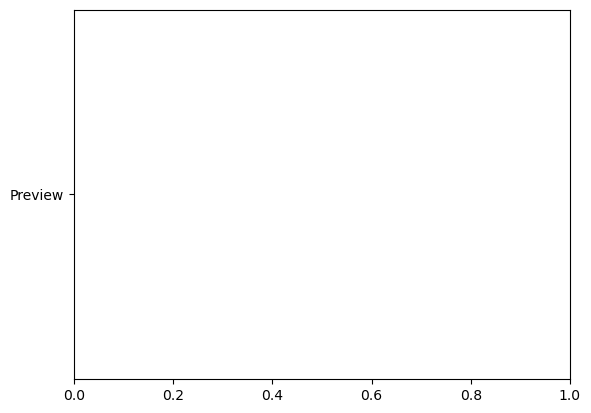

In [323]:
plt.barh(predictors, ols_model.coef_.flatten())

# plt.xticks(rotation = 90)
plt.title('OLS: feature selection')
plt.xlabel('Features')
plt.ylabel(r'$\beta$ values')
plt.tight_layout()
plt.savefig('ols.png')


### Ridge

In [ ]:
from sklearn.preprocessing import StandardScaler
np_X_train = tran_linear[predictors].to_numpy()
np_X_test = test_linear[predictors].to_numpy()

np_y_train = tran_linear['Lifetime_Gross'].to_numpy()
np_y_test = test_linear['Lifetime_Gross'].to_numpy()

np_log_y_train = tran_linear['log_lifetime_gross'].to_numpy()
np_log_y_test = test_linear['log_lifetime_gross'].to_numpy()

In [ ]:
scaler = StandardScaler()
scaler.fit(np_X_train)

np_X_train = scaler.transform(np_X_train)
np_X_test = scaler.transform(np_X_test)

In [ ]:
from sklearn.linear_model import RidgeCV

ridge = RidgeCV()
ridge_model = ridge.fit(np_X_train,tran_linear['log_lifetime_gross'])

In [ ]:
# predict with model
# predicted log gross (train set)
ridge_log_y_train_pred = ridge_model.predict(np_X_train)

# predicted log gross (test set)
ridge_log_y_test_pred = ridge_model.predict(np_X_test)

# predictied gross
ridge_y_test_pred = log_to_orig(np_log_y_train,ridge_log_y_train_pred,ridge_log_y_test_pred)


In [ ]:
# Ridge RMSLE results
# train error
ridge_train_error = rmsle(tran_linear['Lifetime_Gross'],np.exp(ridge_log_y_train_pred))

# test error
ridge_test_error = rmsle(test_linear['Lifetime_Gross'],ridge_y_test_pred)

print(ridge_train_error)
print(ridge_test_error)

In [ ]:
ridge_test_mae=mae(test_linear['Lifetime_Gross'],ridge_y_test_pred)

In [ ]:
print(ridge_model.intercept_)
print(ridge_model.coef_)

In [ ]:
# plot the coefficients
plt.bar(predictors, ridge_model.coef_)
plt.xticks(rotation = 90)
plt.title('Ridge regression: feature selection')
plt.xlabel('Features')
plt.ylabel(r'$\beta$ values')
plt.tight_layout()
plt.savefig('ridge.png')

### Lasso Regression

In [ ]:
# reference: Tutorial 7.4: Lasso regression
# import libraries
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LassoCV

In [ ]:
lasso = LassoCV()
lasso.fit(np_X_train, np_log_y_train)

lasso_model = Lasso(alpha=lasso.alpha_)

In [ ]:
# best alpha
lasso.alpha_

In [ ]:
lasso_model = lasso_model.fit(np_X_train,tran_linear['log_lifetime_gross'])

# predict with model
# predicted log gross (train set)
lasso_log_y_train_pred = lasso_model.predict(np_X_train)

# predicted log gross (test set)
lasso_log_y_test_pred = lasso_model.predict(np_X_test)

# predictied gross
lasso_y_test_pred = log_to_orig(np_log_y_train,lasso_log_y_train_pred,lasso_log_y_test_pred)


In [ ]:
# Lasso RMSLE results
# train error
lasso_train_error = rmsle(tran_linear['Lifetime_Gross'],np.exp(lasso_log_y_train_pred))

# test error
lasso_test_error = rmsle(test_linear['Lifetime_Gross'],lasso_y_test_pred)

print(lasso_train_error)
print(lasso_test_error)

In [ ]:
lasso_test_mae=mae(test_linear['Lifetime_Gross'],lasso_y_test_pred)

In [ ]:
print(lasso_model.intercept_)
print(lasso_model.coef_)

In [ ]:
# plot the coefficients
plt.bar(predictors, lasso_model.coef_)
plt.xticks(rotation = 90)
plt.title('Lasso regression: feature selection')
plt.xlabel('Features')
plt.ylabel(r'$\beta$ values')
plt.tight_layout()
plt.savefig('lasso.png')

### Elastic Net Regression

In [ ]:
from sklearn.linear_model import ElasticNetCV
elastic_model = ElasticNetCV(l1_ratio=[0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.99], cv=5)

elastic_model.fit(np_X_train,tran_linear['log_lifetime_gross'])

elastic_best = ElasticNet(l1_ratio = elastic_model.l1_ratio_, alpha=elastic_model.alpha_);

In [ ]:
# best alpha & l1ratio
elastic_best

In [ ]:
# predict with model
# predicted log gross (train set)
elastic_log_y_train_pred = elastic_model.predict(np_X_train)

# predicted log gross (test set)
elastic_log_y_test_pred = elastic_model.predict(np_X_test)

# predictied gross
elastic_y_test_pred = log_to_orig(np_log_y_train,elastic_log_y_train_pred,elastic_log_y_test_pred)


In [ ]:
# Elastic Net RMSLE results
# train error
elastic_train_error = rmsle(tran_linear['Lifetime_Gross'],np.exp(elastic_log_y_train_pred))

# test error
elastic_test_error = rmsle(test_linear['Lifetime_Gross'],elastic_y_test_pred)

print(elastic_train_error)
print(elastic_test_error)

In [ ]:
elastic_test_mae=mae(test_linear['Lifetime_Gross'],elastic_y_test_pred)

In [ ]:
print(elastic_model.intercept_)
print(elastic_model.coef_)

In [ ]:
# plot the coefficients
plt.bar(predictors, elastic_model.coef_)
plt.xticks(rotation = 90)
plt.title('Elastic Net regression: feature selection')
plt.xlabel('Features')
plt.ylabel(r'$\beta$ values')
plt.tight_layout()
plt.savefig('elastic.png')

In [ ]:
# Top15 variables
n_coefs = 15
model = [ ridge_model, lasso_model, elastic_model]
model_name = ['Ridge', 'Lasso', 'Elastic Net']
plt.figure(figsize = (60, 20))

for i in range(len(model)):
    betas = model[i].coef_

    indicies = np.argsort(np.abs(betas))[-n_coefs:]
    top_predictors = np.array(predictors)[indicies]
    top_betas = betas[indicies]

    plt.subplot(1, 3, i+1)
    plt.barh(top_predictors, top_betas, alpha=0.5, edgecolor='black')
    sns.despine()
    plt.xlabel('Beta coefficient')
    plt.title(model_name[i]);
    
plt.suptitle('Top {} Beta Coefficients'.format(n_coefs), fontsize = 16)
plt.tight_layout()
plt.savefig("Beta coefficients")

## Tree-based

In [ ]:
#tran_tree.columns

In [ ]:
tree_predictors= ['No Preview','Preview','lockdown','post',  'pre', 'EX','G', 'M',
       'MA15+', 'PG', 'R18+', 'TBC', 'VARIOUS', 'Action','Adventure',
       'Comedy', 'Documentary', 'Drama', 'Horror', 'Others', 'Romance',
       'Special Event', 'Thriller', 'Australia','USA', 'India', 'UK','OtherCountry',
       'France', 'Fox','Walt Disney', 'Warner Bros.', 'Sony', 'Universal',
       'Paramount', 'Other Distributor', 
       'Mainstream_director','Little_known_director',
       'Mainstream_actor','Little_known_actor','Director*preview' ,'Opening_Day_Screens']

In [ ]:
len(tree_predictors)

In [ ]:
#tran_tree[tree_predictors].info()

### Regression Tree (Benchmark Model)

In [ ]:
from sklearn.model_selection import GridSearchCV#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV
from sklearn import tree

In [ ]:
param_grid={'max_depth': np.arange(1,20,1)} 

sdt=tree.DecisionTreeRegressor(random_state=0)

dtcv = GridSearchCV(sdt, param_grid)

dtcv=dtcv.fit(tran_tree[tree_predictors], tran_tree['log_lifetime_gross'])

print(dtcv.best_params_)

In [ ]:
#re-fit
sdt=tree.DecisionTreeRegressor(max_depth=7)
sdt=sdt.fit(tran_tree[tree_predictors], tran_tree['log_lifetime_gross'])

In [ ]:
#check feature importance
sum(sdt.feature_importances_ !=0)

In [ ]:
from tutorial9 import plot_feature_importance
plot_feature_importance(sdt, labels=tree_predictors)
plt.show()

In [ ]:
#training log error
y_hat_sdt=sdt.predict(tran_tree[tree_predictors])

rmsle(tran_tree['log_lifetime_gross'],y_hat_sdt)

In [ ]:
#training orig
orig_sdt_training_error=rmsle(tran_tree['Lifetime_Gross'],np.exp(y_hat_sdt))

#pred test
y_hat_testsdt=sdt.predict(test_tree[tree_predictors])

#test orig
y_hat_origtestsdt=log_to_orig(tran_tree['log_lifetime_gross'],y_hat_sdt,y_hat_testsdt)

#test error
orig_sdt_test_error=rmsle(test_tree['Lifetime_Gross'],y_hat_origtestsdt)

In [ ]:
orig_sdt_test_mae=mae(test_tree['Lifetime_Gross'],y_hat_origtestsdt)

### XGBoost

In [ ]:
import xgboost as xgb

sxgb = xgb.XGBRegressor()

sxgb_par = GridSearchCV(sxgb,
                    {'max_depth':[4,5,6,7,8],
                     'n_estimators':[50,100,150],
                     'learning_rate':[0.05,0.1,0.5,0.9]},verbose=1)
sxgb_result=sxgb_par.fit(tran_tree[tree_predictors], tran_tree['log_lifetime_gross'])

print(sxgb_result.best_score_)
print(sxgb_result.best_params_)

In [ ]:
#refit
sxgb_ref = xgb.XGBRegressor(max_depth=5, learning_rate=0.1, n_estimators=150)

sxgb_ref=sxgb_ref.fit(tran_tree[tree_predictors], tran_tree['log_lifetime_gross'])

In [ ]:
#check feature importance
sxgb_ref.feature_importances_

In [ ]:
#training error
y_hat_xgb=sxgb_ref.predict(tran_tree[tree_predictors])

rmsle(tran_tree['log_lifetime_gross'],y_hat_xgb)

In [ ]:
#training orig
orig_xgb_training_error=rmsle(tran_tree['Lifetime_Gross'],np.exp(y_hat_xgb))

#pred test
y_hat_testxgb=sxgb_ref.predict(test_tree[tree_predictors])

#test orig
y_hat_origtestxgb=log_to_orig(tran_tree['log_lifetime_gross'],y_hat_xgb,y_hat_testxgb)

#test error
orig_xgb_test_error=rmsle(test_tree['Lifetime_Gross'],y_hat_origtestxgb)

In [ ]:
orig_xgb_test_mae=mae(test_tree['Lifetime_Gross'],y_hat_origtestxgb)

### LightGBM

In [ ]:
#! pip install optuna
#! pip install lightgbm
#! pip install graphviz
#作业交上去时要改，以防老师运行出error

In [ ]:
#QBUS6810 W10 TUT

import lightgbm as lgb

algbm = lgb.LGBMRegressor(objective='regression', boosting_type = 'gbdt', 
                         n_estimators = 2000, learning_rate = 0.01,  
                         num_leaves = 24,
                         lambda_l1 = 0.0, lambda_l2 = 0.0,
                         bagging_fraction = 0.74, bagging_freq = 1, 
                         feature_fraction = 1.0, min_data_in_leaf = 1)

algbm=algbm.fit(tran_tree[tree_predictors], tran_tree['log_lifetime_gross'])

In [ ]:
#Hyperparameter Optimization

# Training API
atrain_data = lgb.Dataset(tran_tree[tree_predictors], tran_tree['log_lifetime_gross'])

In [ ]:
import optuna
from optuna.samplers import TPESampler

def objective(trial):
    
    params = {
    'objective': 'regression',
    'boosting_type': 'gbdt',
    'learning_rate': 0.01, 
    'n_estimators': trial.suggest_int('n_estimators', 1000, 3000),
    'num_leaves': trial.suggest_int('num_leaves', 2, 64),
    'lambda_l1': trial.suggest_loguniform('lambda_l1',  1e-8, 10), 
    'lambda_l2': trial.suggest_loguniform('lambda_l2',  1e-8, 10), 
    'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.5, 1.0),
    'bagging_freq': trial.suggest_int('bagging_freq', 1, 10),
    'feature_fraction':  trial.suggest_uniform('feature_fraction', 0.5, 1.0),
    'min_data_in_leaf': trial.suggest_int('min_data_in_leaf', 1, 128), 
    'feature_pre_filter': False,
    'verbosity': -1,
     }
    
    # Cross-validation 
    history = lgb.cv(params, atrain_data, num_boost_round = 5000, 
                 nfold = 5, stratified = False, early_stopping_rounds = 50, verbose_eval=0)
    
    # Save full set of parameters
    trial.set_user_attr('params', params)
    
    # Save the number of boosting iterations selected by early stopping
    trial.set_user_attr('num_boost_round', len(history['l2-mean']))
    
    return history['l2-mean'][-1] # returns CV error for the best trial

sampler = TPESampler(seed = 42) 
study = optuna.create_study(direction='minimize', sampler=sampler)
study.optimize(objective, n_trials=500, timeout = 1500)

In [ ]:
params = study.best_trial.user_attrs['params']
num_trees = study.best_trial.user_attrs['num_boost_round']

print(f'Number of boosting iterations: {num_trees} \n')

print('Best parameters:')
params

In [ ]:
algbm = lgb.train(params, atrain_data, num_boost_round = 832)

In [ ]:
ax=lgb.plot_importance(algbm,ignore_zero=True,max_num_features=20)
#https://lightgbm.readthedocs.io/en/latest/pythonapi/lightgbm.plot_importance.html#lightgbm.plot_importance
plt.title('Feature importances (Top 20)')
plt.savefig('lgbm.png')
#目前结果如文件夹lgbm.png

In [ ]:
ax=lgb.plot_importance(algbm,figsize=(5,8),ignore_zero=True)
plt.savefig('lgbm_full.png')

In [ ]:
#training error
y_hat_lgbm=algbm.predict(tran_tree[tree_predictors])

rmsle(tran_tree['log_lifetime_gross'],y_hat_lgbm)

In [ ]:
#training orig
orig_lgbm_training_error=rmsle(tran_tree['Lifetime_Gross'],np.exp(y_hat_lgbm))

#pred test
y_hat_testlgbm=algbm.predict(test_tree[tree_predictors])

#test orig
y_hat_origtestlgbm=log_to_orig(tran_tree['log_lifetime_gross'],y_hat_lgbm,y_hat_testlgbm)

#test error
orig_lgbm_test_error=rmsle(test_tree['Lifetime_Gross'],y_hat_origtestlgbm)

In [ ]:
orig_lgbm_test_mae=mae(test_tree['Lifetime_Gross'],y_hat_origtestlgbm)

## RMSLE Results

#提交时删除
orig_lgbm_training_error=0.996591486480021
orig_lgbm_test_error=1.302271655099245

In [ ]:
#error pk
#QBUS6810 w10
columns=['Training RMSLE','Test RMSLE','Test MAE']
rows=['OLS','Lasso','Ridge','Elastic Net','Regression Tree', 'XGBoost',  'LightGBM']

error=pd.DataFrame(0.0, columns=columns, index=rows) 

training_errors=[ols_train_error,lasso_train_error,ridge_train_error,elastic_train_error,orig_sdt_training_error,orig_xgb_training_error,orig_lgbm_training_error]

test_errors=[ols_test_error,lasso_test_error,ridge_test_error,elastic_test_error,orig_sdt_test_error,orig_xgb_test_error,orig_lgbm_test_error]

test_maes=[ols_test_mae,lasso_test_mae,ridge_test_mae,elastic_test_mae,orig_sdt_test_mae,orig_xgb_test_mae,orig_lgbm_test_mae]

for i in range(len(rows)):
    method=rows[i]
    error.loc[method,'Training RMSLE'] = training_errors[i]
    error.loc[method,'Test RMSLE'] = test_errors[i]
    error.loc[method,'Test MAE'] = test_maes[i]

error=error.sort_values(by='Test RMSLE', ascending=True)
error.round(3)

#error.to_excel('error.xlsx', index=True)

In [ ]:
#visualize errors
sns.set(font_scale=1)
p = sns.regplot(data=error, x='Training RMSLE', y='Test RMSLE', fit_reg=False, 
                 marker="o", color="red", logx=True,scatter_kws={'s': 8})
for i in range(len(rows)):
     p.text(training_errors[i], test_errors[i], rows[i], 
             horizontalalignment='left', 
             size='small', color='black', alpha=0.6)     
plt.title('Training RMSLE vs Test RMSLE of Each Method')
plt.show()